# SEM for SF OTU guilds test v0.7 x v0.13 -- FOR PLOTTING LASSO

#### This version takes advantage of clean run (no regSEM) in v0.7 to inject results from v0.13 for plotting LASSO SEM models
#### Plots run under section 11) below
#### Reason is v0.13 runs under r > 0.36, while semPlot not compiled under installed v3.6  (works in 3.4)
#### Could use laptop but want to see results!  Copy/paste code later if needed

- v0.7 cleans latent models with functions, furthers organization
- v0.6 develops result table reporting, still need to clean formulas in latent / composites
- v0.5 cleans v0.4, using ONLY new formula functions developed in v0.4
- v0.4 incorporates new formula building functions dev in v0.3
- v0.3 builds on SEM inspection functions in v0.2
- will need to break into parts for simplicity: prepare data, SEM inspect functions, running SEM

# 0) Import libraries, modules

In [1]:
# Import packagaes
library(ggplot2)
library(RColorBrewer)
library(reshape2)


suppressMessages(library(corrplot))
suppressMessages(library(Hmisc))
suppressMessages(library(cowplot))
theme_set(theme_grey())              # 

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘reshape2’ was built under R version 3.4.3”

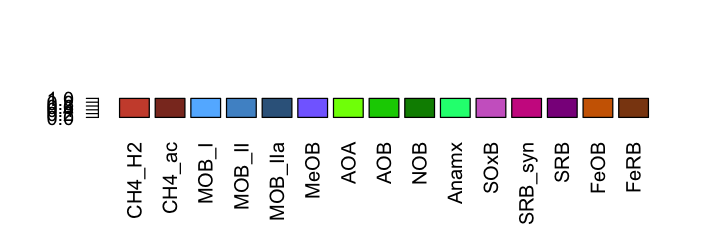

In [2]:
# Import own modules for OTU table processing into guilds

source("Import_SalOTU_dat_Plot_test_v0.1.R")                             # load data and metadata
source("OTU_subsetting_modules_v.0.2_strip.R")                           # gets guilds, contains colors 
suppressMessages(source("Corr_ranks_module_v0.3.2_strip.R"))             # contains simple aggregation function


# 1) Import data sets

### a) Use import module with metadata and OTU table

In [3]:
# Read import module for testing convenience here, still a bit of mucking around in pre-processing
# source("Import_SalOTU_dat_Plot_test_v0.1.R")

In [4]:
# Imported metadata
head(Meta_iTag)

,Sample,EWsiteHyd_index,MG_name,Index,Location,Pl_Sp,EWcoastGroup,SALTgroup,LU,Depth,⋯,Ca_pw,Sr_pw,Mg_pw,Na_pw,K_pw,Al_pw,Si_pw,Br_pw,F_pw,CH4_logn1
Sandmound_TuleA_D1,Sandmound_TuleA_D1,1,Sandmound_TuleA_D1,2,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6840787
Sandmound_TuleA_D2,Sandmound_TuleA_D2,2,Sandmound_TuleA_D2,85,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,51564.87,254.07,25081.42,114758.7,NA,25.25,10496.08,1.4380,0.4030,0.6840787
Sandmound_TuleB_D1,Sandmound_TuleB_D1,3,Sandmound_TuleB_D1,3,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275,-1.1222873
Sandmound_TuleB_D2,Sandmound_TuleB_D2,4,Sandmound_TuleB_D2,86,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275,-1.1222873
Sandmound_TuleC_D1,Sandmound_TuleC_D1,5,Sandmound_TuleC_D1,4,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460,0.1086608
Sandmound_TuleC_D2,Sandmound_TuleC_D2,6,Sandmound_TuleC_D2,87,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460,0.1086608


In [5]:
# Imported OTU table
# head(otu_V)

### b) Get delta sites only metadata
-  Generate separate Delta sites metadata

In [6]:
# Separate Delta Sites (oligo and FW)                                # levels(Meta_iTag$SALTgroup)

Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <-rbind(Meta_iTag_FW, Meta_iTag_Oligo)               # Meta_iTag_Delta


Delta_sites <-data.frame(Meta_iTag_Delta[,"Sample"])                 # DF of Delta sites
colnames(Delta_sites) [1] <- "Sample"                                # Rename column "Sample"
#Delta_sites["Samp_Index"] <- seq(1:nrow(Delta_sites))               # Make sample index for reordering post-merges
# Delta_sites

In [7]:
# source("OTU_subsetting_modules_v.0.2_strip.R")
# options(repr.plot.width=1.5, repr.plot.height=6) 

# 2) Process guild data and metadata

### a) Get guild counts/sample data from OTU table

In [8]:
Guild_OTUs <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
dim(Guild_OTUs); head(Guild_OTUs)

[1] 813   2

,Guild,OTU
otu_4420,CH4_H2,otu_4420
otu_196,CH4_H2,otu_196
otu_2086,CH4_H2,otu_2086
otu_2109,CH4_H2,otu_2109
otu_1614,CH4_H2,otu_1614
otu_1912,CH4_H2,otu_1912


In [9]:
otu_V["OTU"] <- row.names(otu_V)                 # Make OTU number column

In [10]:
# merge otu table and Guilds 
OTU_guilds <- merge(Guild_OTUs, otu_V, by="OTU")#, all.y=TRUE)
head(OTU_guilds)

OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
otu_1018,MeOB,54.66913,249.34647,0.0000,378.86561,118.0791,414.5159,868.71367,1181.3479,⋯,0.000000,35.553786,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Rhodocyclales;f__Rhodocyclaceae;g__Methyloversatilis,Bacteria,Proteobacteria,Betaproteobacteria,Rhodocyclales,Rhodocyclaceae,Methyloversatilis,Betaproteobacteria
otu_1019,SRB,0.00000,16.08687,0.0000,0.00000,0.0000,0.0000,15.79479,0.0000,⋯,8.807236,0.000000,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfobacterales;f__Desulfobulbaceae;g__DesulfobulbaceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfobacterales,Desulfobulbaceae,DesulfobulbaceaeFA,Deltaproteobacteria
otu_1028,SRB_syn,984.04442,1230.64549,894.4544,1310.24358,1180.7909,1399.9687,971.37983,917.1956,⋯,8.807236,35.553786,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__SyntrophobacteraceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Syntrophobacteraceae,SyntrophobacteraceaeFA,Deltaproteobacteria
otu_103,SRB_syn,359.25431,136.73839,0.0000,63.14427,342.4294,117.3158,1879.58049,821.8072,⋯,0.000000,7.110757,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Desulfobacteraceae;g__DesulfobacteraceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Desulfobacteraceae,DesulfobacteraceaeFA,Deltaproteobacteria
otu_1034,SRB_syn,0.00000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000,0.0000,⋯,0.000000,0.000000,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Syntrophobacter,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Syntrophobacteraceae,Syntrophobacter,Deltaproteobacteria
otu_1048,FeRB,0.00000,0.00000,894.4544,0.00000,0.0000,0.0000,0.00000,0.0000,⋯,0.000000,0.000000,k__Bacteria;p__Firmicutes;c__Clostridia;o__Thermoanaerobacterales;f__ThermoanaerobacteralesOR;g__ThermoanaerobacteralesOR,Bacteria,Firmicutes,Clostridia,Thermoanaerobacterales,ThermoanaerobacteralesOR,ThermoanaerobacteralesOR,Firmicutes


### b) "carbon" guilds by phylum (experimental)
- from MG RAST C cycling data

In [11]:
## Get C guilds
Firmic <- otu_V[subset(otu_V["Phylum"]=="Firmicutes"),]     # Firmicutes
Firmic['Guild'] <-"Firmic" 

Actino <- otu_V[subset(otu_V["Phylum"]=="Actinobacteria"),] 
Actino['Guild'] <-"Actino" 

Chlorf <- otu_V[subset(otu_V["Phylum"]=="Chloroflexi"),] 
Chlorf['Guild'] <-"Chlorf" 

C_guilds <- rbind(Firmic, Actino, Chlorf)
#C_guilds

### c) Aggregate counts of guilds / C guilds or other NEW guilds/

In [12]:
# Get agg_by_cat function from corr module
# source("Corr_ranks_module_v0.3.2_strip.R")

In [13]:
# Aggregate OTU guilds 
Guild_agg <- agg_by_cat(OTU_guilds, "Guild")     # aggregate by Guild
# head(Guild_agg)

In [14]:
# Aggregate C guilds
C_guild_agg <- agg_by_cat(C_guilds, "Guild")
# C_guild_agg

In [15]:
# Combine OTU and C guild data
Guild_agg2 <-rbind(Guild_agg, C_guild_agg)
Guild_agg2

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
CH4_H2,CH4_H2,1772.8419,2219.98793,894.4544,2146.9051,1109.9434,1556.38980,2487.680061,1871.07899,1428.5856,⋯,0.000000e+00,4.926767e+01,0.0000,15.26974,0.000000e+00,0.00000,1.833237e+01,0.0000,0.00000,1.422151e+01
CH4_ac,CH4_ac,296.7753,571.08385,0.0000,410.4377,118.0791,312.84217,371.177660,205.45181,208.3354,⋯,0.000000e+00,1.407648e+01,0.0000,15.26974,7.712538e+00,0.00000,6.110789e+00,215.8895,0.00000,7.110757e+00
MOB_I,MOB_I,11964.7306,10914.94068,15205.7245,16985.8083,8088.4176,12576.25528,18242.987111,10030.45089,3263.9213,⋯,1.224262e+03,8.586651e+02,2851.8466,1351.37199,3.856269e+01,41.10355,2.444315e+01,863.5579,79.26512,7.252972e+02
MOB_II,MOB_II,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,7.897397,0.00000,0.0000,⋯,0.000000e+00,7.038239e+00,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0.0000,0.00000,0.000000e+00
MOB_IIa,MOB_IIa,9824.8245,11574.50231,2683.3631,12644.6398,8607.9656,13350.53965,13907.316149,22225.48336,9226.2820,⋯,8.871461e+00,4.926767e+01,0.0000,30.53948,0.000000e+00,8.22071,3.666473e+01,0.0000,26.42171,2.346550e+02
MeOB,MeOB,6279.1406,4834.10416,2683.3631,7529.9541,4664.1240,4974.19052,9192.570129,5693.95018,7698.4891,⋯,2.040436e+02,4.222943e+01,221.8103,30.53948,1.311132e+02,0.00000,4.949739e+02,0.0000,61.65065,1.848797e+02
AOA,AOA,20274.4391,15950.13071,12522.3614,19211.6438,21419.5468,21859.84671,7068.170331,5877.38929,15962.4599,⋯,2.750153e+03,1.009283e+04,475.3078,16697.46064,2.614550e+03,2046.95669,2.749855e+02,3454.2314,1409.15776,4.223790e+03
AOB,AOB,0.0000,16.08687,0.0000,0.0000,0.0000,15.64211,7.897397,0.00000,0.0000,⋯,4.524445e+02,1.280959e+03,261.4193,1557.51348,7.481162e+02,49.32426,9.166183e+01,0.0000,290.63879,1.919904e+02
NOB,NOB,44461.6262,68562.23607,33989.2665,78930.3361,44846.4381,78789.30080,41816.717210,34919.47023,36498.3780,⋯,1.011347e+03,3.772496e+03,269.3411,3748.72116,1.287994e+03,616.55322,2.444315e+02,3454.2314,1629.33866,2.865635e+03
Anamx,Anamx,117.1481,96.52121,2683.3631,126.2885,177.1186,54.74738,71.076573,73.37565,109.1281,⋯,9.669893e+02,2.927907e+03,435.6988,2091.95437,1.928135e+02,4151.45835,1.527697e+02,2374.7841,836.68742,2.758974e+03


### d) calculate NEW guild ratios, Log transform guild data

In [16]:
# prepare data
Guild_agg2 <- data.frame(t(Guild_agg2[,-1]))           # Transpose for new calcs
Guild_agg2 <- replace(Guild_agg2, Guild_agg2==0, 2)    # replace 0s with pseudo counts 

In [17]:
# Add guild ratios 
Guild_agg2$AO_NOB <- (Guild_agg2$AOA + Guild_agg2$AOB) / Guild_agg2$NOB
Guild_agg2$NOB_AO <- Guild_agg2$NOB / (Guild_agg2$AOA + Guild_agg2$AOB)
Guild_agg2$mcr_pmo <- ((Guild_agg2$CH4_ac + Guild_agg2$CH4_H2) / 
                            (Guild_agg2$MOB_I + Guild_agg2$MOB_II + Guild_agg2$MOB_IIa))
Guild_agg2$pmo_mcr <- ((Guild_agg2$MOB_I + Guild_agg2$MOB_II + Guild_agg2$MOB_IIa) / 
                       (Guild_agg2$CH4_ac + Guild_agg2$CH4_H2))

In [18]:
# Log 2 transform data
Guild_agg_L2 <- log2(Guild_agg2)                       # log2
Guild_agg_L2$Sample <- row.names(Guild_agg_L2)
head(Guild_agg_L2)

,CH4_H2,CH4_ac,MOB_I,MOB_II,MOB_IIa,MeOB,AOA,AOB,NOB,Anamx,⋯,FeOB,FeRB,Actino,Chlorf,Firmic,AO_NOB,NOB_AO,mcr_pmo,pmo_mcr,Sample
Sandmound_TuleA_D1,10.791848,8.213227,13.54650,1,13.26222,12.61635,14.30737,1.000000,15.44027,6.872190,⋯,10.79819,12.28497,15.24868,15.63175,12.49082,-1.132756,1.132756,-3.396333,3.396333,Sandmound_TuleA_D1
Sandmound_TuleA_D2,11.116336,9.157559,13.41402,1,13.49866,12.23903,13.96128,4.007812,16.06513,6.592774,⋯,12.14480,12.12416,14.56336,16.13355,12.42988,-2.102392,2.102392,-3.010485,3.010485,Sandmound_TuleA_D2
Sandmound_TuleB_D1,9.804864,1.000000,13.89233,1,11.38983,11.38983,13.61222,1.000000,15.05279,11.389827,⋯,12.38983,13.26430,15.23113,15.80486,13.80486,-1.440342,1.440342,-4.318867,4.318867,Sandmound_TuleB_D1
Sandmound_TuleB_D2,11.068043,8.681020,14.05204,1,13.62624,12.87843,14.22969,1.000000,16.26829,6.980580,⋯,12.68794,12.92016,14.35887,15.66094,12.96642,-2.038449,2.038449,-3.534460,3.534460,Sandmound_TuleB_D2
Sandmound_TuleC_D1,10.116270,6.883610,12.98164,1,13.07146,12.18739,14.38664,1.000000,15.45271,7.468572,⋯,10.62777,12.15040,15.12010,15.60881,12.08132,-1.065931,1.065931,-3.765299,3.765299,Sandmound_TuleC_D1
Sandmound_TuleC_D2,10.603988,8.289291,13.61841,1,13.70461,12.28025,14.41600,3.967363,16.26571,5.774718,⋯,12.20815,12.77633,14.69102,15.69379,12.95747,-1.848684,1.848684,-3.794038,3.794038,Sandmound_TuleC_D2


In [19]:
#colMeans(Guild_aggT)
#Guild_aggT1000 = Guild_aggT/1000   # Divide OTU counts by 1000 for lavaan
#colMeans(Guild_aggT1000)

### e) Process CH4 and other soil metadata

In [20]:
### Reimport metadata instead of using module loaded metadata
metaDB <- read.table("SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep='\t', header=T)
# metaDB <- read.table("SF_sal_metaLOG_FIX2.txt", sep='\t', header=T)
# head(metaDB); names(metaDB)

In [21]:
# Get only numeric data, LOG 10 transform soil chemistry
metaCHEM <- metaDB[,15:ncol(metaDB)]                                             # should use lapply
metaCHEM_log <-log10(metaCHEM)                                                   # log10 chem
CH4_logn1 <- log10(metaDB[,"CH4_ug_m2_h"]- (min(metaDB[,"CH4_ug_m2_h"])*1.05))   # CH4 logn1
metaCHEM_log["CH4_logn1"] <- CH4_logn1                                           # to metachemLOg       #metaCHEM_log

Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”

In [22]:
# reattach non-numeric
metaDB = data.frame(metaDB[,1:14], metaCHEM_log)                                  # metaDB

In [23]:
# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                # colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Reorder location factor
Meta_iTag$Location <-factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))  #head(Meta_iTag)
Meta_iTag$Pl_Sp <-factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]
colnames(Meta_iTag) #head(Meta_iTag) #max(Meta_iTag$CH4_ug_m2_h) #plot(x=Meta_iTag$Sample, y=Meta_iTag$CH4_ug_m2_h)

[1] "Sample"           "X"                "EWsiteHyd_index"  "MG_name"         
 [5] "Index"            "Location"         "Pl_Sp"            "EWcoastGroup"    
 [9] "SALTgroup"        "LU"               "Depth"            "EW.no"           
[13] "iTag_name.x"      "Site_indx"        "Salinity.x"       "Bulk_dens"       
[17] "H2O_FPS"          "CO2_mg_m2_h"      "CO2_soilC_mg_g_d" "CH4_ug_m2_h"     
[21] "CH4_CO2"          "CH4_soilC_ug_g_d" "pH"               "Cl"              
[25] "SO4"              "Corg_LOI"         "C"                "N"               
[29] "P"                "NO3_N"            "NH4_N"            "Olsen_P"         
[33] "CN"               "CP"               "NP"               "NP_ext"          
[37] "NO3_NH4"          "C_g_m2"           "N_g_m2"           "P_g_m2"          
[41] "Fe"               "Mn"               "Cu"               "Zn"              
[45] "Salinity.y"       "CO2_mg_m2_h.1"    "CH4_ug_m2_h.1"    "Cl_pw"           
[49] "SO4_pw"           "DOC_mg_L"         "NO2_pw"           "NO3_pw"          
[53] "NH3_pw"           "PO4_pw"           "Fe_pw"            "Mn_pw"           
[57] "Co_pw"            "Cu_pw"            "Zn_pw"            "Ca_pw"           
[61] "Sr_pw"            "Mg_pw"            "Na_pw"            "K_pw"            
[65] "Al_pw"            "Si_pw"            "Br_pw"            "F_pw"            
[69] "CH4_logn1"

In [24]:
# reduce metadata factors
CH4_samp <- c("Sample", "CH4_ug_m2_h","CH4_logn1",'CO2_mg_m2_h','CH4_CO2', "Bulk_dens", 'H2O_FPS',
               'pH', 'C', 'N','P','CN','NP', 'NO3_N', 'NH4_N', 'Olsen_P', 'NP_ext',
               'Salinity.x', 'Cl', 'SO4', 'SO4_pw', 'Fe', 'Fe_pw','DOC_mg_L')
              
              # 'NO2_pw','NO3_pw', 'NH3_pw', 
              # "C_g_m2")  # not for log data, already been logn1 transf: "CH4_logn1", 
CH4 <- Meta_iTag[,CH4_samp] 
# CH4

### f) merge metadata with guild data, clean 

In [25]:
# Merge metadata with guild data 
Guild_CH4 <- merge(CH4, Guild_agg_L2)
# dim(Guild_CH4); head(Guild_CH4)

In [26]:
# Clean NA methane rows from this 
Guild_CH4 <- Guild_CH4[!is.na(Guild_CH4$CH4_ug_m2_h),]           

In [27]:
# Clean NA data bad metadata from this
guild_names <- names(Guild_CH4)
drop <-c("NO2_pw", "NO3_pw", "NH3_pw", "NH4_N.1", "NO3_N.1")
keep <- guild_names[!guild_names %in% drop]                      #keep
Guild_CH4 <- Guild_CH4[keep]

In [28]:
#dim(Guild_CH4); head(Guild_CH4); names(Guild_CH4)

### g) Get only delta sites

In [29]:
## Get only delta sites
Guild_CH4_d <- merge(Guild_CH4, Delta_sites)


In [30]:
dim(Guild_CH4_d); head(Guild_CH4_d); colnames(Guild_CH4_d)

[1] 65 46

Sample,CH4_ug_m2_h,CH4_logn1,CO2_mg_m2_h,CH4_CO2,Bulk_dens,H2O_FPS,pH,C,N,⋯,SRB,FeOB,FeRB,Actino,Chlorf,Firmic,AO_NOB,NOB_AO,mcr_pmo,pmo_mcr
Browns_ThreeSqA_D1,0.472344434,0.5218678,1.05517851,-1.582834,-0.4475316,1.871870,0.7958800,0.9127533,-0.2225732,⋯,14.19197,11.88227,14.02005,14.78102,15.37966,13.10205,-1.366962,1.366962,-4.307834,4.307834
Browns_ThreeSqA_D2,0.472344434,0.5218678,1.05517851,-1.582834,-0.4304467,1.863437,0.7817554,0.8561244,-0.3010300,⋯,16.05117,13.68903,13.48693,14.72349,15.56168,13.70882,-2.843382,2.843382,-5.369971,5.369971
Browns_ThreeSqB_D1,0.005190917,0.1368549,0.56450338,-1.559312,-0.4583895,1.876980,0.7944880,0.9227255,-0.2276783,⋯,14.19529,12.69987,14.06875,14.97585,15.23485,12.77730,-1.322760,1.322760,-4.291047,4.291047
Browns_ThreeSqB_D2,0.005190917,0.1368549,0.56450338,-1.559312,-0.3957837,1.844697,0.7730547,0.8082110,-0.3381873,⋯,16.73951,13.91431,13.69783,13.94191,15.62162,13.03539,-2.964373,2.964373,-5.927794,5.927794
Browns_TuleA_D2,0.038122722,0.1614124,0.03842647,-1.000304,-0.3031784,1.842354,0.7589119,0.7315888,-0.4100504,⋯,15.00141,13.00481,15.25833,14.96689,15.52525,14.07013,-2.408715,2.408715,-4.825975,4.825975
Browns_TuleB_D1,0.267422593,0.3442878,0.43166113,-1.164239,-0.4105685,1.864015,0.7817554,0.8591383,-0.2806687,⋯,13.28578,11.73378,13.92748,14.03329,15.16098,12.69448,-1.193622,1.193622,-3.990608,3.990608


[1] "Sample"      "CH4_ug_m2_h" "CH4_logn1"   "CO2_mg_m2_h" "CH4_CO2"    
 [6] "Bulk_dens"   "H2O_FPS"     "pH"          "C"           "N"          
[11] "P"           "CN"          "NP"          "NO3_N"       "NH4_N"      
[16] "Olsen_P"     "NP_ext"      "Salinity.x"  "Cl"          "SO4"        
[21] "SO4_pw"      "Fe"          "Fe_pw"       "DOC_mg_L"    "CH4_H2"     
[26] "CH4_ac"      "MOB_I"       "MOB_II"      "MOB_IIa"     "MeOB"       
[31] "AOA"         "AOB"         "NOB"         "Anamx"       "SOxB"       
[36] "SRB_syn"     "SRB"         "FeOB"        "FeRB"        "Actino"     
[41] "Chlorf"      "Firmic"      "AO_NOB"      "NOB_AO"      "mcr_pmo"    
[46] "pmo_mcr"

### h) write out convenience tables for later use

In [31]:
# dir.create("SEM_data")

In [32]:
# write.table(Guild_CH4_d, "SEM_data/SEM_base_log2_10_delta_guild_soil_data.txt")
# write.table(Guild_CH4, "SEM_data/SEM_base_log2_10_all_guild_soil_data.txt")

# 3) Basic SEM testing workflow 

In [33]:
# load SEM libraries and functions

library("stringr") 
library("DiagrammeR") 
library("semPlot")

suppressMessages(library("lavaan"))
suppressMessages(library("dplyr"))
library(AICcmodavg)
library(corrplot)

Warning message:
“package ‘stringr’ was built under R version 3.4.4”

### a) model specification (simple-ish)

In [34]:
# "Simple model" - 
meth_mod <- 'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h 
             
             CH4_H2 ~ SRB_syn + CO2_mg_m2_h
             MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
             MOB_I ~ CH4_H2 +CH4_ac'

In [35]:
# "Simple model" - Param ordering swap TEST -- DOESN'T MATTER FOR SIGNIFICANCE!
meth_mod <- 'CH4_ug_m2_h ~  CH4_H2 + CH4_ac + MOB_I + MOB_IIa + CO2_mg_m2_h 
             
             CH4_H2 ~ SRB_syn + CO2_mg_m2_h
             MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
             MOB_I ~ CH4_H2 +CH4_ac'

### b) calculate SEM

In [36]:
# Calculate SEM
meth_mod.sem <- sem(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")    # Generates observed var > 1000 x warning, divide otu vas try again

### c) Get SEM full summary

In [37]:
# Get summary                           # Get summary
summary(meth_mod.sem, standardized=TRUE, rsq=TRUE, fit.measures=TRUE) # Get summary w. r2, std. coef

lavaan (0.5-23.1097) converged normally after  98 iterations

  Number of observations                            65

  Estimator                                         ML      Robust
  Minimum Function Test Statistic               84.911      83.327
  Degrees of freedom                                16          16
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.019
    for the Satorra-Bentler correction

Model test baseline model:

  Minimum Function Test Statistic              369.047     427.034
  Degrees of freedom                                30          30
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.797       0.830
  Tucker-Lewis Index (TLI)                       0.619       0.682

  Robust Comparative Fit Index (CFI)                         0.800
  Robust Tucker-Lewis Index (TLI)       

In [38]:
#str(meth_mod.sem)

### d) get modification indices

In [39]:
# look for missing links using modindices
mi2 <- modindices(meth_mod.sem); 
print(mi2[mi2$mi > 10.0,])

           lhs op         rhs     mi mi.scaled    epc sepc.lv sepc.all sepc.nox
62      CH4_H2  ~       MOB_I 14.126    13.863 -0.531  -0.531   -0.634   -0.634
63      CH4_H2  ~      CH4_ac 10.386    10.192  0.372   0.372    0.364    0.172
64      CH4_H2  ~         NOB 27.703    27.186 -0.708  -0.708   -0.769   -0.326
65      CH4_H2  ~         AOA 16.802    16.488 -0.321  -0.321   -0.594   -0.148
87 CO2_mg_m2_h  ~ CH4_ug_m2_h 16.374    16.069  0.459   0.459    1.187    1.187
88 CO2_mg_m2_h  ~      CH4_H2 28.742    28.206 -0.200  -0.200   -1.026   -1.026
90 CO2_mg_m2_h  ~       MOB_I 14.987    14.707 -0.105  -0.105   -0.642   -0.642
97     SRB_syn  ~      CH4_H2 31.101    30.521 -0.209  -0.209   -0.888   -0.888
99     SRB_syn  ~       MOB_I 11.332    11.120 -0.097  -0.097   -0.492   -0.492


### e) Plot LISREL graph layout
- likely will need to be tweaked for each, if not can make function

In [40]:
# Get lavaan fit
fit <- lavaan:::cfa(meth_mod, data = Guild_CH4_d, std.lv = TRUE)

In [41]:
# Define plot size
options(repr.plot.width=6, repr.plot.height=5) 

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

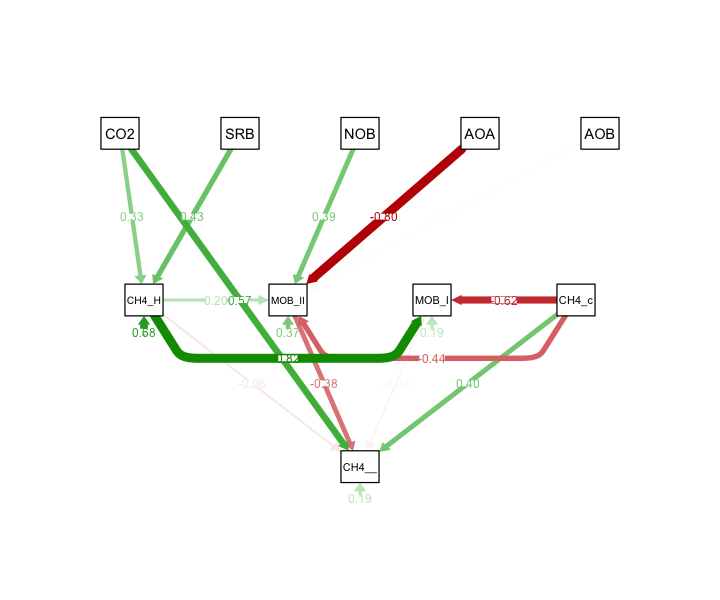

In [42]:
# make semPaths plot"
SEM_Plot <- semPaths(fit, "std", style = "lisrel", layout='tree3', optimizeLatRes=TRUE, exoCov=F,curvePivot = TRUE)#,
# SAVE, can use PDF too:          filetype = "tiff", filename = "base0_SEM_graph", height = 5, width = 6)

# 4) Deeper / own functions for screening fit & MI covariates

- Note that some good information about acccessing fit parameters can be found here:
http://www.understandingdata.net/2017/03/22/cfa-in-lavaan/

## A) check model results

- get_SEM_nonsig_vars(meth_mod.sem, p_cut =0.05)
- get_SEM_R2s(meth_mod.sem)
- sem_fit_sum(meth_mod.sem, sem_fit_params)

A) check model results purpose:
- has functions to Extract features from flat Lavaan SEM model summary using new functions

In [43]:
sem_fit_params <- c( "pvalue", "chisq", "df", "npar","aic", "bic", "gfi", "cfi", "rni", "rmsea", "srmr")

In [44]:
# How to get features from Lavaan output, used in functions
# parameterEstimates(meth_mod.sem, standardized=TRUE)  # gets P value for each Regression in summary
# inspect(meth_mod.sem)                                # gets various SEM model params 
# inspect(meth_mod.sem, 'r2')                          # gets R2 for each fitted var

# fitMeasures(meth_mod.sem)                            # gets all model fit measures
# fitMeasures(meth_mod.sem, c("aic", "bic"))           # gets selected model fit measures

### i) function for non-significant variables
get_SEM_nonsig_vars(meth_mod.sem, p_cut =0.05)

In [45]:
# check for SEM variable significance

get_SEM_nonsig_vars = function(sem_mod, p_cut) {

    # get significant only 
    sem_params <- parameterEstimates(sem_mod)                          # Get estimates
    sem_params_bad <- sem_params[sem_params$pvalue > p_cut,]           # cut out significant

    # clean up
    keep <- c('lhs', 'op','rhs','pvalue')                              # params to keep
    sem_params_bad <- sem_params_bad[keep]                             # keep
    sem_params_bad$pvalue <- round(sem_params_bad$pvalue, 2)           #  round p value
    sem_params_bad <- sem_params_bad[complete.cases(sem_params_bad),]  # drop all NA values (comes up in latent mods)

    return(sem_params_bad)
    
}

In [46]:
# Demonstrate function
get_SEM_nonsig_vars(meth_mod.sem, p_cut =0.05)

,lhs,op,rhs,pvalue
1,CH4_ug_m2_h,~,CH4_H2,0.60
3,CH4_ug_m2_h,~,MOB_I,0.81
10,MOB_IIa,~,AOB,0.83
23,CH4_ac,~~,AOA,0.08
26,CO2_mg_m2_h,~~,SRB_syn,0.49
33,SRB_syn,~~,AOB,0.60
36,NOB,~~,AOB,0.84
40,CH4_ug_m2_h,~1,,0.55


### ii) function to get R2 for each variable in model 
get_SEM_R2s(meth_mod.sem)

In [47]:
get_SEM_R2s = function(sem_mod){
    
    sem_name <- paste(as.character(deparse(substitute(sem_mod))))
    model <- data.frame(model = sem_name)
    
    R2s <- inspect(sem_mod, 'r2')
    R2s <- data.frame(round(R2s, 3))
    out <- t(R2s)
    
    out <- data.frame(model, out)
    row.names(out) <-NULL
    return(out)
}

In [48]:
# demonstrate function
get_SEM_R2s(meth_mod.sem)


model,CH4_ug_m2_h,CH4_H2,MOB_IIa,MOB_I
meth_mod.sem,0.811,0.315,0.633,0.814


### iii) function for custom SEM fit params summary
sem_fit_sum(meth_mod.sem, sem_fit_params)

In [49]:
# Define list of fit params
#sem_fit_params <- c("npar", "chisq", "df", "pvalue", "aic", "bic", "gfi", "cfi", "rni", "rmsea", "srmr")
sem_fit_params <- c( "pvalue", "chisq", "df", "npar","aic", "bic", "gfi", "cfi", "rni", "rmsea", "srmr")

In [50]:
# Make function
sem_fit_sum = function(sem_mod, sem_fit_params) {
    
    sem_name <- paste(as.character(deparse(substitute(sem_mod))))
    model <- data.frame(model = sem_name)
    
    fits <- data.frame(fitMeasures(sem_mod, sem_fit_params))
    fits <- round(fits, digits = 3)
    out <- t(fits)
    
    out <- data.frame(model, out)
    row.names(out) <-NULL
   # names(out)[1] <- sem_name
    return(out)
    
    
}

In [51]:
# Test function
sem_fit_sum(meth_mod.sem, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
meth_mod.sem,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133


## B) compare models

- compare_sem_fits(models2, sem_fit_params)
- compare_sem_R2s(models2)
- compare_sem_results(models2, sem_fit_params)

B) compare models purpose:
- compare model fit and R2 features from list of SEM models using prior extractors
- Note functions rbind, cbind, problem for comparing R2 where features differ; Those should likely be forked into separate models anyway

In [52]:
# models = c(meth_mod.sem, meth_mod.sem)
meth_mod.sem2 <- meth_mod.sem
models2 = c("meth_mod.sem","meth_mod.sem2")

### i) compare fits of more than one model

- compare_sem_fits(models2, sem_fit_params)

In [53]:
compare_sem_fits = function(models, sem_fit_params){
    
    out_list <- {}
    
    for (i in seq_along(models)) {

        curr_mod <- get(models[[i]])
        out_list[[i]] <- sem_fit_sum(curr_mod, sem_fit_params)

        }

    out <- do.call("rbind", out_list)
    out$model <- models
    return(out)
    
}

In [54]:
compare_sem_fits(models2, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
meth_mod.sem,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133
meth_mod.sem2,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133


### ii) compare R2 fits for more than one model
- compare_sem_R2s(models2)

In [55]:
compare_sem_R2s = function(models){
    
    out_list <- {}
    
    for (i in seq_along(models)) {

        curr_mod <- get(models[[i]])
        R2c <- get_SEM_R2s(curr_mod)
        R2c$model <- models[i]
        out_list[[i]] <- R2c
        #out_list[[i]] <- get_SEM_R2s(curr_mod)
        #names(out_list[i]) <- models[i]
        }
    
    out <- Reduce(function(...) merge(..., all=T), out_list)
    
    #out <- Reduce(merge, out_list)
    #out <- do.call("rbind", out_list)
    #out$model <- models
    #out_list
    out
}

In [56]:
# Demonstrate function
#models2 <- c('ch4_mod0_f','ch4_mod0a_f', 'ch4_mod0b_f')
compare_sem_R2s(models2)  # note this doesn't look right with two of the same models names

model,CH4_ug_m2_h,CH4_H2,MOB_IIa,MOB_I
meth_mod.sem,0.811,0.315,0.633,0.814
meth_mod.sem2,0.811,0.315,0.633,0.814


### iii) combine fit and R2 summaries
- compare_sem_results(models2, sem_fit_params)

In [57]:
compare_sem_results = function(models, sem_fit_params){
    
        fits <- compare_sem_fits(models, sem_fit_params)
        R2s <- compare_sem_R2s(models)
    
        out <- data.frame(cbind(fits, R2s[,-1]))
        #out <- data.frame(merge(fits, R2s, by="model"))
        return(out)

}

In [58]:
# Demonstrate function
compare_sem_results(models2, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,CH4_H2,MOB_IIa,MOB_I
meth_mod.sem,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133,0.811,0.315,0.633,0.814
meth_mod.sem2,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133,0.811,0.315,0.633,0.814


## C) extract modification index output

- sem_mi_table(meth_mod.sem, mi_lower = 4, mi_sort = "T", head = "T")

C) Extract modification index output notes:
- Note function trims results on MI, or using head

### i) function to sort / trim table of SEM modification indices

sem_mi_table(meth_mod.sem, mi_lower = 4, mi_sort = "T", head = "T")

In [59]:
sem_mi_table <- function(sem_mod, mi_lower = 4, mi_sort = "T", head = "T"){
    
    mi_tab <- data.frame(modindices(sem_mod))  # get mod indices table
    mi_tab <- mi_tab[mi_tab$mi > mi_lower,]         # impose cutoff on lower MI 
    
    # sort by mi?  or defaults to covariances first
    if (mi_sort == "T") {out_tab <- mi_tab[order(-mi_tab$mi),]}
        else {out_tab <- mi_tab}
    
    # crop to top 5 most important effects?
    if (head == "T") {out <- head(out_tab)}
        else {out <- out_tab}
    
    return(out)
        
}

In [60]:
# demonstrate function
sem_mi_table(meth_mod.sem)
#sem_mi_table(meth_mod.sem, mi_lower = 4, mi_sort = "F", head = "T")

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
97,SRB_syn,~,CH4_H2,31.10093,30.52101,-0.2094922,-0.2094922,-0.8884908,-0.8884908
88,CO2_mg_m2_h,~,CH4_H2,28.74238,28.20644,-0.1995810,-0.1995810,-1.0261874,-1.0261874
64,CH4_H2,~,NOB,27.70269,27.18613,-0.7077074,-0.7077074,-0.7686621,-0.3262604
65,CH4_H2,~,AOA,16.80163,16.48834,-0.3209428,-0.3209428,-0.5936561,-0.1479579
87,CO2_mg_m2_h,~,CH4_ug_m2_h,16.37413,16.06881,0.4593759,0.4593759,1.1867515,1.1867515
90,CO2_mg_m2_h,~,MOB_I,14.98664,14.70720,-0.1045666,-0.1045666,-0.6417438,-0.6417438


## D) access model residual covariances

- get_sem_covariances(meth_mod.sem, n_res =5)
- plot_matrix(residuals(meth_mod.sem)$cov)

### i) function to get /trim residual covariate data frame
- get_sem_covariances(meth_mod.sem, n_res =5)

In [61]:
get_sem_covariances = function(sem_mod, n_res =5){  # output_factors = F - consider output as list not table?
    
    # Get covariance matrix, melt
    resid <- residuals(sem_mod)$cov
    resid[lower.tri(resid, diag = T)] <-0         # get upper triangle only, lower as 0
    resid_M <- melt(resid)                        # melt DF

    # Clean, sort table
    resid_M <- resid_M[!resid_M$value == 0,]      # Drop 0/lower
    resid_M$abs <- abs(resid_M$value)             # Get abs for sorting effect size 
    resid_M <- resid_M[order(-resid_M$abs),]      # sort by abs
    resid_M <- resid_M[,1:3]                      # drop abs col 
    resid_M <- resid_M[1:n_res,]                  # get first n results
    resid_M
              
} 
    


In [62]:
# Demonstrate function
get_sem_covariances(meth_mod.sem, n_res =5)

,Var1,Var2,value
84,MOB_I,AOA,-3.505442
82,CH4_H2,AOA,-2.595419
74,MOB_I,NOB,-2.006552
72,CH4_H2,NOB,-1.940668
42,CH4_H2,CH4_ac,1.384039


### ii) function to plot residual covariances in model
plot_matrix(residuals(meth_mod.sem)$cov)

In [63]:
plot_matrix <- function(matrix_toplot){
corrplot(matrix_toplot, is.corr = FALSE, 
               type = 'lower', 
               order = "original", 
               tl.col='black', tl.cex=.75)
}


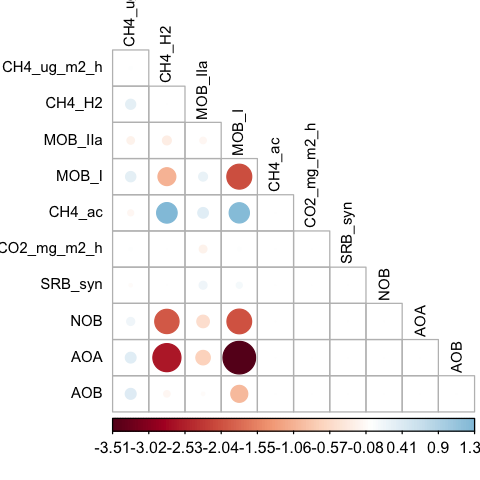

In [64]:
options(repr.plot.width=4, repr.plot.height=4) 
plot_matrix(residuals(meth_mod.sem)$cov)

# residuals(meth_mod.sem)$cov
# residuals(meth_mod.sem, type = "cor")$cor   # "keep an eye out for residual corr > 0.1" from http://www.understandingdata.net/2017/03/22/cfa-in-lavaan/

## E) get external covariates for model features

- get_mi_covars_pair(data, r_cut = 0.6, keep_pair)
- get_mi_covars_many(data, r_cut = 0.6, keep_vars)



E) get external covariates notes:
- using entire dataset, need to build filters to optionally exclude internal feats from model
- this likely needs revision, could including joining with mi, internal covar.

In [65]:
# prepare data matrix from input
data <- Guild_CH4_d[,-1]
data <- data[!is.na(data$CH4_ug_m2_h),]
data <-data.matrix(data)

### i) function to get external covariates (from internal pair)

get_mi_covars_pair(data, r_cut = 0.6, keep_pair)

In [66]:
# function to get covariates from MI pair
get_mi_covars_pair = function(data, r_cut = 0.5, keep_pair){
    
    corr_m <- cor(data)                                             # get corr
    corr_m[abs(corr_m) < r_cut] <- NA                               # get abs value over threshold only, or NA

    select_cols <- data.frame(corr_m[,keep_pair])                   # Get only cols from MI inputs
    # select_cols <- data.frame(corr_m[,keep_vars])                 -- too many vars at once not helping
    common_data <- t(select_cols[complete.cases(select_cols),])        # get only complete cases -- no NA
    common_data <- round(common_data,2)
    #select_cols
    common_data
}

In [67]:
# Note behavior change with many variables, only common feats kept
# keep_pair = c("CH4_H2", "SRB_syn")
keep_pair = c("CH4_H2", "AOA")
# keep_pair = cov_uniq[1:4]   

In [68]:
# Demonstrate function
get_mi_covars_pair(data, r_cut = 0.6, keep_pair)

,Bulk_dens,C,NO3_N,NH4_N,NP_ext,CH4_H2,AOA,NOB,SOxB
CH4_H2,-0.76,0.78,0.68,0.72,0.69,1.00,-0.69,-0.78,0.78
AOA,0.86,-0.72,-0.76,-0.69,-0.67,-0.69,1.00,0.79,-0.71


### ii) function to get mod index covariates for many
get_mi_covars_many(data, r_cut = 0.6, keep_vars)

In [69]:
# function to get covariates from MI several: drop all NA only
get_mi_covars_many = function(data, r_cut = 0.5, keep_vars){
    
    corr_m <- cor(data)                                             # get corr
    corr_m[abs(corr_m) < r_cut] <- NA                               # get abs value over threshold only, or NA

    # select_cols <- data.frame(corr_m[,keep_pair])                 # Get only cols from MI inputs
    select_cols <- data.frame(corr_m[,keep_vars])                   #  too many vars at once not helping
    # common_data <- select_cols[complete.cases(select_cols),]      # get only complete cases -- no NA
    common_data <- t(select_cols[rowSums(is.na(select_cols)) != ncol(select_cols), ])
    common_data <- round(common_data,2)
    common_data
}

In [70]:
keep_vars <- c("CH4_H2", "MOB_I", "AOA", "NOB", "AO_NOB")
#keep_vars <-cov_uniq

In [71]:
# Demonstrate function
get_mi_covars_many(data, r_cut = 0.6, keep_vars)

,Bulk_dens,H2O_FPS,C,N,CN,NP,NO3_N,NH4_N,NP_ext,Salinity.x,⋯,MOB_I,MOB_IIa,MeOB,AOA,NOB,SOxB,FeRB,Actino,AO_NOB,NOB_AO
CH4_H2,-0.76,NA,0.78,0.75,NA,0.61,0.68,0.72,0.69,NA,⋯,NA,NA,NA,-0.69,-0.78,0.78,NA,NA,NA,NA
MOB_I,-0.69,0.67,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.00,0.66,0.91,-0.67,NA,NA,0.7,-0.70,-0.70,0.70
AOA,0.86,NA,-0.72,NA,-0.85,NA,-0.76,-0.69,-0.67,0.71,⋯,-0.67,NA,-0.76,1.00,0.79,-0.71,NA,NA,0.78,-0.78
NOB,0.67,NA,-0.84,-0.78,-0.62,-0.73,-0.65,-0.67,-0.68,NA,⋯,NA,NA,NA,0.79,1.00,-0.73,NA,NA,NA,NA
AO_NOB,0.66,NA,NA,NA,-0.72,NA,NA,NA,NA,0.70,⋯,-0.70,-0.75,-0.77,0.78,NA,NA,NA,0.62,1.00,-1.00


## F) SEM formula builder: make tables, run, and report
First define variables as function subcompoents, get list of these as "response_vars"


- define_new_sem_table(mod_name = "ch4_mod0", response_vars)
- update_sem_model_table(model_table, base_model, new_mod_name, notes, formula_edits))
- sem_table_run_assign(model_table, data=Guild_CH4_d, estimator ="mlm")
- run_compare_sem_models(model_table, data, estimator = "mlm")

### i) Initial variable and list definition (example)

In [72]:
# try adding SEM response vars with string defs
CH4 <- 'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h'
CH4_H2 <- 'CH4_H2~ SRB_syn + CO2_mg_m2_h'
MOB_IIa <- 'MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac'
MOB_I <- 'MOB_I ~ CH4_H2 +CH4_ac'

In [73]:
# Get vector of response vars as strings
Other <- ""
response_vars <- c("CH4", "CH4_H2", "MOB_I","MOB_IIa", "Other")

### ii) make SEM model building data frame 
- define_new_sem_table(mod_name = "ch4_mod0", response_vars2)

In [74]:
define_new_sem_table <- function(mod_name, response_vars, output_prefix = "sem."){

    # Build data frame of sub-formulas from names
    feat_list <- {}
    
    for (i in seq_along(response_vars)) {

        feat_list[[i]] <- get(response_vars[i])

    }
    
    feats <- data.frame(feat_list)
    row.names(feats) <- response_vars
    feats <-data.frame(t(feats))
              
    # Get model formula from feats
    formula <- do.call(paste, c(feats, sep = '\n'))
    feats$formula <- formula
     
    # add model info
    model_out <- paste0(output_prefix, mod_name)
    mod_info <- data.frame(model_out = model_out, model = mod_name, base = mod_name, notes = "base")
    
    out <- data.frame(mod_info, feats)
    row.names(out) <- NULL
    return(out)
        
}

In [75]:
# Demonstrate function
model_test <- define_new_sem_table(mod_name = "ch4_mod0", response_vars)
model_test

model_out,model,base,notes,CH4,CH4_H2,MOB_I,MOB_IIa,Other,formula
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,CH4_H2~ SRB_syn + CO2_mg_m2_h,MOB_I ~ CH4_H2 +CH4_ac,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h CH4_H2~ SRB_syn + CO2_mg_m2_h MOB_I ~ CH4_H2 +CH4_ac MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac


##### demonstrate forward compatibility of function

In [76]:
# Inspect formula
# cat(model_test$formula)    #model_test$formula

In [77]:
# check formula extraction
formula_test <- model_test$formula
# cat(formula_test)

In [78]:
# Confirm this works in SEM model
ch4_mod0_build_f <- sem(formula_test, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")    # Generates observed var > 1000 x warning, divide otu vas try again
sem_fit_sum(ch4_mod0_build_f, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
ch4_mod0_build_f,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133


##### dev leftovers

### ii) update / edit models in table

model_test2 <- update_sem_model_table(model_test, base_model = "ch4_mod0", new_mod_name = "ch4_mod0a.1", 
                      notes = "drop CH4~MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + CO2_mg_m2_h"))

In [79]:
update_sem_model_table = function(mod_table, base_model, new_mod_name, notes, formula_edits, 
                                  output_prefix = "sem.", 
                                  non_feat_cols = c("model_out","model", "base", "notes", "formula")){
    
     # copy base model & update descriptions
     new_model <- mod_table[mod_table$model == base_model,]
     new_model$base <- base_model
     new_model$model <- new_mod_name
     new_model$model_out <- paste0(output_prefix, new_mod_name) 
     new_model$notes <- notes
    
     # edit formula components
     form_feat <- formula_edits[1]
     form_edit <- formula_edits[2]
    
     new_model[form_feat] <- form_edit
    
     # rebuild full formula
     cols <- names(new_model)
     feat_cols <- cols[!cols %in% non_feat_cols]
     feats <- data.frame(new_model[feat_cols])
                         
     formula <- do.call(paste, c(feats, sep = '\n'))
     new_model$formula <- formula
    
     # append to original table 
     mod_table_updated <- rbind(mod_table, new_model)
                 
     mod_table_updated
     #new_model
}

In [80]:
# Test function
model_test2 <- update_sem_model_table(model_test, base_model = "ch4_mod0", new_mod_name = "ch4_mod0a.1", 
                      notes = "drop CH4~MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + CO2_mg_m2_h"))
                      # output_prefix = "sem."#non_feat_cols = c("model", "base", "notes", "formula"))

model_test2

model_out,model,base,notes,CH4,CH4_H2,MOB_I,MOB_IIa,Other,formula
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,CH4_H2~ SRB_syn + CO2_mg_m2_h,MOB_I ~ CH4_H2 +CH4_ac,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h CH4_H2~ SRB_syn + CO2_mg_m2_h MOB_I ~ CH4_H2 +CH4_ac MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
sem.ch4_mod0a.1,ch4_mod0a.1,ch4_mod0,drop CH4~MOB_I,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + CO2_mg_m2_h,CH4_H2~ SRB_syn + CO2_mg_m2_h,MOB_I ~ CH4_H2 +CH4_ac,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + CO2_mg_m2_h CH4_H2~ SRB_syn + CO2_mg_m2_h MOB_I ~ CH4_H2 +CH4_ac MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac


### iii) run SEM models & assign from model table
- sem_multi_test <- sem_table_run_assign(model_test2, data=Guild_CH4_d, estimator ="mlm")

In [81]:
dim(model_test2)
#nrow(sem_model_table)
# sem_model_table$formula

[1]  2 10

In [82]:
sem_table_run_assign = function(sem_mod_table, data, estimator = 'mlm', prefix = "sem."){

        iters <- nrow(sem_mod_table)                                                  # seq_along misbehaving, use iters for loop
    
        for(i in seq(1:iters)) {
         
            # run SEM model            
            curr_model <- sem_mod_table$formula[i]                                    # get ith sem formula
            sem <- sem(curr_model, data=data, fixed.x=FALSE, estimator = estimator, orthogonal =TRUE)   # run SEM; fixed.x not working in fxn
            
            # assign mod_out names to models (GLOBAL ENV)
            sem_name <- paste(sem_mod_table$model_out[i])                             # get model name from model_out
            assign(sem_name, sem, envir=.GlobalEnv)                                   # assign to global env 
        }
        
        # Gather models run and print list to console
        models_run <- paste(sem_mod_table$model_out, collapse =', ')
        print(paste0("ran SEM to create models: ", models_run))
        
        models_run_out_list <- c(paste(sem_mod_table$model_out))
        models_run_out_list
    
    }
    
# Note, could have run through output as list, but not necessary as only assigning vars here  # mods <- {}

In [83]:
# test run and assign models from model table
sem_multi_test <- sem_table_run_assign(model_test2, data=Guild_CH4_d, estimator ="mlm")
sem_multi_test
#cat(x)
#data.frame(x)

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"


[1] "sem.ch4_mod0"    "sem.ch4_mod0a.1"

In [84]:
# test model summary
compare_sem_results(sem_multi_test, sem_fit_params)


model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,CH4_H2,MOB_I,MOB_IIa
sem.ch4_mod0,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133,0.811,0.315,0.814,0.633
sem.ch4_mod0a.1,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133,0.811,0.315,0.814,0.633


### iv) new run and summary function from model table

- out <- run_compare_sem_models(model_test2, data, estimator = "mlm")

In [85]:
run_compare_sem_models = function(mod_table, data, estimator = "mlm", 
                                  keep_mod_descr = c("model_out","model", "base", "notes"),
                                  sem_fit_params = c("pvalue", "chisq", "df", "npar","aic", "bic", 
                                                      "gfi", "cfi", "rni", "rmsea", "srmr")){
    
    # note mod_table requires columns: model, model_out, formula cols 
    
    # get model table features to include in summary
    mod_descr <- data.frame(mod_table[keep_mod_descr])
    mod_descr
    
    # run assign SEM models in table 
    sem_out_list <- sem_table_run_assign(mod_table, data, estimator)
    #sem_out_list

    # Get SEM results summary as previously
    fit_summary <- data.frame(compare_sem_results(sem_out_list, sem_fit_params))
    
    
    # Clean data summary
    names(fit_summary)[1] <- "model_out"
    fit_summary$chisq <- round(fit_summary$chisq, digits = 1)
    fit_summary$aic <- round(fit_summary$aic, digits = 1)
    fit_summary$bic <- round(fit_summary$bic, digits = 1)
    #fit_summary
    
    # combine model descriptions and fits
    out <- merge(mod_descr, fit_summary, by = "model_out")
    out
    #mod_descr
    #fit_summary
}

In [86]:
# Demonstrate function
out <- run_compare_sem_models(model_test2, data, estimator = "mlm")
out

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,CH4_H2,MOB_I,MOB_IIa
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0,84.9,16,49,2132.7,2239.3,1,0.797,0.797,0.257,0.133,0.811,0.315,0.814,0.633
sem.ch4_mod0a.1,ch4_mod0a.1,ch4_mod0,drop CH4~MOB_I,0,84.9,16,49,2132.7,2239.3,1,0.797,0.797,0.257,0.133,0.811,0.315,0.814,0.633


### v) Report SEM models & output summary table (specific to this data, non-latent)
- clean_SEM_models_for_output(Ex1_sem_model_table, Ex1_sem_out)

In [87]:
clean_SEM_models_for_output = function(models, models_out){
    
    ### Clean up models ####  
    models <- models[, -ncol(models)]                           # drop formula column  
    models <- models[, -1]                                      # drop model out columns

    # Hide predictors in formulas
    models$CH4 <- gsub("  ", " ", models$CH4)                   # Note there are double spaces in some, likely result of replace ~.
    models$CH4 <- gsub("CH4_ug_m2_h ~ ", "", models$CH4)        # hide predictor

    models$CH4_H2 <- gsub("  ", " ", models$CH4_H2)             # remove double spaces
    models$CH4_H2 <- gsub("CH4_H2~ ", "", models$CH4_H2)        # hide predictor     

    models$MOB_I <- gsub("MOB_I ~ ", "", models$MOB_I)        

    models$MOB_IIa <- gsub("  ", " ", models$MOB_IIa)           # remove double spaces
    models$MOB_IIa <- gsub("MOB_IIa ~ ", " ", models$MOB_IIa)   # hide predictor          
    # return(models)
    
    # Merge with results
    results_tab <- merge(models_out, models, by = c('model', 'base', 'notes'))
    return(results_tab)
}


In [88]:
# Demonstrate function
# Exper1_results <- clean_SEM_models_for_output(Ex1_sem_model_table, Ex1_sem_out)

# 5) Simple SEM model testing -- example workflow

updated in v0.4 to use model building function

### a) define base model

In [89]:
# Instead of full function, add SEM response vars with string defs
CH4 <- 'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h'
CH4_H2 <- 'CH4_H2~ SRB_syn + CO2_mg_m2_h'
MOB_IIa <- 'MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac'
MOB_I <- 'MOB_I ~ CH4_H2 +CH4_ac'

In [90]:
# Get vector of response vars as strings
Other <- ""
response_vars <- c("CH4", "CH4_H2", "MOB_I","MOB_IIa", "Other")

In [91]:
# Build model
sem_ch4_0_base_table <- define_new_sem_table(mod_name = "ch4_mod0", response_vars)
sem_ch4_0_base_table

model_out,model,base,notes,CH4,CH4_H2,MOB_I,MOB_IIa,Other,formula
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,CH4_H2~ SRB_syn + CO2_mg_m2_h,MOB_I ~ CH4_H2 +CH4_ac,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h CH4_H2~ SRB_syn + CO2_mg_m2_h MOB_I ~ CH4_H2 +CH4_ac MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac


### b) evaluate base model

In [92]:
ch4_mod0 <- sem_ch4_0_base_table$formula

In [93]:
# run simple model
ch4_mod0_f <- sem(ch4_mod0, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")

In [94]:
#compare_sem_results(ch4_mod0_f, sem_fit_params)

In [95]:
# Get summary of fit
sem_fit_sum(ch4_mod0_f, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
ch4_mod0_f,0,84.911,16,49,2132.741,2239.286,1,0.797,0.797,0.257,0.133


In [96]:
# Get R2: 
get_SEM_R2s(ch4_mod0_f)

model,CH4_ug_m2_h,CH4_H2,MOB_I,MOB_IIa
ch4_mod0_f,0.811,0.315,0.814,0.633


In [97]:
# Get non-significant vars
get_SEM_nonsig_vars(ch4_mod0_f, p_cut =0.05)

,lhs,op,rhs,pvalue
2,CH4_ug_m2_h,~,CH4_H2,0.60
4,CH4_ug_m2_h,~,MOB_I,0.81
12,MOB_IIa,~,AOB,0.83
23,CH4_ac,~~,AOA,0.08
26,CO2_mg_m2_h,~~,SRB_syn,0.49
33,SRB_syn,~~,AOB,0.60
36,NOB,~~,AOB,0.84
40,CH4_ug_m2_h,~1,,0.55


# 6) SEM experiments on non-latent / composite

- See summary table for experiments and models
- here use model formula builder and table output functions to track models | experiment

#### Exper 1: drop CH4 ~ MOB_I, CH4_H2 from base [non-sig in base]
#### Exper 2: add covariances and covariates from MI, external [fails]
#### Exper 3: continue dropping combinations of CH4_H2, MOB_I to elimination [ NS in Exper 1 best]
#### Exper 4: drop further NS variables, substitutions (e.g. MOB_IIa ~ )  [NS in Exper 3 best] 

### a) Ex 1, new models: drop feats: CH4 ~ MOB_I, CH4_H2, sequentially, both
- updated for SEM model table
- below results show that dropping CH4_H2 makes the model marginally significant.
- this is dropping CH4_H2 from both CH4, and as a variable entirely (removing only CH4 not sufficient).
- next test will be of adding external covariates to see if issue is poorly predicted CH4_H2...

##### i) mod0a -- dropping MOB_I

In [98]:
# "drop CH4~MOB_I" from base ch4_mod0
Ex1_sem_model_table <- update_sem_model_table(sem_ch4_0_base_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0a.1", 
                      notes = "drop CH4~MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [99]:
# "drop MOB_I ~ ." from above ch4_moda0.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0a.2", 
                      notes = "drop MOB_I ~ . only",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [100]:
# "drop MOB_I ~ ." from above ch4_moda0.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0a.1", 
                      new_mod_name = "ch4_mod0a.3", 
                      notes = "drop MOB_I ~ . from a.1",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

##### ii) mod0b -- dropping CH4_H2

In [101]:
# "drop CH4~CH4_H2" from base model ch4_mod0
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0b.1", 
                      notes = "drop CH4~CH4_H2",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~  CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [102]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0b.1", 
                      new_mod_name = "ch4_mod0b.2", 
                      notes = "drop CH4_H2 ~ . from b1",
                      formula_edits = c("CH4_H2", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [103]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0b.3", 
                      notes = "drop CH4_H2 ~ . only",
                      formula_edits = c("CH4_H2", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [104]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0b.4", 
                      notes = "drop CH4_H2 ~ SRB_syn only",
                      formula_edits = c("CH4_H2", "CH4_H2 ~ CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [105]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex1_sem_model_table <- update_sem_model_table(Ex1_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0b.5", 
                      notes = "drop CH4_H2 ~ CO2 only",
                      formula_edits = c("CH4_H2", "CH4_H2 ~ SRB_syn"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [106]:
# show models:
# Ex1_sem_model_table
# cat(Ex1_sem_model_table$formula[2])

##### iii) run and compare models

In [107]:
Ex1_sem_out <- run_compare_sem_models(Ex1_sem_model_table, data, estimator = "mlm")

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1, sem.ch4_mod0a.2, sem.ch4_mod0a.3, sem.ch4_mod0b.1, sem.ch4_mod0b.2, sem.ch4_mod0b.3, sem.ch4_mod0b.4, sem.ch4_mod0b.5"


In [108]:
# Here breaking Ex1_sem_out table for easier reading 
Ex1_sem_out[1:4,]
Ex1_sem_out[5:9,]

model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,MOB_I,CH4_H2
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0,84.9,16,49,2132.7,2239.3,1,0.797,0.797,0.257,0.133,0.811,0.633,0.814,0.315
sem.ch4_mod0a.1,ch4_mod0a.1,ch4_mod0,drop CH4~MOB_I,0,84.9,16,49,2132.7,2239.3,1,0.797,0.797,0.257,0.133,0.811,0.633,0.814,0.315
sem.ch4_mod0a.2,ch4_mod0a.2,ch4_mod0,drop MOB_I ~ . only,0,113.5,12,53,2169.4,2284.6,1,0.647,0.647,0.361,0.097,0.809,0.633,NA,0.315
sem.ch4_mod0a.3,ch4_mod0a.3,ch4_mod0a.1,drop MOB_I ~ . from a.1,0,69.8,10,44,1924.0,2019.7,1,0.758,0.758,0.303,0.090,0.811,0.633,NA,0.315


,model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,MOB_I,CH4_H2
5,sem.ch4_mod0b.1,ch4_mod0b.1,ch4_mod0,drop CH4~CH4_H2,0.000,85.2,17,48,2131.0,2235.4,1.000,0.799,0.799,0.248,0.133,0.808,0.633,0.814,0.315
6,sem.ch4_mod0b.2,ch4_mod0b.2,ch4_mod0b.1,drop CH4_H2 ~ . from b1,0.001,30.4,10,44,2018.0,2113.6,0.999,0.924,0.924,0.177,0.045,0.800,0.627,0.733,NA
7,sem.ch4_mod0b.3,ch4_mod0b.3,ch4_mod0,drop CH4_H2 ~ . only,0.000,30.2,9,45,2019.7,2117.5,0.999,0.921,0.921,0.190,0.044,0.802,0.627,0.733,NA
8,sem.ch4_mod0b.4,ch4_mod0b.4,ch4_mod0,drop CH4_H2 ~ SRB_syn only,0.000,94.8,13,41,2076.3,2165.4,0.998,0.758,0.758,0.311,0.217,0.814,0.629,0.838,0.133
9,sem.ch4_mod0b.5,ch4_mod0b.5,ch4_mod0,drop CH4_H2 ~ CO2 only,0.000,94.2,17,48,2140.0,2244.4,1.000,0.772,0.772,0.264,0.189,0.823,0.629,0.826,0.210


#### iv) report results tables
- using fuction clean_SEM_models_for_output(models, models_out)

In [109]:
# Demonstrate function
Exper1_results <- clean_SEM_models_for_output(Ex1_sem_model_table, Ex1_sem_out)

In [110]:
# Exper1_results

In [111]:
# write.table(Exper1_results, 'SEM_models/SEM_Exper1_results.txt', sep ='\t', row.names =F)

#### v) Results / interpretation
- Dropping of CH4_H2 yields marginally SIGNIFICANT model  -- likely next iteration should build on mod0b.2
- Dropping MOB I did yield some improvement in X2, strangely lowest AIC
- Dropping all instances of NS variables seems to improve X2 more than just dropping from CH4
- However, may wish to test dropping of vars as internal responses with individual drops
- Likely should inspect NS vars sequentially there, though working with best resulting model higher priority

### b) evaluate base model m. indices and covariances as substitution for dropped

##### i) get MI and cov data

In [112]:
# Get short mod_indices table
sem_mi_table(sem.ch4_mod0)

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
97,SRB_syn,~,CH4_H2,31.10071,30.52080,-0.2094906,-0.2094906,-0.8884819,-0.8884819
88,CO2_mg_m2_h,~,CH4_H2,28.74248,28.20655,-0.1995810,-0.1995810,-1.0261871,-1.0261871
64,CH4_H2,~,NOB,27.70232,27.18579,-0.7077015,-0.7077015,-0.7686590,-0.3262573
65,CH4_H2,~,AOA,16.80156,16.48828,-0.3209425,-0.3209425,-0.5936563,-0.1479576
87,CO2_mg_m2_h,~,CH4_ug_m2_h,16.37419,16.06888,0.4593765,0.4593765,1.1867522,1.1867522
89,CO2_mg_m2_h,~,MOB_I,14.98674,14.70729,-0.1045668,-0.1045668,-0.6417441,-0.6417441


In [113]:
# Get internal covariates
get_sem_covariances(sem.ch4_mod0, n_res =5)

,Var1,Var2,value
83,MOB_I,AOA,-3.505456
82,CH4_H2,AOA,-2.595388
73,MOB_I,NOB,-2.006556
72,CH4_H2,NOB,-1.940643
42,CH4_H2,CH4_ac,1.384024


In [114]:
# looking at above, most common features are CH4_H2, AOA, AOB
# Note SRB_syn ~ CH4_H2 is in mod index suggests, but is already in model!  Suggests drop?

In [115]:
# Keep COV feats; 
keep_feats <- c("CH4_H2", "AOA", "NOB")
keep_feats2 <- c("CH4_H2", "AOA")
keep_feats3 <- c("CH4_H2", "NOB")

##### ii) find common covariates for model features

In [116]:
# Get external data covariates 
get_mi_covars_pair(data, r_cut = 0.6, keep_feats)  
# get_mi_covars_pair(data, r_cut = 0.6, keep_feats2)
# get_mi_covars_pair(data, r_cut = 0.6, keep_feats3)

# get_mi_covars_many(data, r_cut = 0.4, keep_feats)

,Bulk_dens,C,NO3_N,NH4_N,NP_ext,CH4_H2,AOA,NOB,SOxB
CH4_H2,-0.76,0.78,0.68,0.72,0.69,1.00,-0.69,-0.78,0.78
AOA,0.86,-0.72,-0.76,-0.69,-0.67,-0.69,1.00,0.79,-0.71
NOB,0.67,-0.84,-0.65,-0.67,-0.68,-0.78,0.79,1.00,-0.73


### c) Exp. 2: make and evaluate alternative models based on covariances
- are these all equally good?
- turns out first test worse, evaluate behavior of single variable

##### i) define models

In [117]:
# Add suggested covariances from model internal covar
Ex2_sem_model_table <- update_sem_model_table(sem_ch4_0_base_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0c.1", 
                      notes = "add CH4_H2  ~~ AOA + NOB",
                      formula_edits = c("Other", "CH4_H2  ~~ AOA + NOB"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [118]:
# Add BD as predictor of CH4_H2
Ex2_sem_model_table <- update_sem_model_table(Ex2_sem_model_table, base_model = "ch4_mod0", 
                      new_mod_name = "ch4_mod0c.2", 
                      notes = "add BD ~ CH4_H2",
                      formula_edits = c("CH4_H2", "CH4_H2 ~ SRB_syn + CO2_mg_m2_h + Bulk_dens"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [119]:
# Add BD as predictor of CH4_H2, AOA 
Ex2_sem_model_table <- update_sem_model_table(Ex2_sem_model_table, base_model = "ch4_mod0c.2", 
                      new_mod_name = "ch4_mod0c.3", 
                      notes = "add AOA ~ Bulk_dens",
                      formula_edits = c("Other", "AOA ~ Bulk_dens"))

In [120]:
# First model adding covariances as Other, check formula works
# Ex2_sem_model_table
# cat(Ex2_sem_model_table$formula[2])

#### ii) run models

In [121]:
Ex2_sem_out <- run_compare_sem_models(Ex2_sem_model_table, data, estimator = "mlm")
Ex2_sem_out

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0c.1, sem.ch4_mod0c.2, sem.ch4_mod0c.3"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,CH4_H2,MOB_I,MOB_IIa,AOA
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0,84.9,16,49,2132.7,2239.3,1.000,0.797,0.797,0.257,0.133,0.811,0.315,0.814,0.633,NA
sem.ch4_mod0c.1,ch4_mod0c.1,ch4_mod0,add CH4_H2 ~~ AOA + NOB,0,224.9,23,42,2258.8,2350.1,0.998,0.603,0.603,0.368,0.312,0.843,0.003,0.838,0.731,NA
sem.ch4_mod0c.2,ch4_mod0c.2,ch4_mod0,add BD ~ CH4_H2,0,92.3,19,58,2081.8,2207.9,1.000,0.806,0.806,0.244,0.120,0.817,0.601,0.827,0.660,NA
sem.ch4_mod0c.3,ch4_mod0c.3,ch4_mod0c.2,add AOA ~ Bulk_dens,0,153.8,24,53,2133.3,2248.6,0.999,0.750,0.750,0.289,0.136,0.835,0.601,0.827,0.703,0.732


#### iii) report results table

In [122]:
Exper2_results <- clean_SEM_models_for_output(Ex2_sem_model_table, Ex2_sem_out)
#write.table(Exper2_results, 'SEM_models/SEM_Exper2_results.txt', sep ='\t', row.names =F)

### d) Exp 3: inspect fit issues with best model from a), modify

##### i) get fit and non-fit summaries

In [123]:
# Get summary of fit
sem_fit_sum(sem.ch4_mod0b.2, sem_fit_params)
# Get R2: 
# get_SEM_R2s(sem.ch4_mod0b.2)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
sem.ch4_mod0b.2,0.001,30.447,10,44,2017.95,2113.623,0.999,0.924,0.924,0.177,0.045


In [124]:
# Get non-significant vars
get_SEM_nonsig_vars(sem.ch4_mod0b.2, p_cut =0.05)

,lhs,op,rhs,pvalue
3,CH4_ug_m2_h,~,MOB_I,0.22
9,MOB_IIa,~,AOB,0.83
10,MOB_IIa,~,CH4_H2,0.10
19,CH4_ac,~~,AOA,0.08
29,CH4_H2,~~,AOB,0.50
32,NOB,~~,AOB,0.84
36,CH4_ug_m2_h,~1,,0.26


In [125]:
# Get short mod_indices table
sem_mi_table(sem.ch4_mod0b.2)
#sem_mi_table(sem.ch4_mod0b.2, head = F)

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
69,CO2_mg_m2_h,~,CH4_ug_m2_h,12.983700,12.621795,0.4517890,0.4517890,1.1381337,1.13813367
101,AOB,~,CH4_ug_m2_h,8.049418,7.825051,1.7122374,1.7122374,0.6163633,0.61636326
62,CH4_ac,~,MOB_I,7.966803,7.744738,0.5811546,0.5811546,0.5911817,0.59118166
53,MOB_I,~,MOB_IIa,7.292814,7.089535,0.1787362,0.1787362,0.2370404,0.23704043
56,MOB_I,~,AOA,6.830284,6.639898,-0.1337030,-0.1337030,-0.2484579,-0.06192355
95,AOA,~,MOB_IIa,6.631687,6.446837,-3.8221988,-3.8221988,-2.7277954,-2.72779544


In [126]:
# Get internal covariates
get_sem_covariances(sem.ch4_mod0b.2, n_res =6)

,Var1,Var2,value
65,MOB_I,AOA,-0.9798534
74,MOB_I,AOB,-0.8198250
20,MOB_I,MOB_IIa,0.7826100
73,CH4_ug_m2_h,AOB,0.3835726
19,CH4_ug_m2_h,MOB_IIa,-0.3065026
64,CH4_ug_m2_h,AOA,0.2016257


##### ii)  apply modifications to mod0b.2

In [127]:
# pass selected models from Exp 1 to Exp 3
pass_mods <- c("ch4_mod0", "ch4_mod0b.2", "ch4_mod0b.3")
Ex3_start_mods <- data.frame(Ex1_sem_model_table[Ex1_sem_model_table$model %in% pass_mods,])
# Ex3_start_mods

In [128]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_start_mods, base_model = "ch4_mod0b.2", 
                      new_mod_name = "ch4_mod0d.1", 
                      notes = "drop CH4 ~ MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [129]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_sem_model_table, base_model = "ch4_mod0d.1", 
                      new_mod_name = "ch4_mod0d.2", 
                      notes = "drop MOB_I ~ . ",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [130]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_sem_model_table, base_model = "ch4_mod0b.2", 
                      new_mod_name = "ch4_mod0d.3", 
                      notes = "drop MOB_I ~ . ONLY",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

##### iii) apply same modifications as above to mod0b.3

In [131]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_sem_model_table, base_model = "ch4_mod0b.3", 
                      new_mod_name = "ch4_mod0e.1", 
                      notes = "drop CH4 ~ MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [132]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_sem_model_table, base_model = "ch4_mod0e.1", 
                      new_mod_name = "ch4_mod0e.2", 
                      notes = "drop MOB_I ~ . ",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [133]:
# "drop CH4_H2 ~ ." from model ch4_mod0b.1
Ex3_sem_model_table <- update_sem_model_table(Ex3_sem_model_table, base_model = "ch4_mod0b.3", 
                      new_mod_name = "ch4_mod0e.3", 
                      notes = "drop MOB_I ~ . ONLY",
                      formula_edits = c("MOB_I", ""))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [134]:
#Ex3_sem_model_table

##### iv) fit new models for experiment 3

In [135]:
Ex3_sem_out <- run_compare_sem_models(Ex3_sem_model_table, data, estimator = "mlm")
Ex3_sem_out

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0b.2, sem.ch4_mod0b.3, sem.ch4_mod0d.1, sem.ch4_mod0d.2, sem.ch4_mod0d.3, sem.ch4_mod0e.1, sem.ch4_mod0e.2, sem.ch4_mod0e.3"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,MOB_I,CH4_H2
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0.000,84.9,16,49,2132.7,2239.3,1.000,0.797,0.797,0.257,0.133,0.811,0.633,0.814,0.315
sem.ch4_mod0b.2,ch4_mod0b.2,ch4_mod0b.1,drop CH4_H2 ~ . from b1,0.001,30.4,10,44,2018.0,2113.6,0.999,0.924,0.924,0.177,0.045,0.800,0.627,0.733,NA
sem.ch4_mod0b.3,ch4_mod0b.3,ch4_mod0,drop CH4_H2 ~ . only,0.000,30.2,9,45,2019.7,2117.5,0.999,0.921,0.921,0.190,0.044,0.802,0.627,0.733,NA
sem.ch4_mod0d.1,ch4_mod0d.1,ch4_mod0b.2,drop CH4 ~ MOB_I,0.001,31.3,10,44,2018.8,2114.5,0.999,0.921,0.921,0.181,0.046,0.797,0.627,0.733,NA
sem.ch4_mod0d.2,ch4_mod0d.2,ch4_mod0d.1,drop MOB_I ~ .,0.005,16.8,5,39,1810.0,1894.8,1.000,0.933,0.933,0.191,0.037,0.797,0.627,NA,NA
sem.ch4_mod0d.3,ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,0.008,17.4,6,48,2012.9,2117.3,1.000,0.935,0.935,0.171,0.033,0.801,0.627,NA,NA
sem.ch4_mod0e.1,ch4_mod0e.1,ch4_mod0b.3,drop CH4 ~ MOB_I,0.001,31.3,10,44,2018.8,2114.5,0.999,0.921,0.921,0.181,0.046,0.797,0.627,0.733,NA
sem.ch4_mod0e.2,ch4_mod0e.2,ch4_mod0e.1,drop MOB_I ~ .,0.005,16.8,5,39,1810.0,1894.8,1.000,0.933,0.933,0.191,0.037,0.797,0.627,NA,NA
sem.ch4_mod0e.3,ch4_mod0e.3,ch4_mod0b.3,drop MOB_I ~ . ONLY,0.004,17.2,5,49,2014.7,2121.2,1.000,0.931,0.931,0.193,0.033,0.802,0.627,NA,NA


##### v) report results table

In [136]:
Exper3_results <- clean_SEM_models_for_output(Ex3_sem_model_table, Ex3_sem_out)
Exper3_results
#write.table(Exper3_results, 'SEM_models/SEM_Exper3_results.txt', sep ='\t', row.names =F)

model,base,notes,model_out,pvalue,chisq,df,npar,aic,bic,⋯,srmr,CH4_ug_m2_h,MOB_IIa.x,MOB_I.x,CH4_H2.x,CH4,CH4_H2.y,MOB_I.y,MOB_IIa.y,Other
ch4_mod0,ch4_mod0,base,sem.ch4_mod0,0.000,84.9,16,49,2132.7,2239.3,⋯,0.133,0.811,0.633,0.814,0.315,CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,SRB_syn + CO2_mg_m2_h,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0b.2,ch4_mod0b.1,drop CH4_H2 ~ . from b1,sem.ch4_mod0b.2,0.001,30.4,10,44,2018.0,2113.6,⋯,0.045,0.800,0.627,0.733,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0b.3,ch4_mod0,drop CH4_H2 ~ . only,sem.ch4_mod0b.3,0.000,30.2,9,45,2019.7,2117.5,⋯,0.044,0.802,0.627,0.733,NA,CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0d.1,ch4_mod0b.2,drop CH4 ~ MOB_I,sem.ch4_mod0d.1,0.001,31.3,10,44,2018.8,2114.5,⋯,0.046,0.797,0.627,0.733,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0d.2,ch4_mod0d.1,drop MOB_I ~ .,sem.ch4_mod0d.2,0.005,16.8,5,39,1810.0,1894.8,⋯,0.037,0.797,0.627,NA,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,sem.ch4_mod0d.3,0.008,17.4,6,48,2012.9,2117.3,⋯,0.033,0.801,0.627,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0e.1,ch4_mod0b.3,drop CH4 ~ MOB_I,sem.ch4_mod0e.1,0.001,31.3,10,44,2018.8,2114.5,⋯,0.046,0.797,0.627,0.733,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0e.2,ch4_mod0e.1,drop MOB_I ~ .,sem.ch4_mod0e.2,0.005,16.8,5,39,1810.0,1894.8,⋯,0.037,0.797,0.627,NA,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0e.3,ch4_mod0b.3,drop MOB_I ~ . ONLY,sem.ch4_mod0e.3,0.004,17.2,5,49,2014.7,2121.2,⋯,0.033,0.802,0.627,NA,NA,CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,


##### vi) Exp3 results summary 

- best models by p- value:  mod0d.3, tie for (mod0e.3, mod0e.2, mod0d.2)
- by X2 tied models above better than mod0d.3, same for AIC & BIC
- of these, mod0e.3 has most vars...

### e) Exp 4: inspect fit issues with best model from Exp. 3), modify

In [137]:
#Ex3_sem_model_table

##### i) get non-fitting feats


In [138]:
# Get non-significant vars -- note P values did not change here, only list!
# actually quite helpful in cutting...

# get_SEM_nonsig_vars(sem.ch4_mod0d.2, p_cut =0.05)
get_SEM_nonsig_vars(sem.ch4_mod0d.3, p_cut =0.05)
# get_SEM_nonsig_vars(sem.ch4_mod0e.2, p_cut =0.05)
#get_SEM_nonsig_vars(sem.ch4_mod0e.3, p_cut =0.05)
#get_SEM_nonsig_vars(sem.ch4_mod0b.3, p_cut =0.05)

,lhs,op,rhs,pvalue
3,CH4_ug_m2_h,~,MOB_I,0.27
7,MOB_IIa,~,AOB,0.83
8,MOB_IIa,~,CH4_H2,0.10
16,CH4_ac,~~,AOA,0.08
20,MOB_I,~~,CO2_mg_m2_h,0.09
32,NOB,~~,AOB,0.84
38,AOB,~~,CH4_H2,0.50
40,CH4_ug_m2_h,~1,,0.24


##### i) get MI and cov data

In [139]:
# Get short mod_indices table
# sem_mi_table(sem.ch4_mod0d.2)
# sem_mi_table(sem.ch4_mod0d.3)
# sem_mi_table(sem.ch4_mod0e.2)
# sem_mi_table(sem.ch4_mod0e.3)

In [140]:
# Get internal covariates
get_sem_covariances(sem.ch4_mod0e.2, n_res =5)

,Var1,Var2,value
49,CH4_ug_m2_h,AOB,0.37497807
9,CH4_ug_m2_h,MOB_IIa,-0.27219053
41,CH4_ug_m2_h,AOA,0.22753992
26,MOB_IIa,CO2_mg_m2_h,-0.19150875
33,CH4_ug_m2_h,NOB,0.08909683


In [141]:
# looking at above, most common features are CH4_H2, AOA, AOB
# Note SRB_syn ~ CH4_H2 is in mod index suggests, but is already in model!  Suggests drop?

In [142]:
# Keep COV feats; 
keep_feats <- c("MOB_IIa", "AOA", "NOB")
keep_feats2 <- c("CH4_H2", "AOA")
keep_feats3 <- c("CH4_H2", "NOB")

##### ii) find common covariates for model features

In [143]:
# Get external data covariates 
get_mi_covars_pair(data, r_cut = 0.6, keep_feats)  
# get_mi_covars_pair(data, r_cut = 0.6, keep_feats2)
# get_mi_covars_pair(data, r_cut = 0.6, keep_feats3)

# get_mi_covars_many(data, r_cut = 0.4, keep_feats)

,Bulk_dens
MOB_IIa,-0.61
AOA,0.86
NOB,0.67


In [144]:
#head(data)

##### iii) apply modifications to mod0b.2

In [145]:
# head(data)

above suggests MOB_IIa ~ AOB is biggest problem

- try dropping this from mod0 d.3
- try also dropping NS CH4~ MOB_I
- also, MOB_IIa ~ CH4_H2 is NS
- try ADDING Bulk_dens to MOB_IIa
- try replacing MOB_IIa ~ AOB + NOB w. MOB_IIa ~ AO_NOB

In [146]:
modd.3 <- Ex1_sem_model_table[Ex3_sem_model_table$model == "ch4_mod0d.3",]
cat(modd.3$formula)

CH4_ug_m2_h ~  CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h

MOB_I ~ CH4_H2 +CH4_ac
MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac


In [147]:
# pass selected models from Exp 1 to Exp 4, Make initial Exp 4 table
pass_mods <- c("ch4_mod0", "ch4_mod0b.2", "ch4_mod0d.3")
Ex4_start_mods <- data.frame(Ex3_sem_model_table[Ex1_sem_model_table$model %in% pass_mods,])
# Ex3_start_mods

In [148]:
# "drop CH4 ~ MOB_I from 0d.3
Ex4_sem_model_table <- update_sem_model_table(Ex4_start_mods, base_model = "ch4_mod0d.3", 
                      new_mod_name = "ch4_mod0e.1", 
                      notes = "drop CH4 ~ MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [149]:
# drop MOB_IIa ~ AOB from 0d.3
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0d.3", 
                      new_mod_name = "ch4_mod0e.2", 
                      notes = "drop MOB_IIa ~ AOB",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [150]:
# "drop CH4 ~ INTERCEPT" from 0e.2
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.2", 
                      new_mod_name = "ch4_mod0e.2a", 
                      notes = "drop CH4 ~ INTERCEPT",
                      formula_edits = c("CH4","CH4_ug_m2_h ~  0+ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [151]:
# "drop MOB_IIa ~ CH4_H2" from 0d.3
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0d.3", 
                      new_mod_name = "ch4_mod0e.3", 
                      notes = "drop MOB_IIa ~ CH4_H2",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ NOB + AOA + AOB + CH4_ac"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [152]:
# "drop MOB_IIa ~ CH4_H2 from 0e.2
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.2", 
                      new_mod_name = "ch4_mod0e.4", 
                      notes = "drop MOB_IIa ~ CH4_H2",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ NOB + AOA + CH4_ac"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [153]:
# "ADD MOB_IIa ~ Bulk_dens" to 0e.2
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.2", 
                      new_mod_name = "ch4_mod0e.5", 
                      notes = "add MOB_IIa ~ Bulk_dens",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac + Bulk_dens"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [154]:
# drop CH4 ~ MOB_I from 0e.2
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.2", 
                      new_mod_name = "ch4_mod0e.6", 
                      notes = "drop CH4 ~ MOB_I",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [155]:
# drop CH4 ~ INTERCEPT from 0e.6
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.6", 
                      new_mod_name = "ch4_mod0e.7", 
                      notes = "drop CH4 ~ INTERCEPT",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [156]:
# drop MOB_IIa ~ CH4_H2 ~ MOB_I from 0e.7
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.7", 
                      new_mod_name = "ch4_mod0e.8", 
                      notes = "drop MOB_IIa ~ CH4_H2",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ AOA + NOB + CH4_ac"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [157]:
# subst. MOB_IIa ~ AO_NOB (NEW VAR) in 0e.8
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.8", 
                      new_mod_name = "ch4_mod0f.1", 
                      notes = "subst. MOB_IIa ~ AO_NOB (NEW VAR)",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ AO_NOB + CH4_ac"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [158]:
# drop CH4 ~ CO2 from 0f.1
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0f.1", 
                      new_mod_name = "ch4_mod0f.2", 
                      notes = "drop CH4 ~ CO2",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [159]:
# drop CH4 ~ CO2 from 0e.8
Ex4_sem_model_table <- update_sem_model_table(Ex4_sem_model_table, base_model = "ch4_mod0e.8", 
                      new_mod_name = "ch4_mod0f.3", 
                      notes = "drop CH4 ~ CO2",
                      formula_edits = c("CH4", "CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

##### iv) compare models

In [160]:
Ex4_sem_out <- run_compare_sem_models(Ex4_sem_model_table, data, estimator = "mlm")
Ex4_sem_out

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0d.3, sem.ch4_mod0e.1, sem.ch4_mod0e.2, sem.ch4_mod0e.2a, sem.ch4_mod0e.3, sem.ch4_mod0e.4, sem.ch4_mod0e.5, sem.ch4_mod0e.6, sem.ch4_mod0e.7, sem.ch4_mod0e.8, sem.ch4_mod0f.1, sem.ch4_mod0f.2, sem.ch4_mod0f.3"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,CH4_H2,MOB_I
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0.000,84.9,16,49,2132.7,2239.3,1.000,0.797,0.797,0.257,0.133,0.811,0.633,0.315,0.814
sem.ch4_mod0d.3,ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,0.008,17.4,6,48,2012.9,2117.3,1.000,0.935,0.935,0.171,0.033,0.801,0.627,NA,NA
sem.ch4_mod0e.1,ch4_mod0e.1,ch4_mod0d.3,drop CH4 ~ MOB_I,0.005,16.8,5,39,1810.0,1894.8,1.000,0.933,0.933,0.191,0.037,0.797,0.627,NA,NA
sem.ch4_mod0e.2,ch4_mod0e.2,ch4_mod0d.3,drop MOB_IIa ~ AOB,0.074,10.1,5,39,1700.6,1785.4,1.000,0.970,0.970,0.125,0.033,0.800,0.627,NA,NA
sem.ch4_mod0e.2a,ch4_mod0e.2a,ch4_mod0e.2,drop CH4 ~ INTERCEPT,0.074,11.5,6,38,1700.0,1782.6,1.000,0.968,0.968,0.119,0.039,0.802,0.627,NA,NA
sem.ch4_mod0e.3,ch4_mod0e.3,ch4_mod0d.3,drop MOB_IIa ~ CH4_H2,0.002,19.5,5,39,1827.6,1912.4,1.000,0.918,0.918,0.211,0.041,0.799,0.614,NA,NA
sem.ch4_mod0e.4,ch4_mod0e.4,ch4_mod0e.2,drop MOB_IIa ~ CH4_H2,0.016,12.2,4,31,1517.2,1584.6,1.000,0.953,0.953,0.177,0.042,0.799,0.614,NA,NA
sem.ch4_mod0e.5,ch4_mod0e.5,ch4_mod0e.2,add MOB_IIa ~ Bulk_dens,0.050,12.6,6,48,1651.2,1755.6,1.000,0.963,0.963,0.130,0.025,0.804,0.676,NA,NA
sem.ch4_mod0e.6,ch4_mod0e.6,ch4_mod0e.2,drop CH4 ~ MOB_I,0.052,9.4,4,31,1498.3,1565.7,1.000,0.968,0.968,0.144,0.038,0.797,0.627,NA,NA
sem.ch4_mod0e.7,ch4_mod0e.7,ch4_mod0e.6,drop CH4 ~ INTERCEPT,0.071,10.1,5,30,1497.1,1562.3,1.000,0.970,0.970,0.126,0.041,0.800,0.627,NA,NA


In [161]:
# write.table(Ex4_sem_model_table, "Ex4_sem_model_table.txt", sep = '\t')

##### v) report results

In [162]:
Exper4_results <- clean_SEM_models_for_output(Ex4_sem_model_table, Ex4_sem_out)
Exper4_results
# write.table(Exper4_results, 'SEM_models/SEM_Exper4_results.txt', sep ='\t', row.names =F)

model,base,notes,model_out,pvalue,chisq,df,npar,aic,bic,⋯,srmr,CH4_ug_m2_h,MOB_IIa.x,CH4_H2.x,MOB_I.x,CH4,CH4_H2.y,MOB_I.y,MOB_IIa.y,Other
ch4_mod0,ch4_mod0,base,sem.ch4_mod0,0.000,84.9,16,49,2132.7,2239.3,⋯,0.133,0.811,0.633,0.315,0.814,CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,SRB_syn + CO2_mg_m2_h,CH4_H2 +CH4_ac,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,sem.ch4_mod0d.3,0.008,17.4,6,48,2012.9,2117.3,⋯,0.033,0.801,0.627,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0e.1,ch4_mod0d.3,drop CH4 ~ MOB_I,sem.ch4_mod0e.1,0.005,16.8,5,39,1810.0,1894.8,⋯,0.037,0.797,0.627,NA,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,,NOB + AOA + AOB +CH4_H2 +CH4_ac,
ch4_mod0e.2,ch4_mod0d.3,drop MOB_IIa ~ AOB,sem.ch4_mod0e.2,0.074,10.1,5,39,1700.6,1785.4,⋯,0.033,0.800,0.627,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,AOA + NOB + CH4_H2 +CH4_ac,
ch4_mod0e.2a,ch4_mod0e.2,drop CH4 ~ INTERCEPT,sem.ch4_mod0e.2a,0.074,11.5,6,38,1700.0,1782.6,⋯,0.039,0.802,0.627,NA,NA,0+ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,AOA + NOB + CH4_H2 +CH4_ac,
ch4_mod0e.3,ch4_mod0d.3,drop MOB_IIa ~ CH4_H2,sem.ch4_mod0e.3,0.002,19.5,5,39,1827.6,1912.4,⋯,0.041,0.799,0.614,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,NOB + AOA + AOB + CH4_ac,
ch4_mod0e.4,ch4_mod0e.2,drop MOB_IIa ~ CH4_H2,sem.ch4_mod0e.4,0.016,12.2,4,31,1517.2,1584.6,⋯,0.042,0.799,0.614,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,NOB + AOA + CH4_ac,
ch4_mod0e.5,ch4_mod0e.2,add MOB_IIa ~ Bulk_dens,sem.ch4_mod0e.5,0.050,12.6,6,48,1651.2,1755.6,⋯,0.025,0.804,0.676,NA,NA,CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,AOA + NOB + CH4_H2 +CH4_ac + Bulk_dens,
ch4_mod0e.6,ch4_mod0e.2,drop CH4 ~ MOB_I,sem.ch4_mod0e.6,0.052,9.4,4,31,1498.3,1565.7,⋯,0.038,0.797,0.627,NA,NA,CH4_ac + MOB_IIa + CO2_mg_m2_h,,,AOA + NOB + CH4_H2 +CH4_ac,
ch4_mod0e.7,ch4_mod0e.6,drop CH4 ~ INTERCEPT,sem.ch4_mod0e.7,0.071,10.1,5,30,1497.1,1562.3,⋯,0.041,0.800,0.627,NA,NA,0 + CH4_ac + MOB_IIa + CO2_mg_m2_h,,,AOA + NOB + CH4_H2 +CH4_ac,


##### iv) check for NS vars

In [163]:
get_SEM_nonsig_vars(sem.ch4_mod0e.2a, p_cut =0.05)

,lhs,op,rhs,pvalue
4,CH4_ug_m2_h,~,MOB_I,0.57
8,MOB_IIa,~,CH4_H2,0.11
15,CH4_ac,~~,AOA,0.08
19,MOB_I,~~,CO2_mg_m2_h,0.09


In [164]:
sem_mi_table(sem.ch4_mod0f.3, mi_lower = 1)

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
19,CH4_ug_m2_h,~~,MOB_IIa,3.942858,3.0330239,-0.36265400,-0.36265400,-0.11440149,-0.11440149
22,MOB_IIa,~,CH4_ug_m2_h,3.942827,3.0329999,-0.64539400,-0.64539400,-0.24951394,-0.24951394
20,CH4_ug_m2_h,~,AOA,1.159471,0.8919171,-0.01994972,-0.01994972,-0.07230502,-0.01802069


In [165]:
get_sem_covariances(sem.ch4_mod0f.2, n_res =5)

,Var1,Var2,value
13,CH4_ug_m2_h,AO_NOB,-2.711116e-01
5,CH4_ug_m2_h,MOB_IIa,-3.580300e-02
9,CH4_ug_m2_h,CH4_ac,-3.510598e-02
14,MOB_IIa,AO_NOB,-1.204715e-06
10,MOB_IIa,CH4_ac,-8.363390e-07


##### vii) plot SEM

In [166]:
# Define plot size
options(repr.plot.width=4, repr.plot.height=3) 

In [167]:
modd.3 <- Ex1_sem_model_table[Ex3_sem_model_table$model == "ch4_mod0d.3",]
modd3_f <-print(cat(modd.3$formula))
modd3_f <- 'CH4_ug_m2_h ~  CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h

            MOB_I ~ CH4_H2 +CH4_ac
            MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac'

#'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h
 #               CH4_H2~ SRB_syn + CO2_mg_m2_h
 #               MOB_I ~ CH4_H2 +CH4_ac
#                MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac'


CH4_ug_m2_h ~  CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h

MOB_I ~ CH4_H2 +CH4_ac
MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
NULL


In [168]:
options(repr.plot.width=8, repr.plot.height=6) 

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

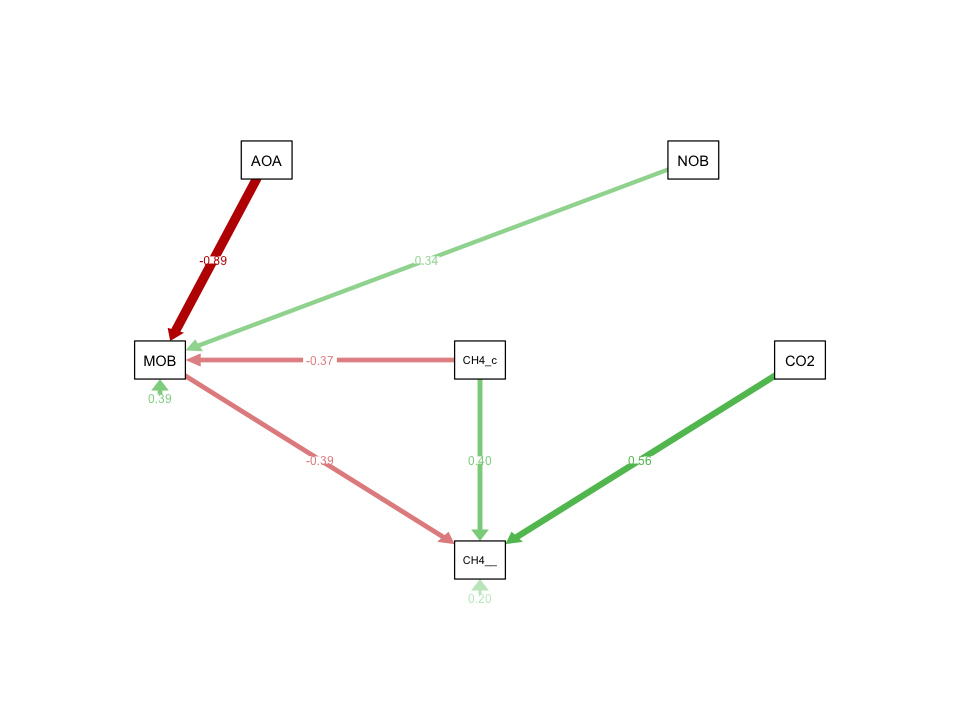

In [169]:
SEM_Plot <- semPaths(sem.ch4_mod0e.8, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree3',
                     optimizeLatRes=TRUE, style = "lisrel")#, #)#, nCharNodes = 6)
#filetype = "pdf", filename = "sem.ch4_mod0e.8_SEM_graph", height = 5, width = 6)


#EM_Plot <- semPaths(sem.ch4_mod0f.2, "std", style = "lisrel", layout='tree3', optimizeLatRes=TRUE, 
#                     exoCov=F, curvePivot = TRUE)

# 7) Latent SEM model testing:  CH4 & trophy -- Build up from 6

- note new output table reporting function added here, given formula cleanup differs 


#### Experiment 5 is output table

- start from best "simple" non-latent models
- note from early experiments that some dropped variables may improve latent var fit...


### a) evaluate past models

What are "good" models above?  depends on criteria-- 
- R2 vs. X2 vs. AIC vs. P 

- Models without CO2 (0f.2-0f.3) have low CH4 R2, but highest P values/ lowest X2 & AIC -- but not very good...
- substitution of AO_NOB for separate vars not esp. helpful (but includes AOB), e.g. 0f.1-0f.2
- Other best fitting models by P -value include 0e.2, 0.e7, to a lesser extent 0e.5 and 0e.6
- by AIC 0e.6 and 0f.1 are better (but lower P values)

##### For now, ignore no CO2 models... easy to retest
- gather and compare models for starting into latent models

In [170]:
# pass selected models from Exp 1 to Exp 4, Make initial Exp 4 table
pass_mods <- c("ch4_mod0","ch4_mod0d.3","ch4_mod0e.2", "ch4_mod0e.5", "ch4_mod0e.6", "ch4_mod0e.7", "ch4_mod0f.1")
ExL1_start_mods <- data.frame(Ex4_sem_model_table[Ex4_sem_model_table$model %in% pass_mods,])

In [171]:
# Gather model scores for these models
ExL1_start_res <- run_compare_sem_models(ExL1_start_mods, data, estimator = "mlm")
ExL1_start_res

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0d.3, sem.ch4_mod0e.2, sem.ch4_mod0e.5, sem.ch4_mod0e.6, sem.ch4_mod0e.7, sem.ch4_mod0f.1"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,CH4_H2,MOB_I
sem.ch4_mod0,ch4_mod0,ch4_mod0,base,0.000,84.9,16,49,2132.7,2239.3,1.000,0.797,0.797,0.257,0.133,0.811,0.633,0.315,0.814
sem.ch4_mod0d.3,ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,0.008,17.4,6,48,2012.9,2117.3,1.000,0.935,0.935,0.171,0.033,0.801,0.627,NA,NA
sem.ch4_mod0e.2,ch4_mod0e.2,ch4_mod0d.3,drop MOB_IIa ~ AOB,0.074,10.1,5,39,1700.6,1785.4,1.000,0.970,0.970,0.125,0.033,0.800,0.627,NA,NA
sem.ch4_mod0e.5,ch4_mod0e.5,ch4_mod0e.2,add MOB_IIa ~ Bulk_dens,0.050,12.6,6,48,1651.2,1755.6,1.000,0.963,0.963,0.130,0.025,0.804,0.676,NA,NA
sem.ch4_mod0e.6,ch4_mod0e.6,ch4_mod0e.2,drop CH4 ~ MOB_I,0.052,9.4,4,31,1498.3,1565.7,1.000,0.968,0.968,0.144,0.038,0.797,0.627,NA,NA
sem.ch4_mod0e.7,ch4_mod0e.7,ch4_mod0e.6,drop CH4 ~ INTERCEPT,0.071,10.1,5,30,1497.1,1562.3,1.000,0.970,0.970,0.126,0.041,0.800,0.627,NA,NA
sem.ch4_mod0f.1,ch4_mod0f.1,ch4_mod0e.8,subst. MOB_IIa ~ AO_NOB (NEW VAR),0.037,8.5,3,17,1016.8,1053.8,0.998,0.968,0.968,0.168,0.046,0.801,0.604,NA,NA


In [172]:
# Show formulas
ExL1_start_mods

,model_out,model,base,notes,CH4,CH4_H2,MOB_I,MOB_IIa,Other,formula
1,sem.ch4_mod0,ch4_mod0,ch4_mod0,base,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h,CH4_H2~ SRB_syn + CO2_mg_m2_h,MOB_I ~ CH4_H2 +CH4_ac,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h CH4_H2~ SRB_syn + CO2_mg_m2_h MOB_I ~ CH4_H2 +CH4_ac MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
1112,sem.ch4_mod0d.3,ch4_mod0d.3,ch4_mod0b.2,drop MOB_I ~ . ONLY,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
11122,sem.ch4_mod0e.2,ch4_mod0e.2,ch4_mod0d.3,drop MOB_IIa ~ AOB,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac
111223,sem.ch4_mod0e.5,ch4_mod0e.5,ch4_mod0e.2,add MOB_IIa ~ Bulk_dens,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h,,,MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac + Bulk_dens,,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + MOB_I + CO2_mg_m2_h MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac + Bulk_dens
111224,sem.ch4_mod0e.6,ch4_mod0e.6,ch4_mod0e.2,drop CH4 ~ MOB_I,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h,,,MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ CH4_ac + MOB_IIa + CO2_mg_m2_h MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac
1112241,sem.ch4_mod0e.7,ch4_mod0e.7,ch4_mod0e.6,drop CH4 ~ INTERCEPT,CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h,,,MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac,,CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac
111224111,sem.ch4_mod0f.1,ch4_mod0f.1,ch4_mod0e.8,subst. MOB_IIa ~ AO_NOB (NEW VAR),CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h,,,MOB_IIa ~ AO_NOB + CH4_ac,,CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h MOB_IIa ~ AO_NOB + CH4_ac


Note above models dropped MOB_I in CH4, and as independent, may wish to put back, along with CH4_H2

### b) define starting Latent model, based on model 0e.7

In [173]:
# start with model 0.e7:

mod_e.7 <- ExL1_start_mods[ExL1_start_mods$model == "ch4_mod0e.7",]
cat(mod_e.7$formula)

CH4_ug_m2_h ~ 0 + CH4_ac + MOB_IIa + CO2_mg_m2_h


MOB_IIa ~ AOA + NOB + CH4_H2 +CH4_ac


In [174]:
# Initialization translated to latent from mod0e.7 
# Instead of full function, add SEM response vars with string defs

CH4_comp <- 'CH4_ug_m2_h ~ 0 + CH4 + ox'         # latents for CH4gen, CH4ox, no-intercept
CH4_gen  <- 'CH4 <~ 1*CH4_ac + CO2_mg_m2_h'    # latent CH4gen
CH4_ox   <- 'ox  <~  1*MOB_IIa'                # latent CH4ox
MOB_IIa  <- 'MOB_IIa ~ NOB + AOA + CH4_ac'     # MOB_IIa mod
Other    <- ''

In [175]:
# Gather vars
response_vars <- c("CH4_comp", "CH4_gen", "CH4_ox","MOB_IIa", "Other")

In [176]:
# Build model table
sem_latent_table0 <- define_new_sem_table(mod_name = "ch4_lat0", response_vars)
sem_latent_table0

model_out,model,base,notes,CH4_comp,CH4_gen,CH4_ox,MOB_IIa,Other,formula
sem.ch4_lat0,ch4_lat0,ch4_lat0,base,CH4_ug_m2_h ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h,ox <~ 1*MOB_IIa,MOB_IIa ~ NOB + AOA + CH4_ac,,CH4_ug_m2_h ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h ox <~ 1*MOB_IIa MOB_IIa ~ NOB + AOA + CH4_ac


### c) run, evaluate, edit, compare latent mods 

- note starting point identical to "crazy_mod3" in v0.6, blind spec, some nonesense (further "crazy_mods 3a - 6a" a derived below")

##### i) build alternative models
- built from feedback cycle with results

In [177]:
# drop MOB_IIa ~ CH4_ac from lat0
ExL1_sem_model_table <- update_sem_model_table(sem_latent_table0, base_model = "ch4_lat0", 
                      new_mod_name = "ch4_lat0_a.1", 
                      notes = "drop MOB_IIa ~ CH4_ac",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ NOB + AOA"))
                      #non_feat_cols = c("model", "base", "notes", "formula"))

In [178]:
# ADD CH4_ox ~ 0*MOB_I to lat0
ExL1_sem_model_table <- update_sem_model_table(ExL1_sem_model_table, base_model = "ch4_lat0", 
                      new_mod_name = "ch4_lat0_a.2", 
                      notes = "ADD CH4_ox ~ 0*MOB_I",
                      formula_edits = c("CH4_ox", "ox <~ 1*MOB_IIa + 0*MOB_I"))

In [179]:
# ADD CH4_gen ~ CH4_H2 to 0_a.1
ExL1_sem_model_table <- update_sem_model_table(ExL1_sem_model_table, base_model = "ch4_lat0_a.2", 
                      new_mod_name = "ch4_lat0_a.3", 
                      notes = "ADD CH4_gen ~ CH4_H2",
                      formula_edits = c("CH4_gen", "CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h"))

In [180]:
# drop MOB_IIa ~ CH4_ac from lat0_a.3
ExL1_sem_model_table <- update_sem_model_table(ExL1_sem_model_table, base_model = "ch4_lat0_a.3", 
                      new_mod_name = "ch4_lat0_a.4", 
                      notes = "drop MOB_IIa ~ CH4_ac",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ NOB + AOA"))

In [181]:
# drop MOB_IIa ~ CH4_ac from lat0_a.3
ExL1_sem_model_table <- update_sem_model_table(ExL1_sem_model_table, base_model = "ch4_lat0_a.3", 
                      new_mod_name = "ch4_lat0_a.5", 
                      notes = "drop MOB_IIa ~ CH4_ac",
                      formula_edits = c("MOB_IIa", "MOB_IIa ~ NOB + AOA"))

In [182]:
# ExL1_sem_model_table

In [183]:
ch4_lat0_mod <- ExL1_sem_model_table$formula[4]
cat(ch4_lat0_mod)

# Calculate SEM
#sem.ch4_lat0_mod <- sem(ch4_lat0_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")

CH4_ug_m2_h ~ 0 + CH4 + ox
CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
ox <~ 1*MOB_IIa + 0*MOB_I
MOB_IIa ~ NOB + AOA + CH4_ac


#### ii) run alternative models

In [184]:
# Gather model scores for these models
ExL1_model_res <- suppressWarnings(run_compare_sem_models(ExL1_sem_model_table, data, estimator = "mlm"))
ExL1_model_res

[1] "ran SEM to create models: sem.ch4_lat0, sem.ch4_lat0_a.1, sem.ch4_lat0_a.2, sem.ch4_lat0_a.3, sem.ch4_lat0_a.4, sem.ch4_lat0_a.5"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa
sem.ch4_lat0,ch4_lat0,ch4_lat0,base,0.034,10.4,4,23,1273.3,1323.4,1.000,0.962,0.962,0.157,0.047,0.799,0.614
sem.ch4_lat0_a.1,ch4_lat0_a.1,ch4_lat0,drop MOB_IIa ~ CH4_ac,0.001,19.9,5,22,1280.8,1328.7,0.999,0.913,0.913,0.214,0.069,0.786,0.553
sem.ch4_lat0_a.2,ch4_lat0_a.2,ch4_lat0,ADD CH4_ox ~ 0*MOB_I,0.032,13.8,6,29,1514.8,1577.8,1.000,0.955,0.955,0.141,0.047,0.799,0.614
sem.ch4_lat0_a.3,ch4_lat0_a.3,ch4_lat0_a.2,ADD CH4_gen ~ CH4_H2,0.079,12.7,7,37,1699.3,1779.7,1.000,0.966,0.966,0.112,0.041,0.803,0.614
sem.ch4_lat0_a.4,ch4_lat0_a.4,ch4_lat0_a.3,drop MOB_IIa ~ CH4_ac,0.005,22.2,8,36,1706.8,1785.0,0.999,0.917,0.917,0.165,0.059,0.791,0.553
sem.ch4_lat0_a.5,ch4_lat0_a.5,ch4_lat0_a.3,drop MOB_IIa ~ CH4_ac,0.005,22.2,8,36,1706.8,1785.0,0.999,0.917,0.917,0.165,0.059,0.791,0.553


In [185]:
get_SEM_nonsig_vars(sem.ch4_lat0_a.3, p_cut =0.05)

,lhs,op,rhs,pvalue
5,CH4,<~,CH4_H2,0.10
9,MOB_IIa,~,NOB,0.07
22,CH4_ac,~~,AOA,0.08
29,CO2_mg_m2_h,~~,MOB_I,0.09


### d) report alternative models - new function for latents

In [186]:
clean_SEM_models_for_output_L1 = function(models, models_out){
    
    ### Clean up models ####  
    models <- models[, -ncol(models)]                           # drop formula column  
    models <- models[, -1]                                      # drop model out columns

    # Hide predictors in formulas
    models$CH4_comp <- gsub("  ", " ", models$CH4_comp)                   # Note there are double spaces in some, likely result of replace ~.
    models$CH4_comp <- gsub("CH4_ug_m2_h ~ ", "", models$CH4_comp)        # hide predictor

    models$CH4_gen <- gsub("  ", " ", models$CH4_gen)             # remove double spaces
    models$CH4_gen <- gsub("CH4 <~ ", "", models$CH4_gen)        # hide predictor     

    models$CH4_ox <- gsub("  ", " ", models$CH4_ox)             # remove double spaces
    models$CH4_ox <- gsub("ox <~ ", "", models$CH4_ox)        # hide predictor   
    
    models$MOB_IIa <- gsub("  ", " ", models$MOB_IIa)           # remove double spaces
    models$MOB_IIa <- gsub("MOB_IIa ~ ", " ", models$MOB_IIa)   # hide predictor          
    # return(models)
    
    # Merge with results
    results_tab <- merge(models_out, models, by = c('model', 'base', 'notes'))
    return(results_tab)
}


In [187]:
Exper5_results <- clean_SEM_models_for_output_L1(ExL1_sem_model_table, ExL1_model_res)
Exper5_results
# write.table(Exper5_results, 'SEM_models/SEM_Exper5_results.txt', sep ='\t', row.names =F)

model,base,notes,model_out,pvalue,chisq,df,npar,aic,bic,⋯,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa.x,CH4_comp,CH4_gen,CH4_ox,MOB_IIa.y,Other
ch4_lat0,ch4_lat0,base,sem.ch4_lat0,0.034,10.4,4,23,1273.3,1323.4,⋯,0.962,0.157,0.047,0.799,0.614,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa,NOB + AOA + CH4_ac,
ch4_lat0_a.1,ch4_lat0,drop MOB_IIa ~ CH4_ac,sem.ch4_lat0_a.1,0.001,19.9,5,22,1280.8,1328.7,⋯,0.913,0.214,0.069,0.786,0.553,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa,NOB + AOA,
ch4_lat0_a.2,ch4_lat0,ADD CH4_ox ~ 0*MOB_I,sem.ch4_lat0_a.2,0.032,13.8,6,29,1514.8,1577.8,⋯,0.955,0.141,0.047,0.799,0.614,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa + 0*MOB_I,NOB + AOA + CH4_ac,
ch4_lat0_a.3,ch4_lat0_a.2,ADD CH4_gen ~ CH4_H2,sem.ch4_lat0_a.3,0.079,12.7,7,37,1699.3,1779.7,⋯,0.966,0.112,0.041,0.803,0.614,0 + CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h,1*MOB_IIa + 0*MOB_I,NOB + AOA + CH4_ac,
ch4_lat0_a.4,ch4_lat0_a.3,drop MOB_IIa ~ CH4_ac,sem.ch4_lat0_a.4,0.005,22.2,8,36,1706.8,1785.0,⋯,0.917,0.165,0.059,0.791,0.553,0 + CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h,1*MOB_IIa + 0*MOB_I,NOB + AOA,
ch4_lat0_a.5,ch4_lat0_a.3,drop MOB_IIa ~ CH4_ac,sem.ch4_lat0_a.5,0.005,22.2,8,36,1706.8,1785.0,⋯,0.917,0.165,0.059,0.791,0.553,0 + CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h,1*MOB_IIa + 0*MOB_I,NOB + AOA,


### e) plot alternative models

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

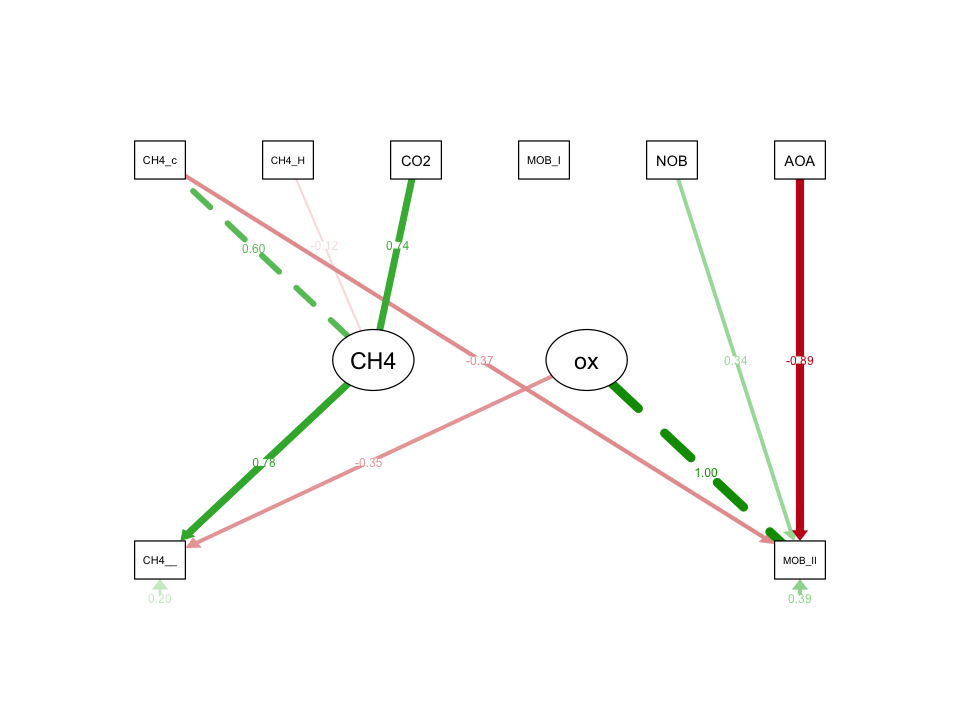

In [188]:
SEM_Plot <- semPaths(sem.ch4_lat0_a.3, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)
# filetype = "pdf", filename = "sem.ch4_lat0_a.3_SEM_graph", height = 5, width = 6)


# 8) Latent SEM II -- reduce from overspecificed (large inflated) model

Modeling steps here, Exper 5:

##### a) drop MOB_I and MOB_II, other NS vars
##### b) drop / swap CH4_ac predictors, get to elaborate models where all are sig
##### c) drop other model components, some sig just to improve X2
#####  d) add BD and H20_FPS, obtain HIGHLY SIGNIFICANT model (but complete)

### i) initialize model

In [189]:
# Initialization translated from earlier model attempts (manual)
# Instead of full function, add SEM response vars with string defs

CH4_comp <- 'CH4_ug_m2_h ~ CH4 + ox'                                           # latents for CH4gen, CH4ox, no-intercept
CH4_gen  <- 'CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L'                # latent CH4gen
CH4_ox   <- 'ox <~ 1*MOB_IIa + MOB_I + MOB_II'                                         # latent CH4ox
CH4_ac   <- 'CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L  + H2O_FPS + NP'        # CH4_ac pred 
CH4_H2   <- 'CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP'                    # CH4_H2 pred
MOB_IIa  <- 'MOB_IIa ~ NOB + AOA + 0*AOB + H2O_FPS'                                     # MOB_IIa pred
Other    <- ''

In [190]:
# Gather vars
response_vars <- c("CH4_comp", "CH4_gen", "CH4_ox","CH4_H2", "CH4_ac", "MOB_IIa", "Other")

In [191]:
#  Build model table
sem_latent_tableII.0 <- define_new_sem_table(mod_name = "ch4_lat2.0", response_vars)

In [192]:
# sem_latent_tableII.0

### ii) specify alternative models 

- based loosely on cruft experiments; however there are larger jumps there...
- submodels here may reflect some intermediate steps due to model editing process (one per var)
- however, care needed for organization...

Modeling steps here:

#### a) drop MOB_I and MOB_II, other NS vars
#### b) drop / swap CH4_ac predictors, get to elaborate models where all are sig
#### c) drop other model components, some sig just to improve X2
#### d) add BD and H20_FPS, obtain HIGHLY SIGNIFICANT model (but complete)

#### a) from "crazy model" drop MOB_I and MOB_II, other NS vars
- other NS vars are: CH4_ac ~ CO2

In [193]:
# drop ox ~ MOB_I (zero) in lat0
ExL2_sem_model_table <- update_sem_model_table(sem_latent_tableII.0, base_model = "ch4_lat2.0", 
                      new_mod_name = "ch4_lat2.0_a.1", 
                      notes = "zero CH4_ox ~ MOB_I",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + 0*MOB_I + MOB_II'))

In [194]:
# drop ox ~ MOB_II (zero) in lat0
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0", 
                      new_mod_name = "ch4_lat2.0_a.2", 
                      notes = "zero CH4_ox ~ MOB_II",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + MOB_I + 0*MOB_II'))

In [195]:
# drop ox ~ MOB_II in lat0
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0", 
                      new_mod_name = "ch4_lat2.0_a.3", 
                      notes = "drop CH4_ox ~ MOB_II",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + 0*MOB_I'))

#### b) sequential drop of remaining issues (starts with a.3 above, note CH4_ac was NS)
- note also that backward stepwise type approach shown not really effective here

In [196]:
# drop CH4_ac ~ CO2 in lat a.3
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_a.3", 
                      new_mod_name = "ch4_lat2.0_b.1", 
                      notes = "drop CH4_ac ~ CO2",
                      formula_edits = c("CH4_ac", 'CH4_ac ~ SRB_syn + DOC_mg_L  + H2O_FPS + NP'))

In [197]:
# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_b.1", 
                      new_mod_name = "ch4_lat2.0_b.2", 
                      notes = "drop CH4_ac ~ SRB_syn: ALL SIG",
                      formula_edits = c("CH4_ac", 'CH4_ac ~ DOC_mg_L  + H2O_FPS + NP'))

In [198]:
# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_a.3", 
                      new_mod_name = "ch4_lat2.0_b.3", 
                      notes = "swap CH4_ac ~ SRB_syn, CO2: ALL SIG",
                      formula_edits = c("CH4_ac", 'CH4_ac ~ SRB_syn + CO2_mg_m2_h'))


# CH4_ac   <- 'CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L  + H2O_FPS + NP'        # CH4_ac pred 

#### c) Note that CH4_flux ~ CH4_H2 is NS in above model 
- drop all CH4_H2 dependencies first, then CH4_H2 from CH4 pred

In [199]:
# Note that CH4_gen ~ CH4_H2 is NS in above model 
# drop all CH4_H2 dependencies first, then CH4_H2 from CH4 gen

# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_b.2", 
                      new_mod_name = "ch4_lat2.0_c.1", 
                      notes = "drop CH4_H2 ~ . ",
                      formula_edits = c("CH4_H2", ''))


In [200]:
# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.1", 
                      new_mod_name = "ch4_lat2.0_c.2", 
                      notes = "drop CH4_gen ~ CH4_H2: ALL SIG",
                      formula_edits = c("CH4_gen", 'CH4 <~ 1*CH4_ac + CO2_mg_m2_h + DOC_mg_L'))

In [201]:
# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.2", 
                      new_mod_name = "ch4_lat2.0_c.3", 
                      notes = "drop CH4_ac ~ . ALL SIG",
                      formula_edits = c("CH4_ac", ''))

In [202]:
# drop CH4_ac ~ SRB_syn in lat b.1 -- ALL SIG
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.3", 
                      new_mod_name = "ch4_lat2.0_c.4", 
                      notes = "drop CH4_gen ~ DOC: ALL SIG",
                      formula_edits = c("CH4_ac", ''))

In [203]:
# drop CH4_ac ~ DOC, to save params, pred
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.4", 
                      new_mod_name = "ch4_lat2.0_c.5", 
                      notes = "drop CH4_ac ~ DOC",
                      formula_edits = c("CH4_gen", 'CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h'))

In [204]:
# drop CH4_gen ~ CH4_H2, NS in above
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.5", 
                      new_mod_name = "ch4_lat2.0_c.6", 
                      notes = "drop CH4_gen ~ CH4_H2",
                      formula_edits = c("CH4_gen", 'CH4 <~ 1*CH4_ac + CO2_mg_m2_h'))

In [205]:
# drop CH4_flux ~ intercept, NS in above
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.6", 
                      new_mod_name = "ch4_lat2.0_c.7", 
                      notes = "drop CH4_comp ~ intercept: ALL SIG",
                      formula_edits = c("CH4_comp", 'CH4_ug_m2_h ~ 0 + CH4 + ox'))

In [206]:
# drop CH4_flux ~ intercept, NS in above
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.5", 
                      new_mod_name = "ch4_lat2.0_c.8", 
                      notes = "drop CH4_comp ~ intercept",
                      formula_edits = c("CH4_comp", 'CH4_ug_m2_h ~ 0 + CH4 + ox'))

In [207]:
# drop MOB_IIa ~ AOB, was 0*
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.7", 
                      new_mod_name = "ch4_lat2.0_c.9", 
                      notes = "drop MOB_IIa ~ AOB",
                      formula_edits = c("MOB_IIa", 'MOB_IIa ~ NOB + AOA + H2O_FPS'))

#### d) start adding in bulk density, H20 filled pore space
- obtain HIGHLY SIGNIFICANT model

In [208]:
# drop CH4_flux ~ intercept, NS in above
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.9", 
                      new_mod_name = "ch4_lat2.0_d.1", 
                      notes = "add CH4_ox ~ H2O_FPS",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + 0*MOB_I + H2O_FPS'))

In [209]:
# add CH4_ox ~ BD
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_c.9", 
                      new_mod_name = "ch4_lat2.0_d.2", 
                      notes = "add CH4_ox ~ BD",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + 0*MOB_I + Bulk_dens'))

In [210]:
# add CH4_ox ~ BD
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_d.2", 
                      new_mod_name = "ch4_lat2.0_d.3", 
                      notes = "drop CH4_ox ~ 0*MOB_I ",
                      formula_edits = c("CH4_ox", 'ox <~ 1*MOB_IIa + Bulk_dens'))

In [211]:
# add CH4_ox ~ BD
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_d.2", 
                      new_mod_name = "ch4_lat2.0_d.4", 
                      notes = "add CH4_gen ~ H2O_FPS ",
                      formula_edits = c("CH4_gen", 'CH4 <~ 1*CH4_ac + CO2_mg_m2_h + H2O_FPS'))

In [212]:
# add CH4_ox ~ BD
ExL2_sem_model_table <- update_sem_model_table(ExL2_sem_model_table, base_model = "ch4_lat2.0_d.2", 
                      new_mod_name = "ch4_lat2.0_d.5", 
                      notes = "add CH4_gen ~ BD",
                      formula_edits = c("CH4_gen", 'CH4 <~ 1*CH4_ac + CO2_mg_m2_h + Bulk_dens'))

In [213]:
# ExL2_sem_model_table$formula

In [214]:
# Exper6_results <- clean_SEM_models_for_output_L1(ExL2_sem_model_table, ExL2_model_res)
# Exper6_results

### iii) model comparisons

In [215]:
#sem_latent_tableII.0
ExL2_model_res <- suppressWarnings(run_compare_sem_models(ExL2_sem_model_table, data, estimator = "mlm"))
ExL2_model_res

[1] "ran SEM to create models: sem.ch4_lat2.0, sem.ch4_lat2.0_a.1, sem.ch4_lat2.0_a.2, sem.ch4_lat2.0_a.3, sem.ch4_lat2.0_b.1, sem.ch4_lat2.0_b.2, sem.ch4_lat2.0_b.3, sem.ch4_lat2.0_c.1, sem.ch4_lat2.0_c.2, sem.ch4_lat2.0_c.3, sem.ch4_lat2.0_c.4, sem.ch4_lat2.0_c.5, sem.ch4_lat2.0_c.6, sem.ch4_lat2.0_c.7, sem.ch4_lat2.0_c.8, sem.ch4_lat2.0_c.9, sem.ch4_lat2.0_d.1, sem.ch4_lat2.0_d.2, sem.ch4_lat2.0_d.3, sem.ch4_lat2.0_d.4, sem.ch4_lat2.0_d.5"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,CH4_ug_m2_h,MOB_IIa,CH4_ac,CH4_H2
sem.ch4_lat2.0,ch4_lat2.0,ch4_lat2.0,base,0.000,154.4,27,92,2069.2,2269.2,1,0.707,0.707,0.269,0.060,0.836,0.659,0.646,0.661
sem.ch4_lat2.0_a.1,ch4_lat2.0_a.1,ch4_lat2.0,zero CH4_ox ~ MOB_I,0.000,154.4,28,91,2067.2,2265.0,1,0.710,0.710,0.264,0.060,0.836,0.659,0.646,0.661
sem.ch4_lat2.0_a.2,ch4_lat2.0_a.2,ch4_lat2.0,zero CH4_ox ~ MOB_II,0.000,155.8,28,91,2068.6,2266.4,1,0.706,0.706,0.265,0.059,0.831,0.659,0.646,0.661
sem.ch4_lat2.0_a.3,ch4_lat2.0_a.3,ch4_lat2.0,drop CH4_ox ~ MOB_II,0.000,140.9,25,79,1789.1,1960.9,1,0.727,0.727,0.267,0.053,0.831,0.659,0.646,0.661
sem.ch4_lat2.0_b.1,ch4_lat2.0_b.1,ch4_lat2.0_a.3,drop CH4_ac ~ CO2,0.000,141.4,26,78,1787.7,1957.3,1,0.728,0.728,0.261,0.055,0.828,0.659,0.643,0.661
sem.ch4_lat2.0_b.2,ch4_lat2.0_b.2,ch4_lat2.0_b.1,drop CH4_ac ~ SRB_syn: ALL SIG,0.000,146.3,27,77,1790.5,1958.0,1,0.719,0.719,0.261,0.059,0.829,0.659,0.615,0.661
sem.ch4_lat2.0_b.3,ch4_lat2.0_b.3,ch4_lat2.0_a.3,"swap CH4_ac ~ SRB_syn, CO2: ALL SIG",0.000,195.9,28,76,1838.1,2003.4,1,0.605,0.605,0.304,0.132,0.800,0.659,0.174,0.661
sem.ch4_lat2.0_c.1,ch4_lat2.0_c.1,ch4_lat2.0_b.2,drop CH4_H2 ~ .,0.000,92.0,19,71,1679.9,1834.3,1,0.766,0.766,0.243,0.052,0.828,0.659,0.615,NA
sem.ch4_lat2.0_c.2,ch4_lat2.0_c.2,ch4_lat2.0_c.1,drop CH4_gen ~ CH4_H2: ALL SIG,0.000,58.8,17,60,1486.9,1617.3,1,0.851,0.851,0.194,0.046,0.817,0.659,0.615,NA
sem.ch4_lat2.0_c.3,ch4_lat2.0_c.3,ch4_lat2.0_c.2,drop CH4_ac ~ . ALL SIG,0.000,37.8,10,55,1601.7,1721.2,1,0.865,0.865,0.207,0.042,0.819,0.659,NA,NA


In [216]:
get_SEM_nonsig_vars(sem.ch4_lat2.0_d.2, p_cut =0.05)

,lhs,op,rhs,pvalue
8,ox,<~,Bulk_dens,0.07
20,CH4_ac,~~,Bulk_dens,0.19
22,CH4_ac,~~,AOA,0.08
25,CO2_mg_m2_h,~~,MOB_I,0.09
29,CO2_mg_m2_h,~~,H2O_FPS,0.05
41,NOB,~~,H2O_FPS,0.66


In [217]:
# summary(sem.ch4_lat2.0_c.2) 

### iv) model reporting

In [218]:
# Gather model scores for these models
Exper6_results <- clean_SEM_models_for_output_L1(ExL2_sem_model_table, ExL2_model_res)
Exper6_results

model,base,notes,model_out,pvalue,chisq,df,npar,aic,bic,⋯,MOB_IIa.x,CH4_ac.x,CH4_H2.x,CH4_comp,CH4_gen,CH4_ox,CH4_H2.y,CH4_ac.y,MOB_IIa.y,Other
ch4_lat2.0,ch4_lat2.0,base,sem.ch4_lat2.0,0.000,154.4,27,92,2069.2,2269.2,⋯,0.659,0.646,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + MOB_I + MOB_II,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_a.1,ch4_lat2.0,zero CH4_ox ~ MOB_I,sem.ch4_lat2.0_a.1,0.000,154.4,28,91,2067.2,2265.0,⋯,0.659,0.646,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I + MOB_II,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_a.2,ch4_lat2.0,zero CH4_ox ~ MOB_II,sem.ch4_lat2.0_a.2,0.000,155.8,28,91,2068.6,2266.4,⋯,0.659,0.646,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + MOB_I + 0*MOB_II,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_a.3,ch4_lat2.0,drop CH4_ox ~ MOB_II,sem.ch4_lat2.0_a.3,0.000,140.9,25,79,1789.1,1960.9,⋯,0.659,0.646,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + CO2_mg_m2_h + DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_b.1,ch4_lat2.0_a.3,drop CH4_ac ~ CO2,sem.ch4_lat2.0_b.1,0.000,141.4,26,78,1787.7,1957.3,⋯,0.659,0.643,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_b.2,ch4_lat2.0_b.1,drop CH4_ac ~ SRB_syn: ALL SIG,sem.ch4_lat2.0_b.2,0.000,146.3,27,77,1790.5,1958.0,⋯,0.659,0.615,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_b.3,ch4_lat2.0_a.3,"swap CH4_ac ~ SRB_syn, CO2: ALL SIG",sem.ch4_lat2.0_b.3,0.000,195.9,28,76,1838.1,2003.4,⋯,0.659,0.174,0.661,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,CH4_H2 ~ SRB_syn + CO2_mg_m2_h + H2O_FPS + NP,CH4_ac ~ SRB_syn + CO2_mg_m2_h,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_c.1,ch4_lat2.0_b.2,drop CH4_H2 ~ .,sem.ch4_lat2.0_c.1,0.000,92.0,19,71,1679.9,1834.3,⋯,0.659,0.615,NA,CH4 + ox,1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,,CH4_ac ~ DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_c.2,ch4_lat2.0_c.1,drop CH4_gen ~ CH4_H2: ALL SIG,sem.ch4_lat2.0_c.2,0.000,58.8,17,60,1486.9,1617.3,⋯,0.659,0.615,NA,CH4 + ox,1*CH4_ac + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,,CH4_ac ~ DOC_mg_L + H2O_FPS + NP,NOB + AOA + 0*AOB + H2O_FPS,
ch4_lat2.0_c.3,ch4_lat2.0_c.2,drop CH4_ac ~ . ALL SIG,sem.ch4_lat2.0_c.3,0.000,37.8,10,55,1601.7,1721.2,⋯,0.659,NA,NA,CH4 + ox,1*CH4_ac + CO2_mg_m2_h + DOC_mg_L,1*MOB_IIa + 0*MOB_I,,,NOB + AOA + 0*AOB + H2O_FPS,


### v) plot best models

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

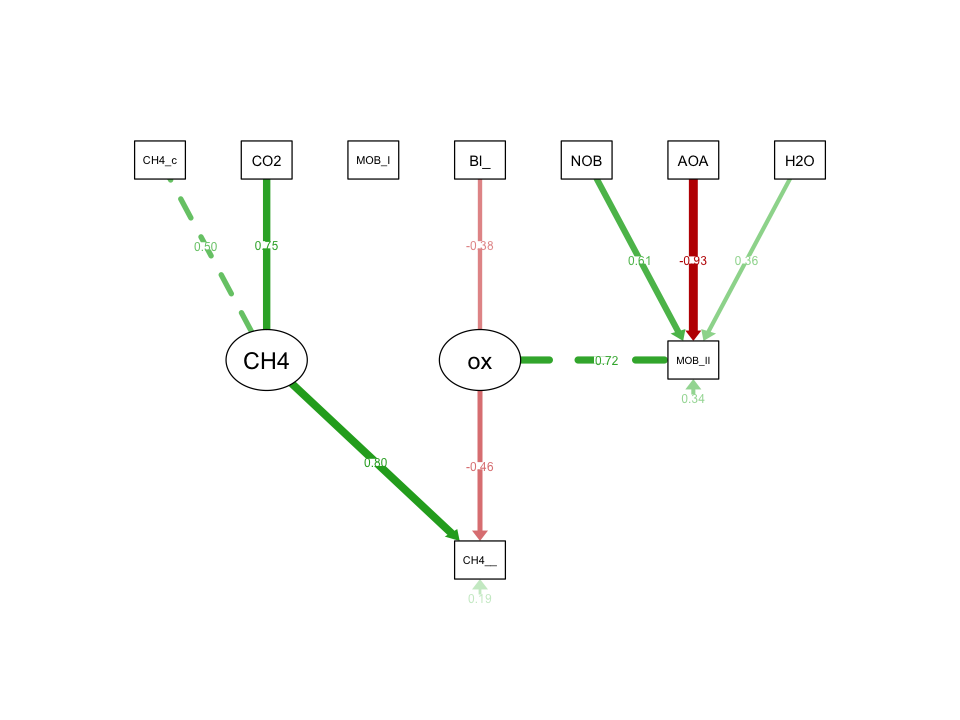

In [219]:
SEM_Plot <- semPaths(sem.ch4_lat2.0_d.2, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#,
#filetype = "pdf", filename = "sem.ch4_lat2.0_d.2_SEM_graph", height = 5, width = 6)

#### ii) model cruft / init testing

In [220]:
crazy_mod <- 'CH4_logn1 ~ CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I 
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h  + H2O_FPS + NP
              CH4_ac ~ + SRB_syn + CO2_mg_m2_h + DOC_mg_L  + H2O_FPS + NP   
              MOB_IIa ~ NOB + AOA + 0*AOB + H2O_FPS'

In [221]:
# less crazy model
crazy_mod2 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa + 0*MOB_II + 0*MOB_I
              CH4_H2 ~ SRB_syn + CO2_mg_m2_h
              CH4_ac ~ SRB_syn + CO2_mg_m2_h
              MOB_IIa ~ NOB + AOA'

In [222]:
# less crazy model
crazy_mod3 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [223]:
# less crazy model
crazy_mod3a <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [224]:
# less crazy model
crazy_mod3b <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_H2'

In [225]:
# less crazy model
crazy_mod4 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + Firmic'

In [226]:
# less crazy model -- no latent for ox, only MOB_IIa
crazy_mod5 <- 'CH4_logn1 ~ 0 + CH4 + MOB_IIa
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h
              MOB_IIa ~ NOB + AOA + Firmic'

In [227]:
# less crazy model
crazy_mod6 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h 
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + Firmic + Bulk_dens'

In [228]:
# less crazy model
crazy_mod6a <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa  + Bulk_dens 
              MOB_IIa ~ NOB + AOA + Firmic'

In [229]:
sem.crazy_mod <- sem(crazy_mod3, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

In [230]:
get_SEM_nonsig_vars(sem.crazy_mod, p_cut =0.05)

,lhs,op,rhs,pvalue
8,MOB_IIa,~,NOB,0.07
20,CH4_ac,~~,AOA,0.08


In [231]:
sem_fit_sum(sem.crazy_mod, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
sem.crazy_mod,0.032,13.755,6,29,1491.512,1554.569,1,0.955,0.955,0.141,0.048


In [232]:
sem_mi_table(sem.crazy_mod)

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
64,NOB,~,MOB_IIa,3432903.2,3370104.7,-801.63981,-801.63981,-974.31801,-974.31801
76,CH4_ac,~,MOB_IIa,2727003.6,2677118.2,-387.30223,-387.30223,-522.50114,-522.50114
70,AOA,~,MOB_IIa,2394447.5,2350645.6,438.52348,438.52348,312.96076,312.96076
49,MOB_IIa,~,CH4,585800.6,575084.5,-67.35963,-269.30066,-94.04654,-94.04654
39,CH4,=~,CH4_logn1,179726.8,176439.0,4.42197,17.67883,17.18558,17.18558
69,AOA,~,CH4_logn1,139923.5,137363.9,180.16848,180.16848,46.19241,46.19241


In [233]:
summary(sem.crazy_mod)

lavaan (0.5-23.1097) converged normally after  65 iterations

  Number of observations                            65

  Estimator                                         ML      Robust
  Minimum Function Test Statistic               13.755      13.504
  Degrees of freedom                                 6           6
  P-value (Chi-square)                           0.032       0.036
  Scaling correction factor                                  1.019
    for the Satorra-Bentler correction

Parameter Estimates:

  Information                                 Expected
  Standard Errors                           Robust.sem

Composites:
                   Estimate  Std.Err  z-value  P(>|z|)
  CH4 <~                                              
    CH4_ac            1.000                           
    CH4_H2            0.000                           
    CO2_mg_m2_h       6.888    0.870    7.918    0.000
  ox <~                                               
    MOB_IIa           1.000     

##### i) new simple latent models

In [234]:
# NEW HERE, SIMPLE

meth_mod <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa + 0*MOB_I                  
              MOB_IIa ~ NOB + AOA + CH4_ac'

# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [235]:
# NEW HERE, SIMPLE

meth_mod <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa + 0*MOB_I                  
              MOB_IIa ~ NOB + AOA'

# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [236]:
# NEW HERE, SIMPLE

meth_mod <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CO2_mg_m2_h
              ox  <~  1*MOB_IIa                  
              MOB_IIa ~ NOB + AOA + CH4_ac'

# MOB_I ~~ MOB_IIa'
# AOA ~ CN

##### ii) old complicated latent models

##### iii) run models and plot

In [237]:
meth_mod.sem <- sem(meth_mod, data=data, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

In [238]:
get_SEM_nonsig_vars(meth_mod.sem, p_cut =0.05)

,lhs,op,rhs,pvalue
7,MOB_IIa,~,NOB,0.07
18,CH4_ac,~~,AOA,0.08


In [239]:
# Get summary of fit
sem_fit_sum(meth_mod.sem, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
meth_mod.sem,0.019,11.847,4,23,1267.572,1317.583,1,0.954,0.954,0.174,0.05


In [240]:
# Get R2: 
get_SEM_R2s(meth_mod.sem)

model,CH4_logn1,MOB_IIa
meth_mod.sem,0.8,0.614


In [241]:
#fitMeasures(meth_mod.sem, c("gfi", "cfi", "rni"))   # Intersting, in CFA says this is more important than X2

In [242]:
#summary(meth_mod.sem, standardized=TRUE, rsq=TRUE, fit.measures=TRUE) # Get summary w. r2, std. coef

In [243]:
mi2 <- modindices(meth_mod.sem); 
mi2[mi2$mi > 10,]

,lhs,op,rhs,mi,mi.scaled,epc,sepc.lv,sepc.all,sepc.nox
1,CH4_logn1,~1,,7.351717e+02,6.730987e+02,1.546514e+00,1.546514e+00,1.5033643,1.503364e+00
32,CH4,=~,CH4_logn1,1.797265e+05,1.645516e+05,4.421961e+00,1.767883e+01,17.1855687,1.718557e+01
36,CH4_logn1,~~,MOB_IIa,9.513451e+03,8.710198e+03,-9.903191e+00,-9.903191e+00,-3.3619489,-3.361949e+00
37,CH4_logn1,~,MOB_IIa,5.441422e+02,4.981984e+02,1.241542e-01,1.241542e-01,0.3455938,3.455938e-01
38,CH4_logn1,~,NOB,5.068016e+02,4.640106e+02,9.625786e-02,9.625786e-02,0.2204552,9.357213e-02
40,CH4_logn1,~,CH4_ac,1.084982e+03,9.933735e+02,1.815904e-01,1.815904e-01,0.3746804,1.765238e-01
41,MOB_IIa,~,CH4_logn1,9.513451e+03,8.710198e+03,-4.683200e+01,-4.683200e+01,-16.8243414,-1.682434e+01
42,MOB_IIa,~,CH4,5.883893e+05,5.387096e+05,-6.750817e+01,-2.698951e+02,-94.2541938,-9.425419e+01
56,NOB,~,CH4_logn1,2.070798e+04,1.895953e+04,3.741815e+01,3.741815e+01,16.3379741,1.633797e+01
57,NOB,~,MOB_IIa,3.231907e+07,2.959027e+07,1.081644e+04,1.081644e+04,13146.3381171,1.314634e+04


In [244]:
fit <- lavaan:::sem(meth_mod, data = Guild_CH4_d, std.lv = TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: could not compute standard errors!
  lavaan NOTE: this may be a symptom that the model is not identified.
”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

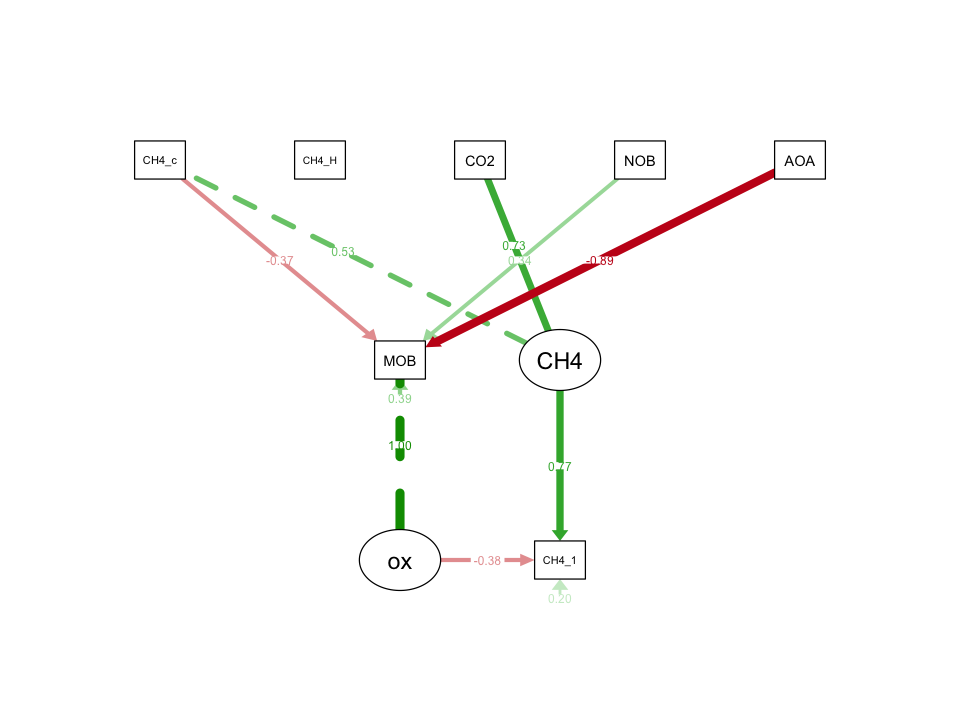

In [245]:
options(repr.plot.width=8, repr.plot.height=6) 
#semPaths(meth_mod.sem, "std", style = "lisrel", layout='tree2', optimizeLatRes=TRUE, 
#         curvePivot = TRUE, exoCov=F)#, filetype="pdf", filename="PrintSEM_test_CO2")#, label.scale=F, node.height=10)

SEM_Plot <- semPaths(sem.crazy_mod, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")

In [246]:
SEM_Plot

From		To	Weight
8 	 --> 	 1 	 0.77 
9 	 --> 	 1 	 -0.38 
8 	 --- 	 3 	 0.53 
8 	 --- 	 5 	 0.73 
9 	 --- 	 2 	 1 
6 	 --> 	 2 	 0.34 
7 	 --> 	 2 	 -0.89 
3 	 --> 	 2 	 -0.37 
1 	 --> 	 1 	 0.2 
2 	 --> 	 2 	 0.39 
NULL

# 9) Latent SEM model:  Decomp + CH4 & ox

### i) initialize model

In [247]:
# Initialization translated from earlier model attempts (manual)
# Instead of full function, add SEM response vars with string defs

CH4_comp <- 'CH4_ug_m2_h ~ CH4 + ox'                                           # latents for CH4gen, CH4ox, no-intercept
DCMP_lat <- 'DCMP =~ CO2_mg_m2_h'
DCMP     <- 'DCMP ~  H2O_FPS + C' 
CH4_gen  <- 'CH4 <~ CH4_ac + 1*DCMP'                                           # latent CH4gen
CH4_ox   <- 'ox <~ 1*MOB_IIa + MOB_I + MOB_II'                                 # latent CH4ox
MOB_IIa  <- 'MOB_IIa ~ NOB + AOA + H2O_FPS'                            # MOB_IIa pred
CH4_ac   <- ''                                                                 # CH4_ac pred 
CH4_H2   <- ''                                                                 # CH4_H2 pred
Other    <- ''

In [248]:
# Gather vars
response_vars <- c("CH4_comp", "DCMP_lat", "DCMP", "CH4_gen", "CH4_ox","CH4_H2", "MOB_IIa", "CH4_ac", "Other")

In [249]:
#  Build model table
sem_latent_tableIII.0 <- define_new_sem_table(mod_name = "ch4_lat3.0", response_vars)

In [250]:
sem_latent_tableIII.0

model_out,model,base,notes,CH4_comp,DCMP_lat,DCMP,CH4_gen,CH4_ox,CH4_H2,MOB_IIa,CH4_ac,Other,formula
sem.ch4_lat3.0,ch4_lat3.0,ch4_lat3.0,base,CH4_ug_m2_h ~ CH4 + ox,DCMP =~ CO2_mg_m2_h,DCMP ~ H2O_FPS + C,CH4 <~ CH4_ac + 1*DCMP,ox <~ 1*MOB_IIa + MOB_I + MOB_II,,MOB_IIa ~ NOB + AOA + H2O_FPS,,,CH4_ug_m2_h ~ CH4 + ox DCMP =~ CO2_mg_m2_h DCMP ~ H2O_FPS + C CH4 <~ CH4_ac + 1*DCMP ox <~ 1*MOB_IIa + MOB_I + MOB_II MOB_IIa ~ NOB + AOA + H2O_FPS


### vii) dev cruft

### DCMP models

In [251]:
meth_mod <- 'CH4_logn1 ~ CH4 + ox 
              DCMP =~ CO2_mg_m2_h + DOC_mg_L + C + NP + NP_ext + NH4_N 
              
              CH4 <~ 1*CH4_ac + CH4_H2 + DCMP 
              ox  <~ 1*MOB_IIa + 0*MOB_I 
              DCMP ~ Bulk_dens + NP + NP_ext  
              CH4_ac ~ DCMP + DOC_mg_L 
              CH4_H2 ~ DCMP + DOC_mg_L 
              MOB_IIa ~ AOA + AOB + NOB
              MOB_IIa ~~ CH4_ac'

In [252]:
meth_mod2 <- 'CH4_logn1 ~ CH4 + ox 
              DCMP =~ CO2_mg_m2_h #+ C + NP + NP_ext + NH4_N 
              DCMP ~ H2O_FPS + CN #+ NP_ext + NH4_N 

              CH4 <~ 1*CH4_ac + DCMP 
              ox  <~ 1*MOB_IIa + 0*MOB_I 
               
              CH4_ac ~ DCMP + DOC_mg_L 
              MOB_IIa ~ AOA + AOB + NOB
              MOB_IIa ~~ CH4_ac'

In [253]:
meth_mod3 <- 'CH4_logn1 ~ CH4 + ox 
              DCMP =~ CO2_mg_m2_h #+ C + NP + NP_ext + NH4_N 
              DCMP ~  H2O_FPS + CN # + C + NP_ext + NH4_N + DOC_mg_L 

              CH4 <~ 1*CH4_ac + DCMP #+ SRB
              ox  <~ 1*MOB_IIa + 0*MOB_I #+ H2O_FPS
               
              MOB_IIa ~ AOA + NOB'

In [254]:
# This one is pretty, next one more significant
meth_mod4 <- 'CH4_logn1 ~ CH4 + ox 
              DCMP =~ CO2_mg_m2_h #+ C + NP + NP_ext + NH4_N 
              DCMP ~  H2O_FPS + C # CN #+ C + DOC_mg_L 

              CH4 <~ CH4_ac + 1*DCMP #+ SRB
              ox  <~ 1*MOB_IIa + 0*MOB_I + Bulk_dens
               
              MOB_IIa ~ AOA + NOB #+ H2O_FPS'

In [255]:
# This one is pretty, next one more significant
meth_mod5 <- 'CH4_logn1 ~ 0+ CH4 + ox 
              CH4 <~ 1*CH4_ac + 1*CO2_mg_m2_h
              ox  <~ 1*MOB_IIa + Bulk_dens + N
               
              MOB_IIa ~ AOA + NOB + H2O_FPS #+ CH4_ac'

In [256]:
colnames(Guild_CH4_d)

[1] "Sample"      "CH4_ug_m2_h" "CH4_logn1"   "CO2_mg_m2_h" "CH4_CO2"    
 [6] "Bulk_dens"   "H2O_FPS"     "pH"          "C"           "N"          
[11] "P"           "CN"          "NP"          "NO3_N"       "NH4_N"      
[16] "Olsen_P"     "NP_ext"      "Salinity.x"  "Cl"          "SO4"        
[21] "SO4_pw"      "Fe"          "Fe_pw"       "DOC_mg_L"    "CH4_H2"     
[26] "CH4_ac"      "MOB_I"       "MOB_II"      "MOB_IIa"     "MeOB"       
[31] "AOA"         "AOB"         "NOB"         "Anamx"       "SOxB"       
[36] "SRB_syn"     "SRB"         "FeOB"        "FeRB"        "Actino"     
[41] "Chlorf"      "Firmic"      "AO_NOB"      "NOB_AO"      "mcr_pmo"    
[46] "pmo_mcr"

### Run SEM / diagnostics / plot

In [257]:
#meth_mod.sem <- cfa(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")    # Generates observed var > 1000 x warning, divide otu vas try again
meth_mod.sem <- sem(meth_mod5, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)
# meth_mod.sem <- cfa(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", std.lv = TRUE)# Generates observed var > 1000 x warning, divide otu vas try again

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

In [258]:
# Extract measures of interest                      # want > 0.95 
fitMeasures(meth_mod.sem, c("gfi", "cfi", "rni"))   # Intersting, in CFA says this is more important than X2

gfi   cfi   rni 
1.000 0.688 0.688

In [259]:
#summary(meth_mod.sem)                             # Get summary
#summary(meth_mod.sem, standardized=TRUE, rsq=TRUE) # Get summary w. r2, std. coef
summary(meth_mod.sem, standardized=TRUE, rsq=TRUE, fit.measures=TRUE) # Get summary w. r2, std. coef

lavaan (0.5-23.1097) converged normally after 177 iterations

  Number of observations                            65

  Estimator                                         ML      Robust
  Minimum Function Test Statistic               68.428      64.900
  Degrees of freedom                                 9           9
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.054
    for the Satorra-Bentler correction

Model test baseline model:

  Minimum Function Test Statistic              205.462     244.422
  Degrees of freedom                                15          15
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.688       0.756
  Tucker-Lewis Index (TLI)                       0.480       0.594

  Robust Comparative Fit Index (CFI)                         0.694
  Robust Tucker-Lewis Index (TLI)       

In [260]:
# Compare R2 to lm, basically identical
# lmtest <- lm(CH4_logn1~CH4_ac+CH4_H2+MOB_IIa+MOB_I + NOB, data= Guild_CH4_d)
# summary(lmtest)

In [261]:
# library(corrplot)

In [262]:
plot_matrix <- function(matrix_toplot){
corrplot(matrix_toplot, is.corr = FALSE, 
               type = 'lower', 
               order = "original", 
               tl.col='black', tl.cex=.75)
}

# 10) Plot models for comparison and clarity

#### i) "model 4" above

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: could not compute standard errors!
  lavaan NOTE: this may be a symptom that the model is not identified.
”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

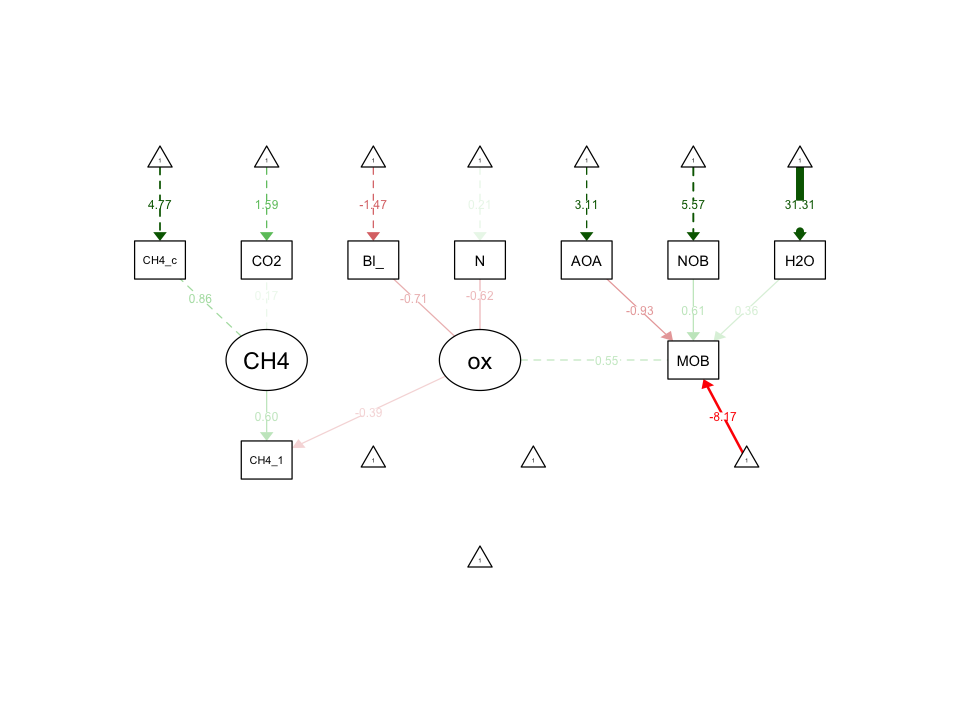

In [263]:
fit <- lavaan:::sem(meth_mod5, data = Guild_CH4_d, std.lv = TRUE)

semPaths(fit, "std", style = "lisrel", layout='tree2', optimizeLatRes=TRUE, residuals=FALSE, 
        curvePivot = TRUE, exoCov=F)#, 
# filetype = "tiff", filename = "sem.ch4_mod0e.8_SEM_graph", height = 5, width = 6)

#### ii) model 5 above

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

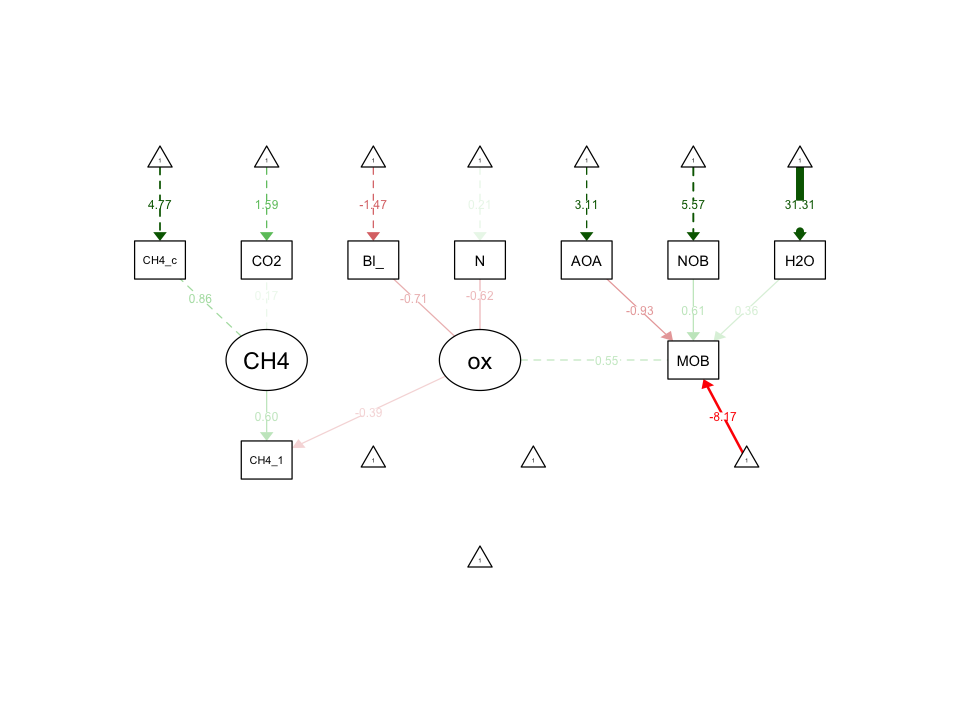

In [264]:
fit <- lavaan:::sem(meth_mod5, data = Guild_CH4_d, fixed_x = FALSE, orthogonal = TRUE, std.lv = TRUE)

semPaths(fit, "std", style = "lisrel", layout='tree2', optimizeLatRes=FALSE, residuals=FALSE, 
        curvePivot = TRUE, exoCov=F) 
# filetype = "tiff", filename = "sem.ch4_mod0e.8_SEM_graph", height = 5, width = 6)

# XX Feb 21 models

In [353]:
head(Guild_CH4_0)

,CH4_ug_m2_h,CH4_logn1,CO2_mg_m2_h,CH4_CO2,Bulk_dens,H2O_FPS,pH,C,N,P,⋯,SRB,FeOB,FeRB,Actino,Chlorf,Firmic,AO_NOB,NOB_AO,mcr_pmo,pmo_mcr
1,0.472344434,0.5218678,1.05517851,-1.582834,-0.4475316,1.871870,0.7958800,0.9127533,-0.2225732,-1.0315171,⋯,14.19197,11.88227,14.02005,14.78102,15.37966,13.10205,-1.366962,1.366962,-4.307834,4.307834
2,0.472344434,0.5218678,1.05517851,-1.582834,-0.4304467,1.863437,0.7817554,0.8561244,-0.3010300,-1.0222764,⋯,16.05117,13.68903,13.48693,14.72349,15.56168,13.70882,-2.843382,2.843382,-5.369971,5.369971
3,0.005190917,0.1368549,0.56450338,-1.559312,-0.4583895,1.876980,0.7944880,0.9227255,-0.2276783,-0.9665762,⋯,14.19529,12.69987,14.06875,14.97585,15.23485,12.77730,-1.322760,1.322760,-4.291047,4.291047
4,0.005190917,0.1368549,0.56450338,-1.559312,-0.3957837,1.844697,0.7730547,0.8082110,-0.3381873,-1.0915150,⋯,16.73951,13.91431,13.69783,13.94191,15.62162,13.03539,-2.964373,2.964373,-5.927794,5.927794
7,0.038122722,0.1614124,0.03842647,-1.000304,-0.3031784,1.842354,0.7589119,0.7315888,-0.4100504,-1.0457575,⋯,15.00141,13.00481,15.25833,14.96689,15.52525,14.07013,-2.408715,2.408715,-4.825975,4.825975
8,0.267422593,0.3442878,0.43166113,-1.164239,-0.4105685,1.864015,0.7817554,0.8591383,-0.2806687,-1.0087739,⋯,13.28578,11.73378,13.92748,14.03329,15.16098,12.69448,-1.193622,1.193622,-3.990608,3.990608


In [ ]:
 #fch4.2.2_mob2af.11_ac.2a.82# "CH4_gen + CH4_ox"	"1*CH4_ac + CO2_mg_m2_h"	"1*MOB_IIa + Bulk_dens"	"NOB + Salinity.x + Bulk_dens + AOA"	"Salinity.x + H2O_FPS + SRB"

In [356]:
fch4.2.2_mob2af.11_ac.2a.82 <- 'CH4_logn1 ~ CH4_gen + CH4_ox
                                CH4_gen <~ 1*CH4_ac + CO2_mg_m2_h
                                CH4_ox <~ 1*MOB_IIa + Bulk_dens
                                MOB_IIa ~ NOB + Salinity.x + Bulk_dens + AOA
                                CH4_ac ~ Salinity.x + H2O_FPS + SRB'
                    

In [361]:
CH4f5_mob2af_ac2a_82 <- sem(fch4.2.2_mob2af.11_ac.2a.82, data=Guild_CH4_0, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4_gen CH4_ox]”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

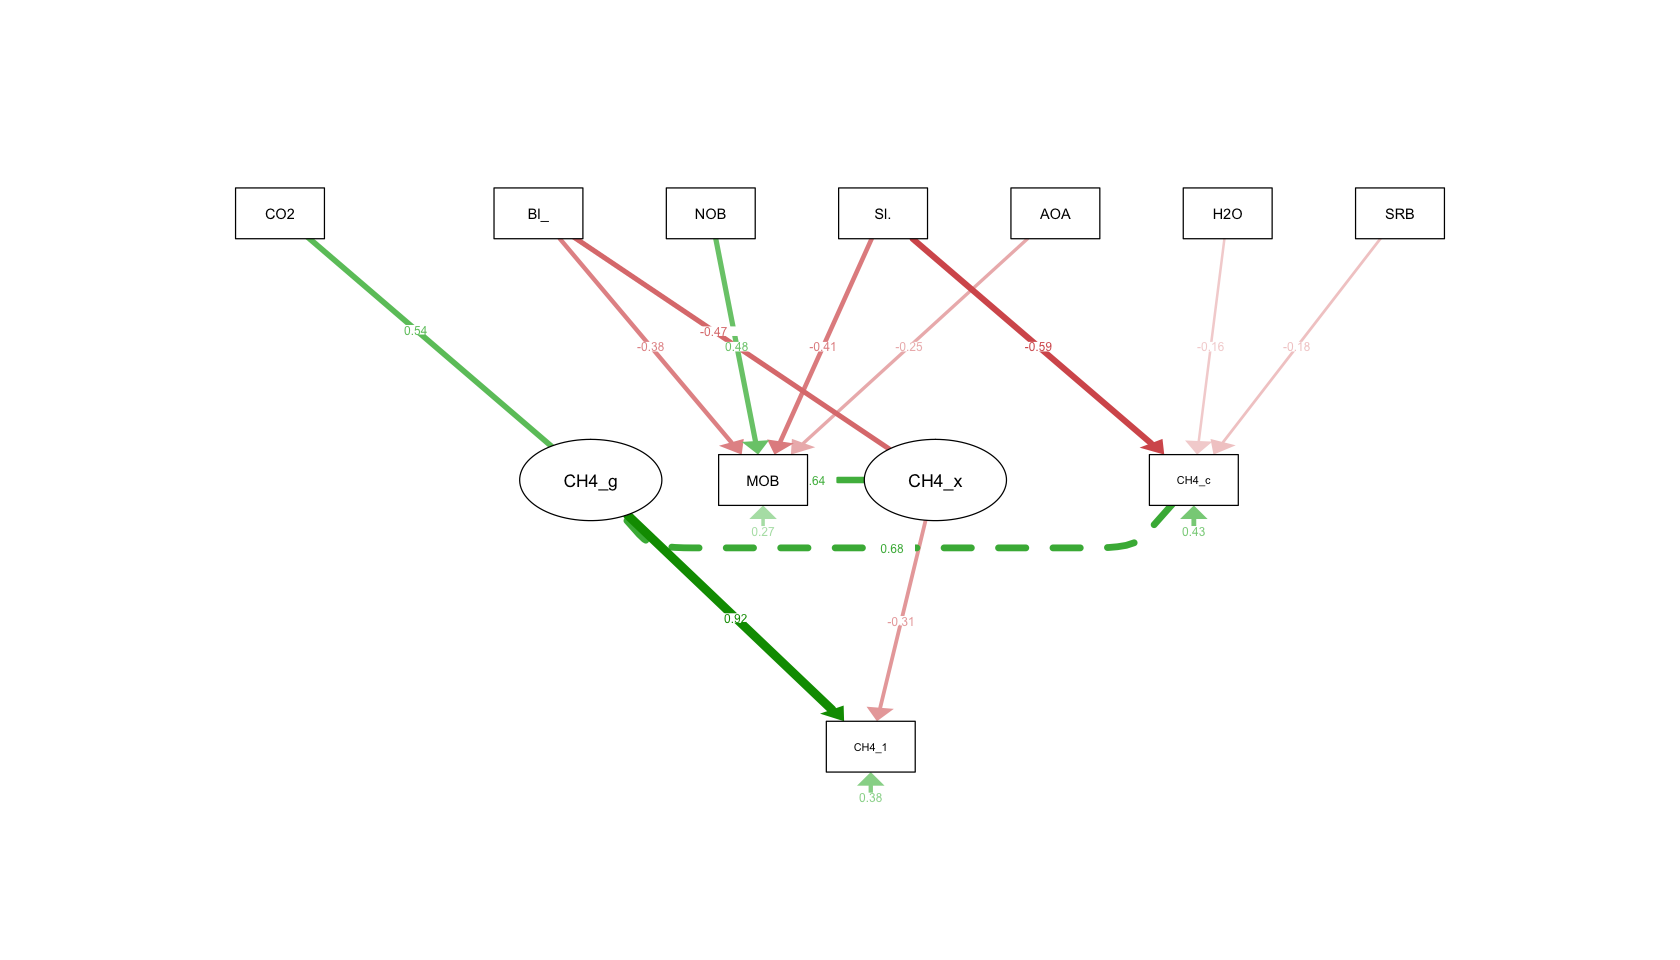

In [365]:
SEM_Plot_CH4f5_mob2af_ac2a_82 <- semPaths(CH4f5_mob2af_ac2a_82, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE,
                                          layout='tree2', optimizeLatRes=TRUE, style = "lisrel")

In [ ]:
SEM_Plot_af_ac2a_82

In [359]:
# summary(meth_mod.sem)

# 11) INJECT MODELS FROM v0.13, post LASSO for PLOTTING 

## f) base CH4 composite models 

- models from CH4_lass0_selected (Exp7 table) hand-coded into composites
- here used to evaluate fit 
- X2/gof not avail without composites / latents / endogenous -- possible here

### i) gather input data

- Table 7 (CH4 lasso) taken outside of code to make latent model candidates (split vars between CH4 and ox)
- import new model table (only)
- source table was: CH4_lass0_selected
- models named e.g. ch4L0C.86 where n (86) is orignal model no in lass0 ch4 models

In [265]:
# get external latent model table
ch4_lass0_comp_sems <- read.table("SEM_models/CH4_flux_latent_mod_form_setup2.txt", header = T, na.strings=c(NA),)
ch4_lass0_comp_sems$other <- ""
#head(ch4_lass0_comp_sems)

In [266]:
# remove base model formula
ncols_start <- dim(ch4_lass0_comp_sems)[2]
ch4_lass0_comp_sem_tab <- ch4_lass0_comp_sems[, -ncols_start]  # drop base formula

# add formula
ch4_lass0_comp_sem_tab$formula <- with(ch4_lass0_comp_sem_tab, paste(CH4_flux, CH4_gen, CH4_ox, other, sep = '\n'))

# when run, model 113 & 121 crash, remove them
#keep_mods <- 
#ch4_lass0_comp_sem_tab <- ch4_lass0_comp_sem_tab[-4,]
#ch4_lass0_comp_sem_tab <- ch4_lass0_comp_sem_tab[-7,]
ch4_lass0_comp_sem_tab

model_out,model,base,notes,CH4_flux,CH4_gen,CH4_ox,other,formula
sem.ch4L0C.79,ch4L0C.79,79,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h,ox <~ 1*MOB_IIa + AOB,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h ox <~ 1*MOB_IIa + AOB
sem.ch4L0C.69,ch4L0C.69,69,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h,ox <~ 1*MOB_IIa + Bulk_dens,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h ox <~ 1*MOB_IIa + Bulk_dens
sem.ch4L0C.107,ch4L0C.107,107,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h,ox <~ 1*MOB_IIa + Bulk_dens + N,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h ox <~ 1*MOB_IIa + Bulk_dens + N
sem.ch4L0C.113,ch4L0C.113,113,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h + pH,ox <~ 1*MOB_IIa + Bulk_dens,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h + pH ox <~ 1*MOB_IIa + Bulk_dens
sem.ch4L0C.116,ch4L0C.116,116,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h,ox <~ 1*MOB_IIa + Bulk_dens + AOB,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h ox <~ 1*MOB_IIa + Bulk_dens + AOB
sem.ch4L0C.118,ch4L0C.118,118,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h + SO4,ox <~ 1*MOB_IIa + Bulk_dens,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h + SO4 ox <~ 1*MOB_IIa + Bulk_dens
sem.ch4L0C.121,ch4L0C.121,121,man_comp,CH4_logn1 ~ 0 + CH4 + ox,CH4 <~ 1*CH4_ac + CO2_mg_m2_h + SO4,ox <~ 1*MOB_IIa + H2O_FPS,,CH4_logn1 ~ 0 + CH4 + ox CH4 <~ 1*CH4_ac + CO2_mg_m2_h + SO4 ox <~ 1*MOB_IIa + H2O_FPS


### ii) generate model tables

In [267]:
#sem_latent_tableII.0
ch4L0C_model_res <- suppressWarnings(run_compare_sem_models(ch4_lass0_comp_sem_tab, data, estimator = "mlm"))
ch4L0C_model_res

[1] "ran SEM to create models: sem.ch4L0C.79, sem.ch4L0C.69, sem.ch4L0C.107, sem.ch4L0C.113, sem.ch4L0C.116, sem.ch4L0C.118, sem.ch4L0C.121"


model_out,model,base,notes,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,R2s....1.
sem.ch4L0C.107,ch4L0C.107,107,man_comp,0.705,0.1,1,26,650.6,707.1,1,1.000,1.007,0.000,0.002,0.844
sem.ch4L0C.113,ch4L0C.113,113,man_comp,0.001,10.5,1,26,508.6,565.1,1,0.922,0.922,0.382,0.024,0.833
sem.ch4L0C.116,ch4L0C.116,116,man_comp,0.126,2.3,1,26,1079.8,1136.4,1,0.989,0.989,0.143,0.010,0.822
sem.ch4L0C.118,ch4L0C.118,118,man_comp,0.044,4.1,1,26,830.1,886.6,1,0.974,0.974,0.217,0.013,0.829
sem.ch4L0C.121,ch4L0C.121,121,man_comp,0.007,7.4,1,26,603.6,660.1,1,0.944,0.944,0.314,0.020,0.830
sem.ch4L0C.69,ch4L0C.69,69,man_comp,0.531,0.4,1,19,768.0,809.3,1,1.000,1.005,0.000,0.005,0.829
sem.ch4L0C.79,ch4L0C.79,79,man_comp,0.688,0.2,1,19,1076.9,1118.2,1,1.000,1.008,0.000,0.004,0.848


In [268]:
names(ch4L0C_model_res)

[1] "model_out" "model"     "base"      "notes"     "pvalue"    "chisq"    
 [7] "df"        "npar"      "aic"       "bic"       "gfi"       "cfi"      
[13] "rni"       "rmsea"     "srmr"      "R2s....1."

### iii) summarize models

In [269]:
clean_SEM_models_for_output_L0C = function(models, models_out){
    
    ### Clean up models ####  
    models <- models[, -ncol(models)]                           # drop formula column  
    models <- models[, -1]                                      # drop model out columns

    # Hide predictors in formulas
    models$CH4_flux <- gsub("  ", " ", models$CH4_flux)                   # Note there are double spaces in some, likely result of replace ~.
    models$CH4_flux <- gsub("CH4_logn1 ~ ", "", models$CH4_flux)        # hide predictor

    models$CH4_gen <- gsub("  ", " ", models$CH4_gen)             # remove double spaces
    models$CH4_gen <- gsub("CH4 <~ ", "", models$CH4_gen)        # hide predictor     

    models$CH4_ox <- gsub("  ", " ", models$CH4_ox)             # remove double spaces
    models$CH4_ox <- gsub("ox <~ ", "", models$CH4_ox)        # hide predictor   
    
    #models$MOB_IIa <- gsub("  ", " ", models$MOB_IIa)           # remove double spaces
    #models$MOB_IIa <- gsub("MOB_IIa ~ ", " ", models$MOB_IIa)   # hide predictor          
    # return(models)
    
    # Merge with results
    results_tab <- merge(models_out, models, by = c('model', 'base', 'notes'))
    return(results_tab)
}

In [270]:
# Gather model scores for these models
ch4L0C_model_report <- clean_SEM_models_for_output_L0C(ch4_lass0_comp_sem_tab, ch4L0C_model_res)
ch4L0C_model_report <- ch4L0C_model_report[order(ch4L0C_model_report$aic),]
ch4L0C_model_report

,model,base,notes,model_out,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr,R2s....1.,CH4_flux,CH4_gen,CH4_ox,other
2,ch4L0C.113,113,man_comp,sem.ch4L0C.113,0.001,10.5,1,26,508.6,565.1,1,0.922,0.922,0.382,0.024,0.833,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h + pH,1*MOB_IIa + Bulk_dens,
5,ch4L0C.121,121,man_comp,sem.ch4L0C.121,0.007,7.4,1,26,603.6,660.1,1,0.944,0.944,0.314,0.020,0.830,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h + SO4,1*MOB_IIa + H2O_FPS,
1,ch4L0C.107,107,man_comp,sem.ch4L0C.107,0.705,0.1,1,26,650.6,707.1,1,1.000,1.007,0.000,0.002,0.844,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa + Bulk_dens + N,
6,ch4L0C.69,69,man_comp,sem.ch4L0C.69,0.531,0.4,1,19,768.0,809.3,1,1.000,1.005,0.000,0.005,0.829,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa + Bulk_dens,
4,ch4L0C.118,118,man_comp,sem.ch4L0C.118,0.044,4.1,1,26,830.1,886.6,1,0.974,0.974,0.217,0.013,0.829,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h + SO4,1*MOB_IIa + Bulk_dens,
7,ch4L0C.79,79,man_comp,sem.ch4L0C.79,0.688,0.2,1,19,1076.9,1118.2,1,1.000,1.008,0.000,0.004,0.848,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa + AOB,
3,ch4L0C.116,116,man_comp,sem.ch4L0C.116,0.126,2.3,1,26,1079.8,1136.4,1,0.989,0.989,0.143,0.010,0.822,0 + CH4 + ox,1*CH4_ac + CO2_mg_m2_h,1*MOB_IIa + Bulk_dens + AOB,


Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

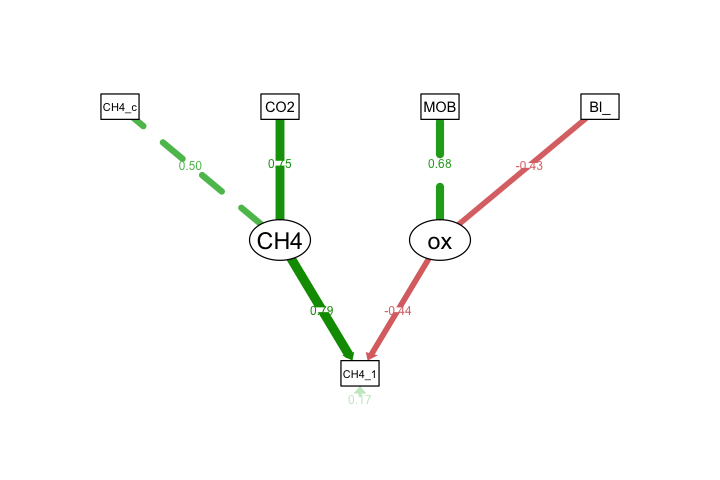

In [271]:
# -- DEACTIVATED UNDER r3.6
# model 107
options(repr.plot.width=6, repr.plot.height=4) 
SEM_Plot69 <- semPaths(sem.ch4L0C.69, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)
# filetype = "pdf", filename = "sem.ch4_lat0_a.3_SEM_graph", height = 5, width = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

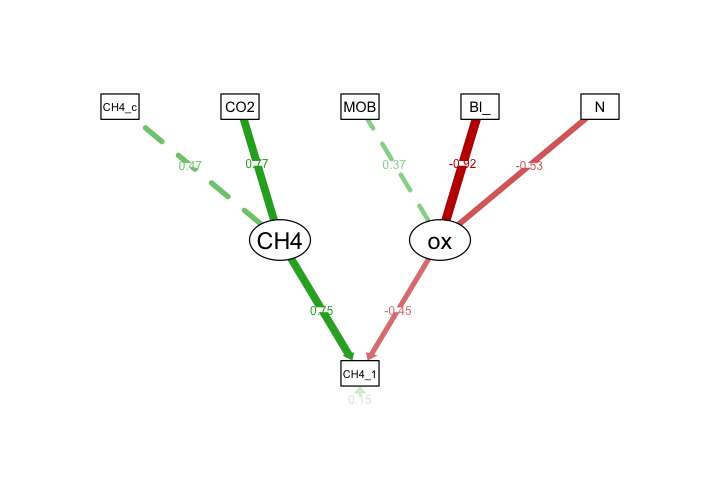

In [272]:
SEM_Plot107 <- semPaths(sem.ch4L0C.107, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)
# filetype = "pdf", filename = "sem.ch4_lat0_a.3_SEM_graph", height = 5, width = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

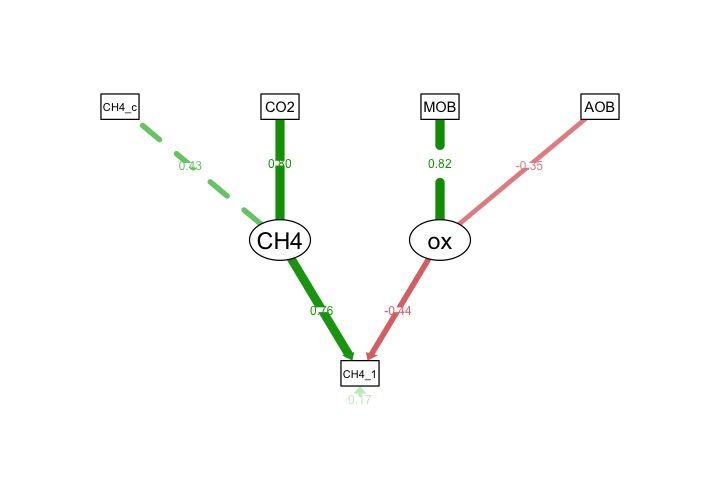

In [273]:
SEM_Plot79 <- semPaths(sem.ch4L0C.79, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)
# filetype = "pdf", filename = "sem.ch4_lat0_a.3_SEM_graph", height = 5, width = 6)

In [274]:
options(repr.plot.width=8, repr.plot.height=6) 

In [275]:
#### best model so far & manual
# Same as 7g but COMPOSITE
CH4_las.7h <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               MOB_IIa ~ AOA + H2O_FPS + NOB + Salinity.x' 

In [276]:
#### best model so far & manual
# Same as 7g but COMPOSITE
CH4_las.7i <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               MOB_IIa ~ AOA + NOB + Salinity.x + H2O_FPS' 

In [277]:
CH4_las.8a <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               CH4_ac ~ C + Bulk_dens + Salinity.x + SRB_syn' 

In [278]:
CH4_las.8b <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               CH4_ac ~ C + Bulk_dens + Salinity.x + H2O_FPS' 

In [279]:
CH4_las.9a <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               CH4_ac ~ C + Bulk_dens + Salinity.x + H2O_FPS
               MOB_IIa ~ AOA + NOB + Salinity.x + H2O_FPS' 

In [280]:
CH4_las.10a <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ 1*CH4_ac + CO2_mg_m2_h 
               ox <~ 1*MOB_IIa + Bulk_dens #+ N
               CH4_ac ~ C + Bulk_dens
               MOB_IIa ~ AOA + NOB
               MOB_IIa ~~ CH4_ac' 

In [281]:
# no CH4_ac, MOB, still latent
CH4_las.11 <- 'CH4_logn1 ~ 0 + CH4gen + ox + Bulk_dens + Salinity.x + H2O_FPS
               CH4gen <~ C + 1*CO2_mg_m2_h 
               ox <~  AOA + 1*NOB' #+ N
               #CH4_ac ~ C + Bulk_dens + Salinity.x + H2O_FPS
               #MOB_IIa ~ AOA + NOB + Salinity.x + H2O_FPS' 

In [282]:
CH4_las.12 <- 'CH4_logn1 ~ AOA + NOB + Bulk_dens + Salinity.x + C + CO2_mg_m2_h + H2O_FPS'

In [283]:
SEM_las_CH4_mod.7h <- sem(CH4_las.7h, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [284]:
SEM_las_CH4_mod.7i <- sem(CH4_las.7i, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [285]:
SEM_las_CH4_mod.8a <- sem(CH4_las.8a, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [286]:
SEM_las_CH4_mod.8b <- sem(CH4_las.8b, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [287]:
SEM_las_CH4_mod.9a <- sem(CH4_las.9a, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [288]:
SEM_las_CH4_mod.10a <- sem(CH4_las.10a, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [289]:
SEM_las_CH4_mod.12 <- sem(CH4_las.12, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

In [290]:
#glm12 <-glm(CH4_logn1 ~ AOA + NOB + Bulk_dens + Salinity.x + C + CO2_mg_m2_h + H2O_FPS, data = data)

In [291]:
summary(SEM_las_CH4_mod.12)

lavaan (0.5-23.1097) converged normally after 175 iterations

  Number of observations                            65

  Estimator                                         ML      Robust
  Minimum Function Test Statistic                0.000       0.000
  Degrees of freedom                                 0           0
  Minimum Function Value               0.0000000000000
  Scaling correction factor                                     NA
    for the Satorra-Bentler correction

Parameter Estimates:

  Information                                 Expected
  Standard Errors                           Robust.sem

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  CH4_logn1 ~                                         
    AOA              -0.005    0.045   -0.102    0.919
    NOB              -0.005    0.073   -0.071    0.943
    Bulk_dens         1.877    0.404    4.649    0.000
    Salinity.x        0.967    0.270    3.585    0.000
    C                 3.679    0.697    5.2

In [292]:
## #CH4_ac_comp_f[CH4_ac_comp_f$model =='ch4f2.2_24_133',]$formula 

ch4at_1 <- 'CH4_logn1 ~ 0 + CH4_gen + CH4_ox
            CH4_gen <~ 1*CH4_ac + CO2_mg_m2_h
            CH4_ac  ~ SRB_syn + C + Salinity.x + Bulk_dens 
            CH4_ox <~ 1*MOB_IIa + Bulk_dens
            MOB_IIa  ~ NOB + Salinity.x + Bulk_dens + AOA
            
            '#C ~~ Salinity.x

ch4at_2 <-'CH4_logn1 ~ 0 + CH4_gen + CH4_ox

            CH4_ox <~ 1*MOB_IIa + Bulk_dens
            MOB_IIa  ~ NOB + Salinity.x + AOA + NO3_N
            CH4_ac  ~ Salinity.x + Bulk_dens + Cl + SRB_syn + NO3_N + H2O_FPS + SRB
            CH4_gen <~ 1*CH4_ac + CO2_mg_m2_h'


# CH4_ac_comp_f[CH4_ac_comp_f$model =='ch4f2.2_24_141',]$formula 
#ch4at_3 <-CH4_ac_comp_f[CH4_ac_comp_f$model =='ch4f2.2_24_39',]$formula 

#ch4at_4 <-CH4_ac_comp_f[CH4_ac_comp_f$model =='ch4f2.2_15_313',]$formula

#data?
Guild_CH4_0 <- Guild_CH4[,-1]



# Calculate SEM
ch4at_1.sem <- sem(ch4at_1, data=Guild_CH4_0, fixed.x=TRUE, orthogonal=TRUE, estimator ="mlm")   
ch4at_2.sem <- sem(ch4at_2, data=Guild_CH4_0, fixed.x=TRUE, orthogonal=TRUE, estimator ="mlm")   

#summary(ch4at_2.sem)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4_gen CH4_ox]”Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4_ox CH4_gen]”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

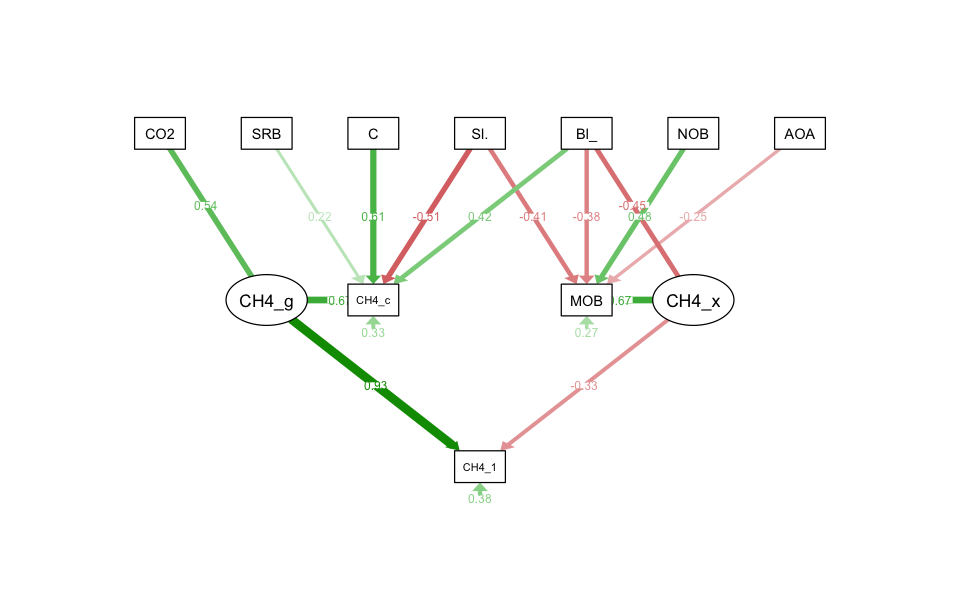

In [367]:
options(repr.plot.width=8, repr.plot.height=5) 
Chat_1_plot <- semPaths(ch4at_1.sem, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=T, style = "lisrel", reorder = FALSE) 
#                     manifests = c('CO2_mg_m2_h','C', 'Bulk_dens', 'Salinity.x', 'SRB', 'AOA', 'NOB'))#, nCharNodes = 6)

In [294]:
ch4at_2.sem

lavaan (0.5-23.1097) converged normally after 103 iterations

  Number of observations                           152

  Estimator                                         ML      Robust
  Minimum Function Test Statistic               35.095      13.762
  Degrees of freedom                                19          19
  P-value (Chi-square)                           0.014       0.797
  Scaling correction factor                                  2.550
    for the Satorra-Bentler correction

### plot sig models 7h (MOB mod); 8a & b (CH4_ac mods)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

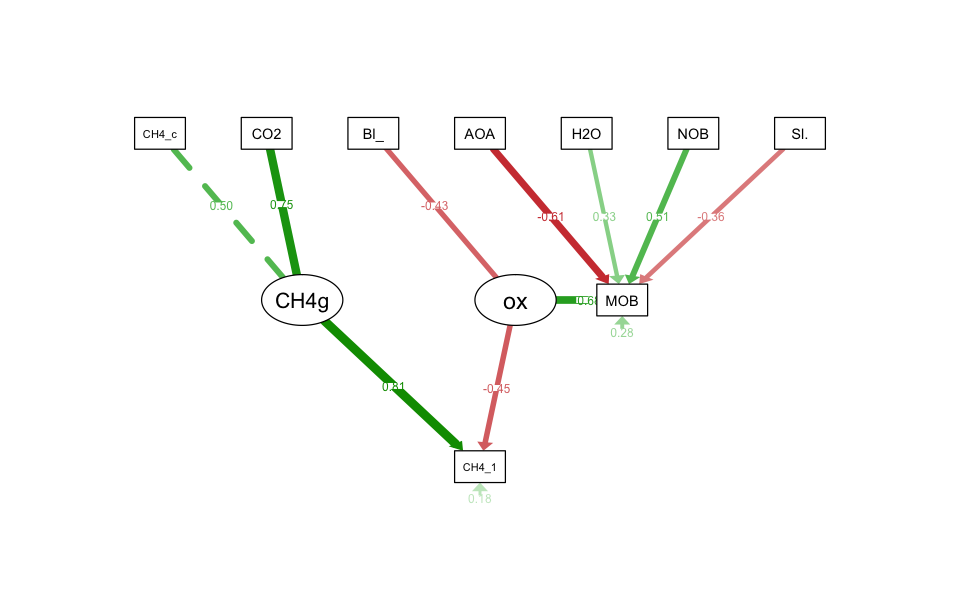

In [295]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_7h <- semPaths(SEM_las_CH4_mod.7h, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

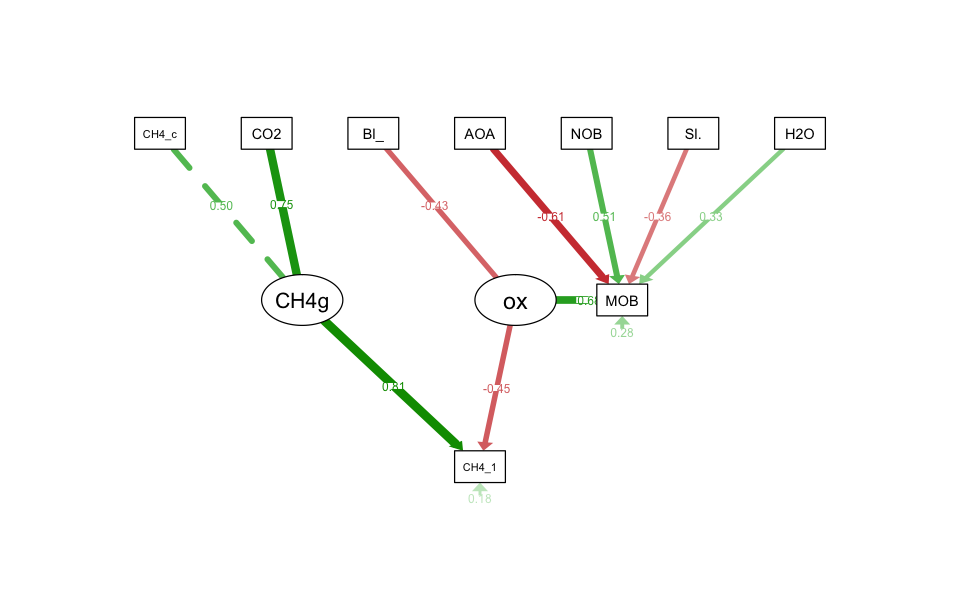

In [296]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_7i <- semPaths(SEM_las_CH4_mod.7i, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

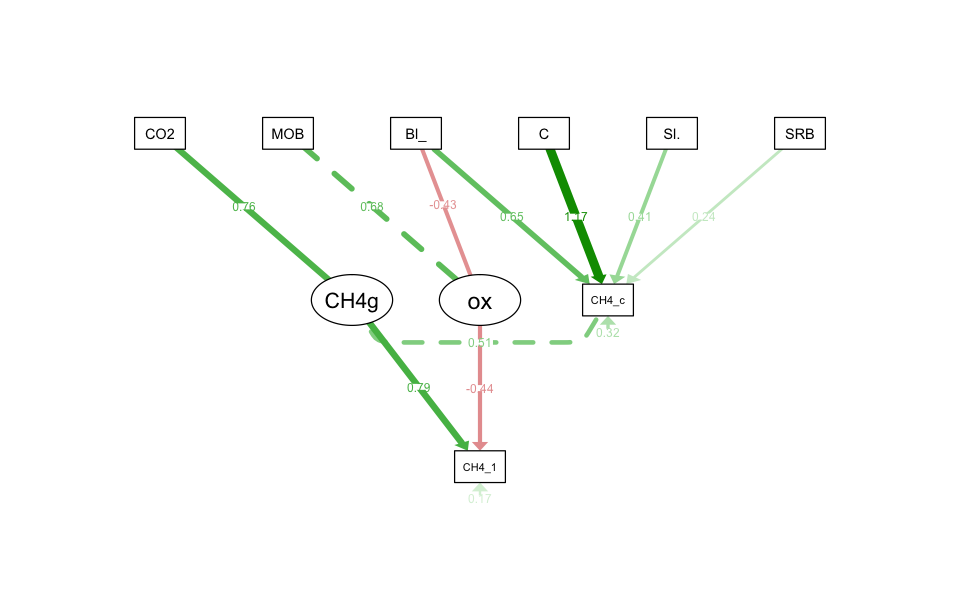

In [297]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_8a <- semPaths(SEM_las_CH4_mod.8a, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

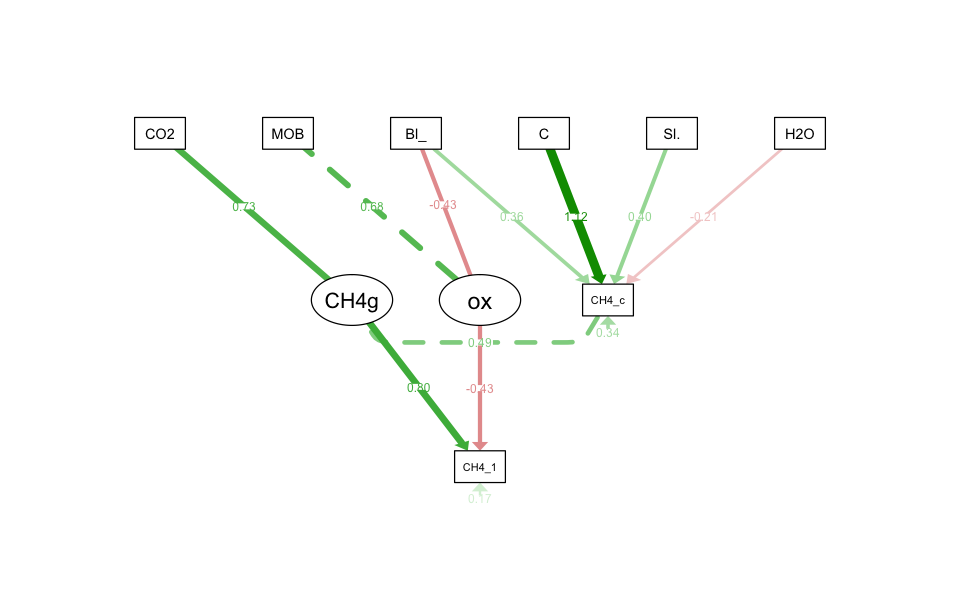

In [298]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_8b <- semPaths(SEM_las_CH4_mod.8b, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

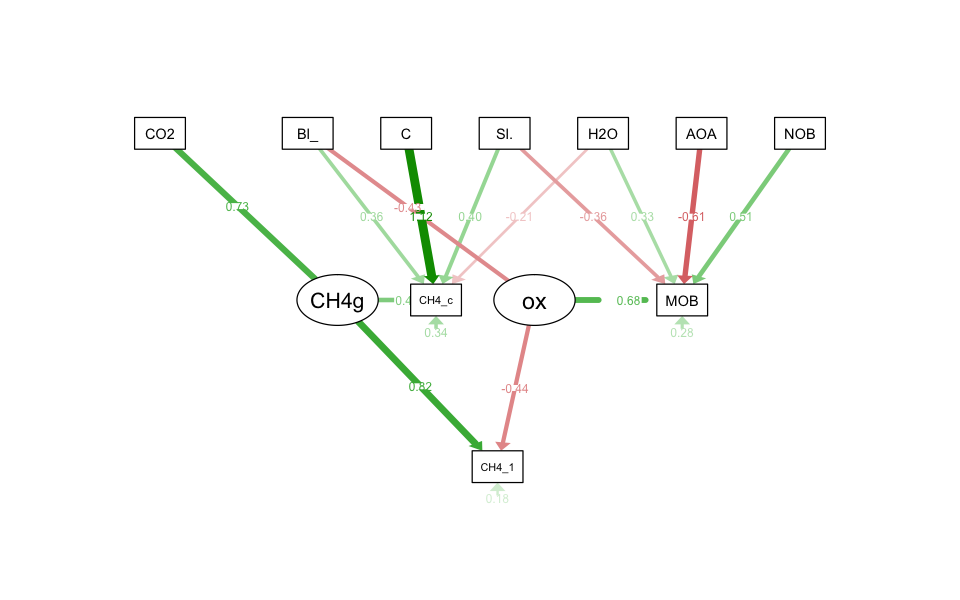

In [299]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_9a <- semPaths(SEM_las_CH4_mod.9a, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

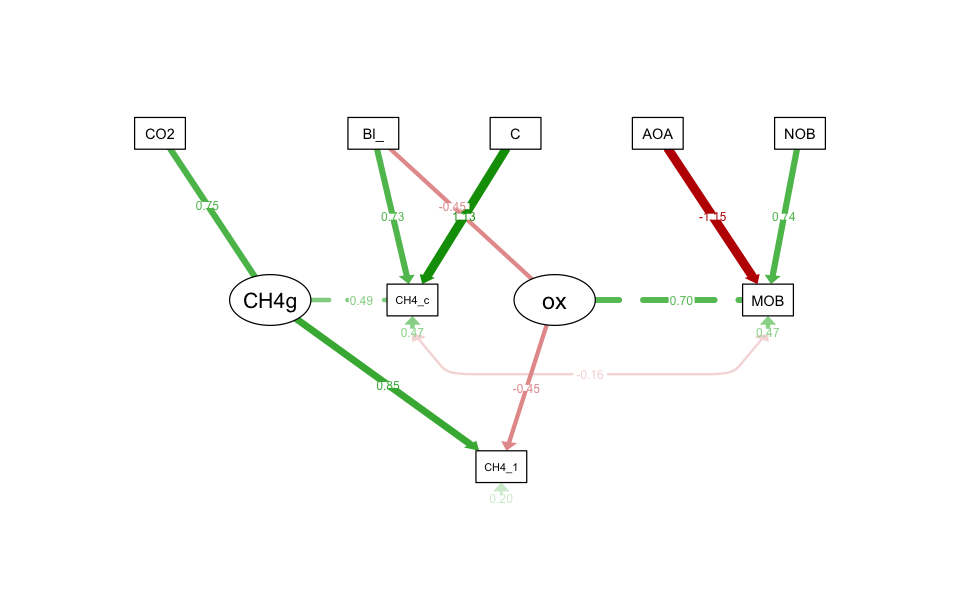

In [300]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_10a <- semPaths(SEM_las_CH4_mod.10a, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

In [302]:
#summary(SEM_las_CH4_mod.11)

# LASSO SEM MODELS ONLY 

### a) models

In [303]:
# no CH4_ac, MOB, still latent
CH4_las.11 <- 'CH4_logn1 ~ 0 + CH4gen + ox + Bulk_dens + Salinity.x + H2O_FPS
               CH4gen <~ C + 1*CO2_mg_m2_h 
               ox <~  AOA + 1*NOB' #+ N
               #CH4_ac ~ C + Bulk_dens + Salinity.x + H2O_FPS
               #MOB_IIa ~ AOA + NOB + Salinity.x + H2O_FPS' 

#### i) Latent MOB mods

In [304]:
#ch4L0C.107_mII.13

lat_mob_mod.1 <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ CH4_ac + 1*CO2_mg_m2_h 
               ox <~  1*MOB_IIa + Bulk_dens + N
               MOB_IIa ~  AOA + NOB + H2O_FPS'

In [305]:
#ch4L0C.69_mII.16
lat_mob_mod.2 <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ CH4_ac + 1*CO2_mg_m2_h 
               ox <~  1*MOB_IIa + Bulk_dens
               MOB_IIa ~  AOA + NOB + H2O_FPS + Salinity.x'

#### ii) latent CH4_ac mods

In [306]:
lat_CH4_ac_mod.1 <- 'CH4_logn1 ~ 0 + CH4gen + ox
               ox <~  1*MOB_IIa + Bulk_dens + N
               CH4gen <~ CH4_ac + 1*CO2_mg_m2_h 
               CH4_ac ~ C + Bulk_dens + Salinity.x + SRB_syn'

In [307]:
lat_CH4_ac_mod.2 <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ CH4_ac + 1*CO2_mg_m2_h 
               ox <~  1*MOB_IIa + Bulk_dens + N
               CH4_ac ~ C + Bulk_dens + Salinity.x + H2O_FPS'

In [308]:
lat_CH4_ac_mod.3 <- 'CH4_logn1 ~ 0 + CH4gen + ox
               CH4gen <~ CH4_ac + 1*CO2_mg_m2_h 
               ox <~  1*MOB_IIa + Bulk_dens
               CH4_ac ~ C + Bulk_dens + Salinity.x'

### b) SEMs 

In [309]:
SEM_las_CH4_mod.7i <- sem(CH4_las.7i, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

#### i) lat mobII

In [310]:
SEM_lat_mob_mod.1 <- sem(lat_mob_mod.1, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [311]:
SEM_lat_mob_mod.2 <- sem(lat_mob_mod.2, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

#### i) lat CH4_ac_mods

In [312]:
SEM_lat_ac_mod.1 <- sem(lat_CH4_ac_mod.1, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [ox CH4gen]”

In [313]:
SEM_lat_ac_mod.2 <- sem(lat_CH4_ac_mod.2, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

In [314]:
SEM_lat_ac_mod.3 <- sem(lat_CH4_ac_mod.3, data=data, fixed.x=FALSE, estimator = 'mlm', orthogonal =TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4gen ox]”

### c) SEM paths

#### i) model 7h

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

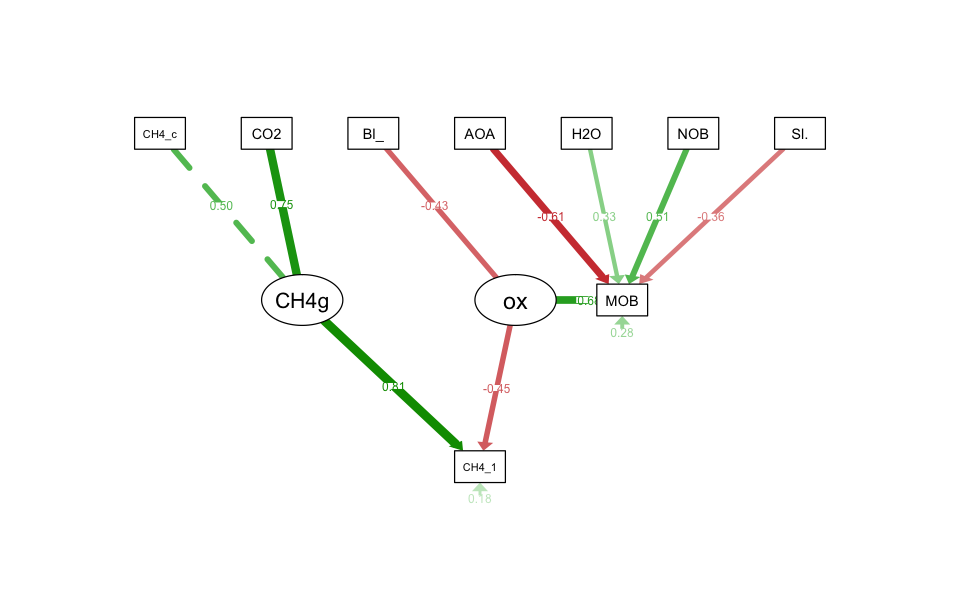

In [315]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_7h <- semPaths(SEM_las_CH4_mod.7h, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

#### ii) latent MOB IIa

In [316]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_mob.1 <- semPaths(SEM_lat_mob_mod.1, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel",#
filetype = "pdf", filename = "sem.ch4L0C.107.mII13.graph", height = 5, width = 6) # nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

Output stored in /Volumes/due/Desktop/SF_Sal_OTU/sem.ch4L0C.107.mII13.graph.pdf


Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

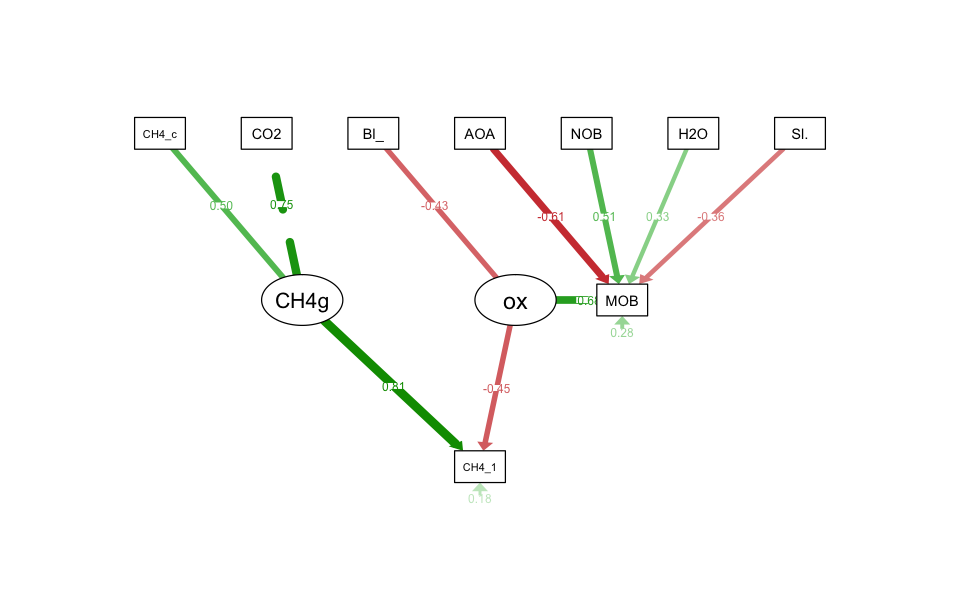

In [317]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_mob.2 <- semPaths(SEM_lat_mob_mod.2, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

#### iii) latent CH4_ac

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

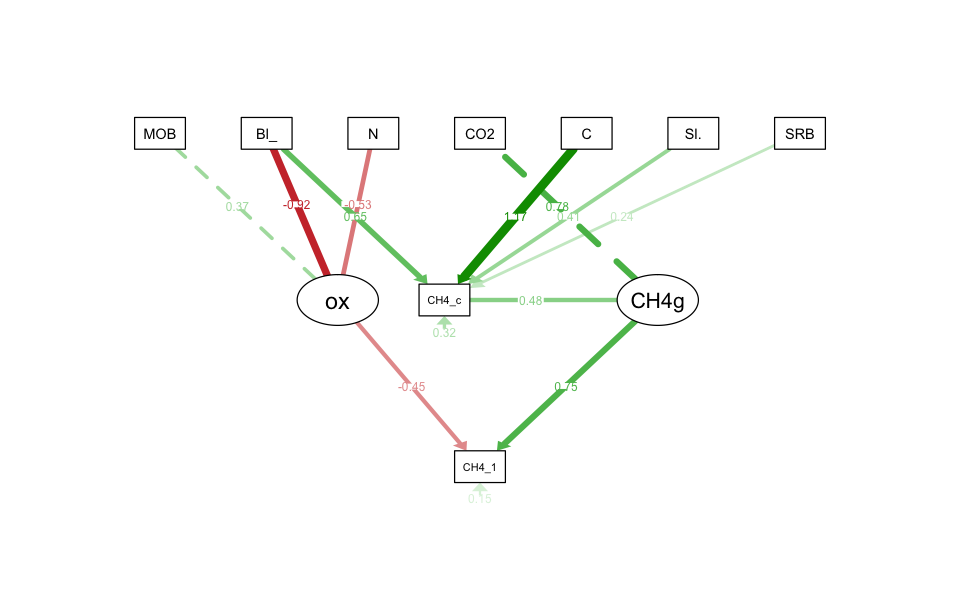

In [318]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_Lch4_ac.1 <- semPaths(SEM_lat_ac_mod.1, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

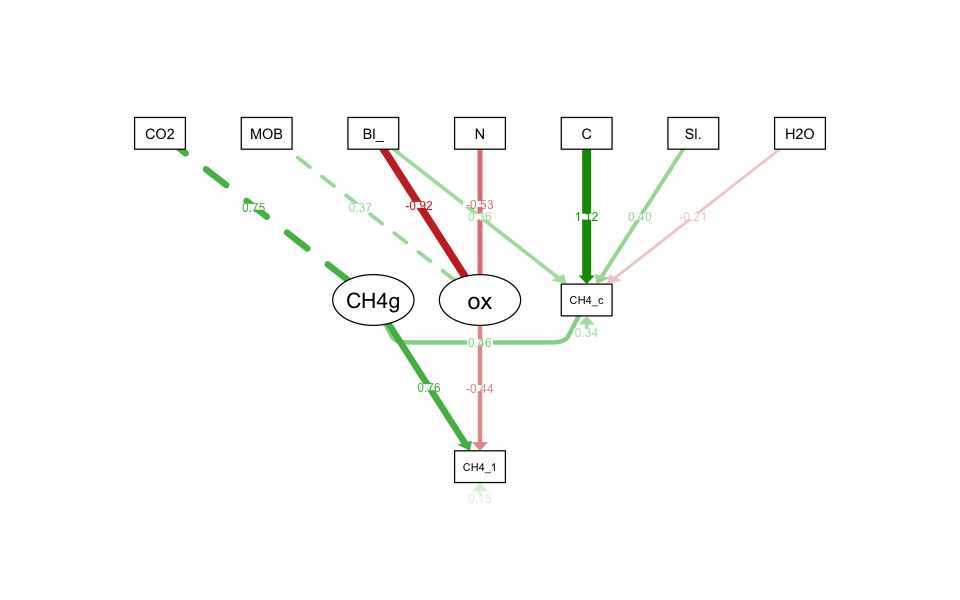

In [319]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_Lch4_ac.2 <- semPaths(SEM_lat_ac_mod.2, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

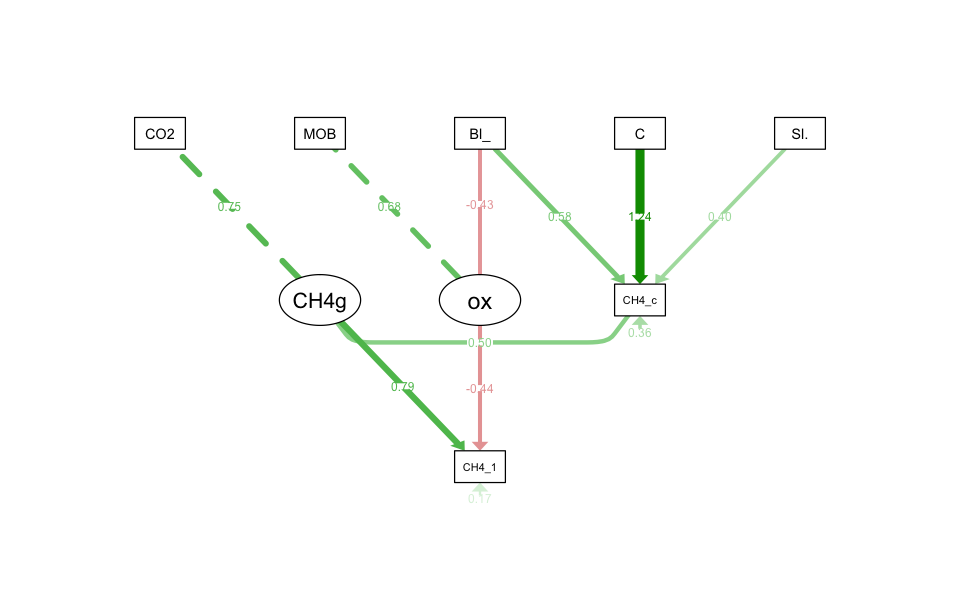

In [320]:
options(repr.plot.width=8, repr.plot.height=5) 
SEM_Plot_Lch4_ac.3 <- semPaths(SEM_lat_ac_mod.3, "std", intercepts=FALSE, exoCov=F, curvePivot = TRUE, layout='tree2',
                     optimizeLatRes=TRUE, style = "lisrel")#, nCharNodes = 6)

### CH4 ac mods

# Other CRUFT (reorged in > v0.7)

## MI covariate screening

### a) get corrgram for guilds & soils for covariates 

In [321]:
guild_d_names <- names(Guild_CH4_d)
drop <-c("NO2_pw", "NO3_pw", "NH3_pw", "NH4_N.1", "NO3_N.1")
keep <- guild_d_names[!guild_d_names %in% drop]
keep
Guild_CH4_d <- Guild_CH4_d[keep]

[1] "Sample"      "CH4_ug_m2_h" "CH4_logn1"   "CO2_mg_m2_h" "CH4_CO2"    
 [6] "Bulk_dens"   "H2O_FPS"     "pH"          "C"           "N"          
[11] "P"           "CN"          "NP"          "NO3_N"       "NH4_N"      
[16] "Olsen_P"     "NP_ext"      "Salinity.x"  "Cl"          "SO4"        
[21] "SO4_pw"      "Fe"          "Fe_pw"       "DOC_mg_L"    "CH4_H2"     
[26] "CH4_ac"      "MOB_I"       "MOB_II"      "MOB_IIa"     "MeOB"       
[31] "AOA"         "AOB"         "NOB"         "Anamx"       "SOxB"       
[36] "SRB_syn"     "SRB"         "FeOB"        "FeRB"        "Actino"     
[41] "Chlorf"      "Firmic"      "AO_NOB"      "NOB_AO"      "mcr_pmo"    
[46] "pmo_mcr"

In [322]:
data <- Guild_CH4_d[,-1]
data <- data[!is.na(data$CH4_ug_m2_h),]
data <-data.matrix(data)
# corrplot(data.matrix(data))

### b) small function for screening covariates

In [323]:
# Function for covariate screening (using subset of data)

corr_screen = function(data, feature_list){
    
    data_f <-data.frame(data)
    new_data <- data[feature_list]
    corrplot(cor(data.matrix(new_data)))
    
}

In [324]:
# Soil features only (always include?)
soil_feats <- c('CH4_ug_m2_h','CO2_mg_m2_h','H2O_FPS','CH4_CO2','NO3_N','NH4_N', 'DOC_mg_L','C','NP', 
                'NP_ext','P','CH4_logn1','C_g_m2','Bulk_dens','Salinity.x','CN')

In [325]:
# Define sub features to be compared 
test_feats <- c("CH4_ac", "MOB_IIa")
new_feats <- c(test_feats, soil_feats)
new_feats
# corr_screen

[1] "CH4_ac"      "MOB_IIa"     "CH4_ug_m2_h" "CO2_mg_m2_h" "H2O_FPS"    
 [6] "CH4_CO2"     "NO3_N"       "NH4_N"       "DOC_mg_L"    "C"          
[11] "NP"          "NP_ext"      "P"           "CH4_logn1"   "C_g_m2"     
[16] "Bulk_dens"   "Salinity.x"  "CN"

In [326]:
dataf <- data.frame(data)

In [327]:
 #dataf[test_feats]

### c) function dev for MI screening -- first from pair of params

In [328]:
# function to get covariates from MI pair
get_mi_covars = function(data, r_cut = 0.5, keep_pair){
    
    corr_m <- cor(data)                                             # get corr
    corr_m[abs(corr_m) < r_cut] <- NA                               # get abs value over threshold only, or NA

    select_cols <- data.frame(corr_m[,keep_pair])                   # Get only cols from MI inputs
    # select_cols <- data.frame(corr_m[,keep_vars])                 -- too many vars at once not helping
    common_data <- select_cols[complete.cases(select_cols),]        # get only complete cases -- no NA
    common_data
}

In [329]:
keep_pair = c("CH4_H2", "SRB_syn")

In [330]:
# Demonstrate function
get_mi_covars(data, r_cut = 0.5, keep_pair)

,CH4_H2,SRB_syn
Bulk_dens,-0.7577638,-0.5369563
C,0.7808115,0.5337722
CN,0.5525279,0.5549127
NO3_N,0.6831534,0.5708079
Fe,-0.5324613,-0.5416232
AOA,-0.6940700,-0.5645910
NOB,-0.7790361,-0.5787017


##### i) dev cruft

## more

## SEM w Decomp model screening, would be regSEM

In [331]:
# Model starting point --less crazy model
crazy_mod3 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h
              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [332]:
colnames(Guild_CH4_d)

[1] "Sample"      "CH4_ug_m2_h" "CH4_logn1"   "CO2_mg_m2_h" "CH4_CO2"    
 [6] "Bulk_dens"   "H2O_FPS"     "pH"          "C"           "N"          
[11] "P"           "CN"          "NP"          "NO3_N"       "NH4_N"      
[16] "Olsen_P"     "NP_ext"      "Salinity.x"  "Cl"          "SO4"        
[21] "SO4_pw"      "Fe"          "Fe_pw"       "DOC_mg_L"    "CH4_H2"     
[26] "CH4_ac"      "MOB_I"       "MOB_II"      "MOB_IIa"     "MeOB"       
[31] "AOA"         "AOB"         "NOB"         "Anamx"       "SOxB"       
[36] "SRB_syn"     "SRB"         "FeOB"        "FeRB"        "Actino"     
[41] "Chlorf"      "Firmic"      "AO_NOB"      "NOB_AO"      "mcr_pmo"    
[46] "pmo_mcr"

In [333]:
# Make "mostly FULL MODEL" for CH4, name feats to be LASSO'd

# Model starting point --less crazy model
CH4_las.1 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h +
                       c1*Bulk_dens + c2*H2O_FPS + c4*Salinity.x + 
                       c8*CN + c9*NO3_N + c10*NH4_N +
                       c11*Firmic 
                       c13*FeOB + c14*SRB + c15*SRB_syn 

              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [334]:
# Make "FULL MODEL" for CH4, name feats to be LASSO'd
# Drop some vars, not behaving w stability? 

# Model starting point --less crazy model
CH4_las.2 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h +
                       c4*Salinity.x + 
                       c8*CN + c9*NO3_N + c10*NH4_N +
                       c11*Firmic + c12*Actino +  
                       c13*FeRB + c14*SRB + c15*SRB_syn 

              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [335]:
# Make "FULL MODEL" for CH4, name feats to be LASSO'd

# Model starting point --less crazy model
CH4_las.3 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h +
                       c1*Bulk_dens + c2*H2O_FPS + c4*Salinity.x + 
                       c5*C + c6*NP + C7*NP_ext + c8*CN + c9*NO3_N + c10*NH4_N +
                       c11*Firmic + c12*Actino +  
                       c13*FeRB + c14*SRB + c15*SRB_syn 

              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [336]:
# Make "FULL MODEL" for CH4, name feats to be LASSO'd
# Drop some vars, not behaving w stability? 

# Model starting point --less crazy model
CH4_las.4 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h +
                       c4*Salinity.x + 
                       c8*CN + c9*NO3_N + c10*NH4_N +
                       c11*Firmic + c12*Actino +  
                       c13*FeRB + c14*SRB + c15*SRB_syn 

              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [337]:
# Make "FULL MODEL" for CH4, name feats to be LASSO'd

# Model starting point --less crazy model
CH4_las.5 <- 'CH4_logn1 ~ 0 + CH4 + ox 
         
              CH4 <~ 1*CH4_ac + 0*CH4_H2 + CO2_mg_m2_h +
                       c4*Salinity.x + c14*SRB + c15*SRB_syn + FeRB

              ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [338]:
# "GOOD reduced model"

CH4_las.6 <- 'CH4_logn1 ~ 0 + CH4 + MOB_IIa
         
              CH4 <~ 1*CH4_ac +  CO2_mg_m2_h + c15*SRB_syn 
                      + c12*Actino + c14*SRB #
              #ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [339]:
# Make "FULL MODEL" for CH4, name feats to be LASSO'd

# Model starting point --less crazy model
CH4_las.7 <- 'CH4_logn1 ~ MOB_IIa + CH4_ac + CH4_H2 + CO2_mg_m2_h +
                       c1*Bulk_dens + c2*H2O_FPS + c4*Salinity.x + 
                       c5*C + c6*NP + C7*NP_ext + c8*CN + c9*NO3_N + c10*NH4_N +
                       c11*Firmic + c12*Actino +  
                       c13*FeRB + c14*SRB + c15*SRB_syn 

              #ox  <~  1*MOB_IIa
              MOB_IIa ~ NOB + AOA + CH4_ac'

In [340]:
SEM_las_mod.1 <- sem(CH4_las.6, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4]”

In [341]:
sem_fit_sum(SEM_las_mod.1, sem_fit_params)

model,pvalue,chisq,df,npar,aic,bic,gfi,cfi,rni,rmsea,srmr
SEM_las_mod.1,0.077,12.804,7,47,1656.842,1759.038,1,0.969,0.969,0.113,0.039


In [342]:
# Get R2: 
get_SEM_R2s(SEM_las_mod.1)

model,CH4_logn1,MOB_IIa
SEM_las_mod.1,0.849,0.614


In [343]:
nonsigs <- get_SEM_nonsig_vars(SEM_las_mod.1, p_cut =0.05);
nonsigs[nonsigs$op == '<~',]

lhs,op,rhs,pvalue


In [344]:
summary(SEM_las_mod.1)

lavaan (0.5-23.1097) converged normally after 100 iterations

  Number of observations                            65

  Estimator                                         ML      Robust
  Minimum Function Test Statistic               12.804      11.621
  Degrees of freedom                                 7           7
  P-value (Chi-square)                           0.077       0.114
  Scaling correction factor                                  1.102
    for the Satorra-Bentler correction

Parameter Estimates:

  Information                                 Expected
  Standard Errors                           Robust.sem

Composites:
                   Estimate  Std.Err  z-value  P(>|z|)
  CH4 <~                                              
    CH4_ac            1.000                           
    CO2_m_2_          8.167    1.974    4.138    0.000
    SRB_syn  (c15)   -1.641    0.403   -4.073    0.000
    Actino   (c12)    0.880    0.295    2.982    0.003
    SRB      (c14)    0.804    0

### b) plot this 

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4]”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

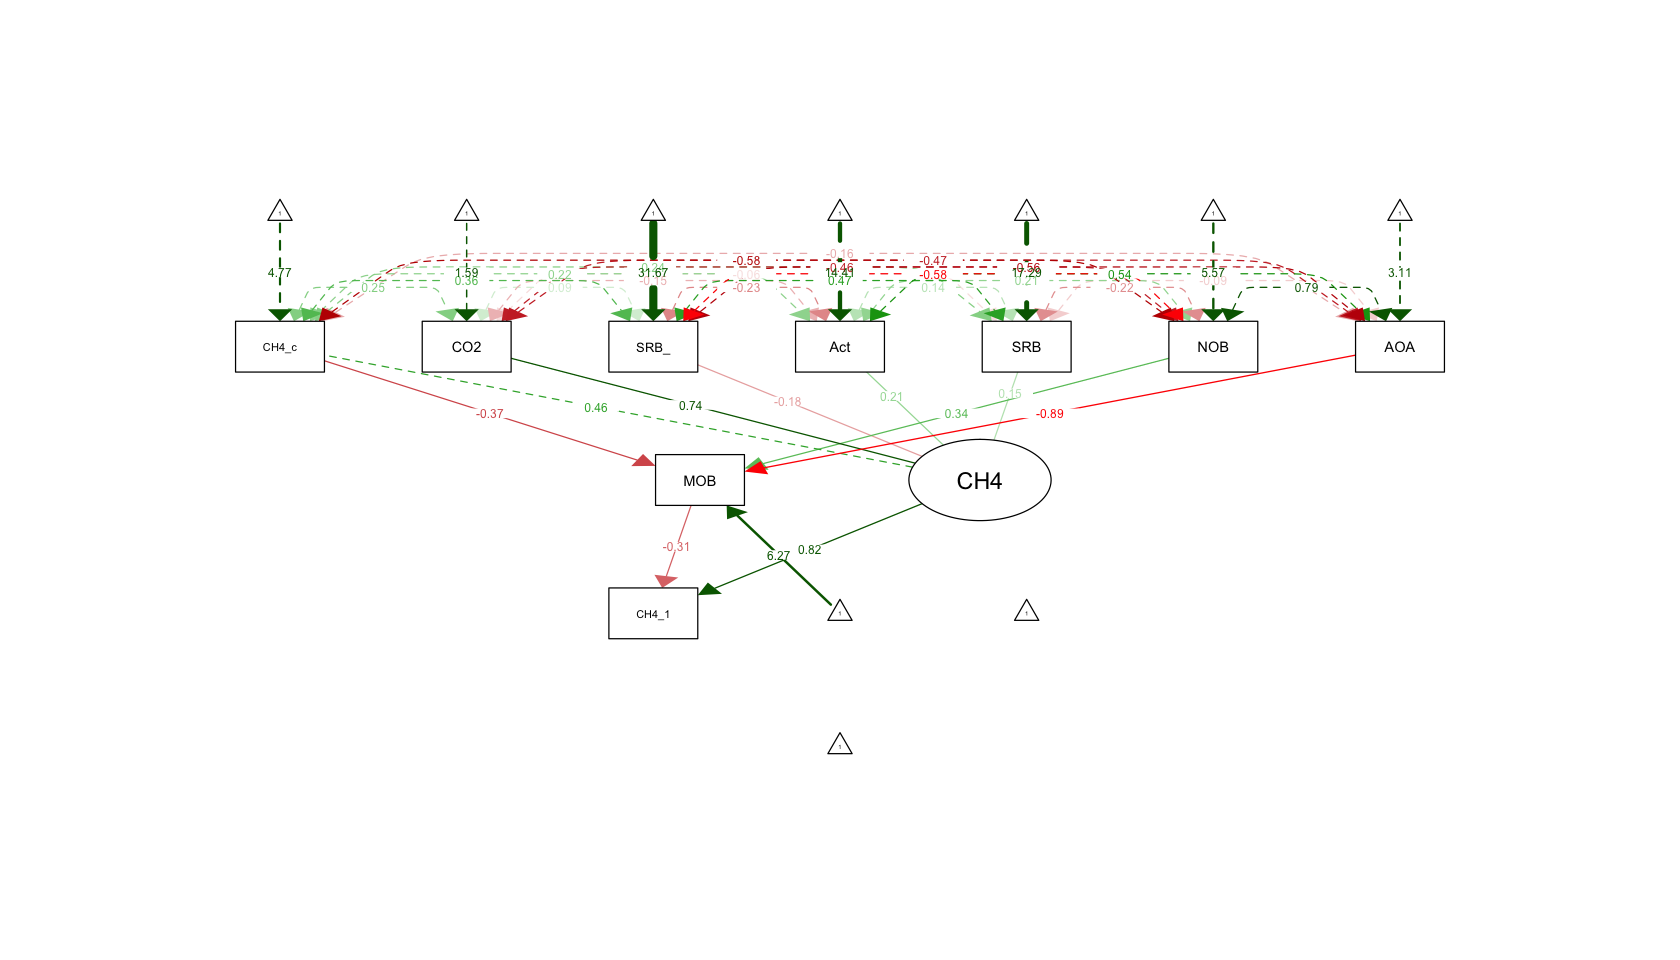

In [345]:
fit <- lavaan:::sem(CH4_las.6, data = Guild_CH4_d, std.lv = TRUE)

options(repr.plot.width=14, repr.plot.height=8) 

#######################
# To print add: filetype="pdf", filename="PrintSEM_test")
#######################

#semPaths(fit, "std", curvePivot = TRUE)
#semPaths(fit, "std", style = "lisrel")
#semPaths(fit, "std", style = "lisrel", layout='tree', exoCov=F, curvePivot = TRUE)

#semPaths(fit, "std", layout='tree3', residuals=FALSE, exoCov=F, edge.label.cex = 0.8)#, centerLevels=FALSE)

#semPaths(fit, "std", style = "lisrel", layout='tree2', optimizeLatRes=TRUE, residuals=FALSE, 
#         curvePivot = TRUE, exoCov=F)#, filetype="pdf", filename="PrintSEM_test_CO2")#, label.scale=F, node.height=10)

SEM_Plot <- semPaths(fit, "std", style = "lisrel", layout='tree2', 
                     optimizeLatRes=TRUE, exoCov=TRUE, curvePivot = TRUE, residuals=FALSE)
# semPaths(fit, "std", style = "lisrel", layout='tree3', layoutSplit=TRUE)
# semPaths(fit, "std", style = "lisrel", groups="latents", pastel=TRUE)
#semPaths(fit, "std", "Estimates", curvePivot = TRUE)

### c) use regSEM

In [346]:
lass.out <- stabsel(SEM_las_mod.1, det.range = TRUE, detr.nlambda=20,n.lambda=5,
n.boot=10,p=0.9,type="alasso", p.method="aic")#,
                    #pars_pen=c("c1","c2","c3","c4","c5","c6","c7","c8","c9"))
                #                "c10", "c11", 'c12', 'c13', 'c14', 'c15'))
summary(lass.out)

ERROR: Error in stabsel(SEM_las_mod.1, det.range = TRUE, detr.nlambda = 20, n.lambda = 5, : could not find function "stabsel"


## regSEM vignette

In [ ]:
# Sem lasso vignette

### a) simulate data

### b) run model w Lavaan

### c) plot model

### Looks like specify full model, run SEM, then just apply lasso with list of feats to be lasso'd.
- However, looks like these need to be named explicitly